# **Encuesta de Satisfacción de Pasajeros Aéreos**

## *Abstract*

En el mundo empresarial, comprender y satisfacer las necesidades de los clientes es fundamental para el crecimiento y éxito de una compañía. Para profundizar en la relación entre los clientes y una aerolínea, es crucial realizar encuestas que revelen información relevante sobre sus preferencias y opiniones.

En los últimos años, se ha prestado una atención especial a la perspectiva de género, lo que permite una comprensión más completa de la vida de hombres y mujeres, así como de las relaciones entre ambos. Este enfoque desafía los estereotipos y fomenta la igualdad entre géneros en todos los aspectos de la vida.

Este trabajo se centra en una encuesta realizada a pasajeros de aerolíneas para evaluar su nivel de satisfacción con los servicios prestados. El conjunto de datos, obtenido de Kaggle, contiene más de 100,000 respuestas que proporcionan información valiosa sobre la experiencia de los pasajeros tanto dentro como fuera del avión.

## *Objetivo*

El objetivo principal de este estudio es identificar y abordar los problemas que puedan afectar la satisfacción de los pasajeros, con el fin de mejorar continuamente nuestros servicios.

## *Contexto Comercial*

El mercado aeronáutico de Estados Unidos es altamente competitivo y genera miles de millones de dólares anualmente. Para destacar en este mercado, es crucial ofrecer servicios innovadores y de alta calidad que satisfagan las necesidades de los usuarios.

Hemos recopilado encuestas realizadas a pasajeros para comprender mejor sus opiniones y percepciones sobre nuestros servicios.

## *Desafío Comercial*

Desde una perspectiva de género, buscamos entender la experiencia general de nuestros pasajeros mediante las siguientes preguntas:

1. ¿Cuál es el nivel de satisfacción de nuestros clientes con respecto a nuestros servicios?
   
2. ¿Cuál es el propósito de viaje de nuestros pasajeros?

3. ¿Cuál es la distribución de edades entre nuestros pasajeros? ¿Qué género tiene mayor representación?

4. ¿Hay preferencias de selección de asientos según el propósito del viaje?


# <U>**TRABAJO FINAL - CODERHOUSE - AEROLINEA**</U>
## PABLO PEROTTI
### **_COMISION 60935_**

# Imports y lecturas iniciales

In [1]:
#  Importo las librerias para Datos
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
# Importo las librerias para Visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
import graphviz
import xgboost
import time
import shap
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Archivo de datos
df = pd.read_csv('https://raw.githubusercontent.com/PabloPerotti/DATASETS/main/aerolinea.csv')

#Se desea conocer una aproximación sobre la información contenida en el database
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [4]:
# Se desea conocer el tamaño de la base de datos
df.shape

(103904, 25)

# Descripción de los elementos de la tabla

| Campo  |   Descripción  |
|---|---|
| gender   |   Género del pasajero (Male or Female) |
| Customer type   |   El tipo de cliente al que se le hace la encuesta (Se refiere a si es o no pasajero frecuente)  |
| Age   |   Edad del pasajero  |
| Type of travel  |   Razon de la realizacion del viaje (negocios o vacaciones)  |
| Class   |   Tipo de clase de viaje eligida (el tipo de asiento ya se bussines, Economica o Eco plus) |
| Flight distance   |   La distancia del vuelo que se realiza  |
| Inflight wifi service   |   Nivel de satisfaccion del servicio de wifi abordo (de ser 0 significa que no aplica o que el vuelo no poseia este servicio)  |
| Departure/Arrival time convenient  |   Nivel de satisfaccion del horario de salida/llegada  |
| Ease of Online booking   |    Nivel de satisfaccion de la compra online |
| Gate location   |    Nivel de satisfaccion de la ubicacion de puerta de embarque  |
| Food and drink   |    Nivel de satisfaccion de la comida y la bebida ofrecida  |
| Online boarding  |    Nivel de satisfaccion del checkin online  |
| Seat comfort   |    Nivel de satisfaccion de la comodidad del asiento elegido |
| Inflight entertainment   |    Nivel de satisfaccion del entretenimiento abordo  |
| On-board service   |    Nivel de satisfaccion del servicio abordo  |
| Leg room service  |   Nivel de satisfaccion del espacio para las piernas en el asiento  |
| Baggage handling  |   Nivel de satisfaccion del manejo de valijas  |
| Checkin service  |   Nivel de satisfaccion del servicio de checkin  |
| inflight_service  |   Nivel de satisfaccion del servicio en vuelo  |
| Cleanliness  |   Nivel de satisfaccion de la limpieza  |
| Departure delay in minutes  |   minutos de retraso de salida  |
| Arrival delay in minutes  |   minutos de retraso de llegada  |
| satisfaction  |   Nivel de satisfaccion general (satisfecho, neutral o insatisfecho)  |

# **Limpieza de los datos**

Para un mejor entendimiento de la información contenida dentro de ciertos campos lo que se hará es cambiar los nombres de inglés al castellano. Tambien dentro de éste apartado se cambiaran los elementos que vienen como nulos a 0 dentro del campo retraso_llegada.

In [5]:
# Busco el nombre de todas las columnas del database
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Puedes notar lo siguiente:

- La columna correspondiente a la columna Arrival Delay in Minutes tiene 310 valores faltantes.
- Las dos primeras columnas son inútiles y no afectarán a la clasificación, así que elimino las columnas.
- Muchas columnas contienen valores categóricos pero son del tipo 'object' o 'int64'. Vamos a reemplazar este tipo con uno especial diseñado para almacenar valores categóricos.'

In [6]:
# Elimino la columna que no tienen datos que me sirvan
df = df.drop(['Unnamed: 0', 'id'], axis=1)


In [7]:
# Busco la informacion de la base de datos averiguando el tipo de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
#Calculo el porcentaje de nulos sobre el total de los registros
porcentaje = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(porcentaje)

Arrival Delay in Minutes             0.298352
Gender                               0.000000
Seat comfort                         0.000000
Departure Delay in Minutes           0.000000
Cleanliness                          0.000000
Inflight service                     0.000000
Checkin service                      0.000000
Baggage handling                     0.000000
Leg room service                     0.000000
On-board service                     0.000000
Inflight entertainment               0.000000
Online boarding                      0.000000
Customer Type                        0.000000
Food and drink                       0.000000
Gate location                        0.000000
Ease of Online booking               0.000000
Departure/Arrival time convenient    0.000000
Inflight wifi service                0.000000
Flight Distance                      0.000000
Class                                0.000000
Type of Travel                       0.000000
Age                               

In [10]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
#Los elementos nan deben ser limpiados por lo que realizo la limpieza y reviso 
# si despues de ella no quedan mas por realizar, los que son nan los pondre como 0
df['Arrival Delay in Minutes'].fillna(0, inplace=True)
df['Arrival Delay in Minutes'].unique()

array([1.800e+01, 6.000e+00, 0.000e+00, 9.000e+00, 2.300e+01, 8.000e+00,
       3.500e+01, 5.100e+01, 1.000e+01, 5.000e+00, 4.000e+00, 2.900e+01,
       4.400e+01, 2.800e+01, 1.200e+01, 1.200e+02, 2.400e+01, 1.000e+00,
       2.000e+01, 3.100e+01, 1.500e+01, 4.800e+01, 2.600e+01, 4.900e+01,
       2.000e+00, 3.700e+01, 5.000e+01, 3.000e+00, 1.900e+01, 7.200e+01,
       1.100e+01, 3.400e+01, 6.200e+01, 2.700e+01, 5.200e+01, 1.300e+01,
       8.200e+01, 3.000e+01, 1.600e+01, 7.000e+00, 1.220e+02, 1.790e+02,
       1.250e+02, 1.700e+01, 8.900e+01, 1.010e+02, 1.400e+01, 6.100e+01,
       3.200e+01, 3.300e+01, 4.100e+01, 1.910e+02, 1.380e+02, 5.300e+01,
       2.200e+01, 5.700e+01, 6.500e+01, 7.600e+01, 1.070e+02, 9.200e+01,
       1.640e+02, 2.100e+01, 4.000e+01, 5.500e+01, 1.850e+02, 6.300e+01,
       7.700e+01, 8.600e+01, 9.100e+01, 1.000e+02, 5.400e+01, 3.600e+01,
       7.000e+01, 1.390e+02, 6.700e+01, 1.630e+02, 1.280e+02, 1.800e+02,
       9.300e+01, 1.210e+02, 4.500e+01, 1.050e+02, 

In [12]:
# Corroboro que todo lo realizado este bien
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [13]:
#
df.describe().round(2)

Age  Flight Distance  Inflight wifi service  \
count  103904.00        103904.00              103904.00   
mean       39.38          1189.45                   2.73   
std        15.11           997.15                   1.33   
min         7.00            31.00                   0.00   
25%        27.00           414.00                   2.00   
50%        40.00           843.00                   3.00   
75%        51.00          1743.00                   4.00   
max        85.00          4983.00                   5.00   

       Departure/Arrival time convenient  Ease of Online booking  \
count                          103904.00               103904.00   
mean                                3.06                    2.76   
std                                 1.53                    1.40   
min                                 0.00                    0.00   
25%                                 2.00                    2.00   
50%                                 3.00                    3.00   
75%                                 4.00                    4.00   
max                                 5.00                    5.00   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count      103904.00       103904.00        103904.00     103904.00   
mean            2.98            3.20             3.25          3.44   
std             1.28            1.33             1.35          1.32   
min             0.00            0.00             0.00          0.00   
25%             2.00            2.00             2.00          2.00   
50%             3.00            3.00             3.00          4.00   
75%             4.00            4.00             4.00          5.00   
max             5.00            5.00             5.00          5.00   

       Inflight entertainment  On-board service  Leg room service  \
count               103904.00         103904.00         103904.00   
mean                     3.36              3.38              3.35   
std                      1.33              1.29              1.32   
min                      0.00              0.00              0.00   
25%                      2.00              2.00              2.00   
50%                      4.00              4.00              4.00   
75%                      4.00              4.00              4.00   
max                      5.00              5.00              5.00   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
count         103904.00        103904.00         103904.00    103904.00   
mean               3.63             3.30              3.64         3.29   
std                1.18             1.27              1.18         1.31   
min                1.00             0.00              0.00         0.00   
25%                3.00             3.00              3.00         2.00   
50%                4.00             3.00              4.00         3.00   
75%                5.00             4.00              5.00         4.00   
max                5.00             5.00              5.00         5.00   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                   103904.00                 103904.00  
mean                        14.82                     15.13  
std                         38.23                     38.65  
min                          0.00                      0.00  
25%                          0.00                      0.00  
50%                          0.00                      0.00  
75%                         12.00                     13.00  
max                       1592.00                   1584.00

In [14]:
# Cuento los tipos de viaje 
df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [15]:
df['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [16]:

df['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [17]:

df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

# **Insights**

## Analisis de la distribución según el género del pasajero

Se busca analizar la distribución general de pasajeros según el género, así como evaluar la preferencia por los tipos de asiento. Para ello, primero agruparemos a los pasajeros según la clase de asiento elegida y luego según el género. Esto nos permitirá comprender tanto la composición de género en cada clase de asiento como las preferencias de género dentro de cada categoría de asiento.

In [18]:
# Distribución general por género
distribucion_genero_general = df['Gender'].value_counts().reset_index()
distribucion_genero_general.columns = ['Gender', 'CANTIDAD']

# Distribución por clase de asiento y género
distribucion_genero_asiento = df.groupby(['Class', 'Gender']).size().reset_index(name='CANTIDAD')

In [19]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Gráfico correspondiente a la distribución a nivel general

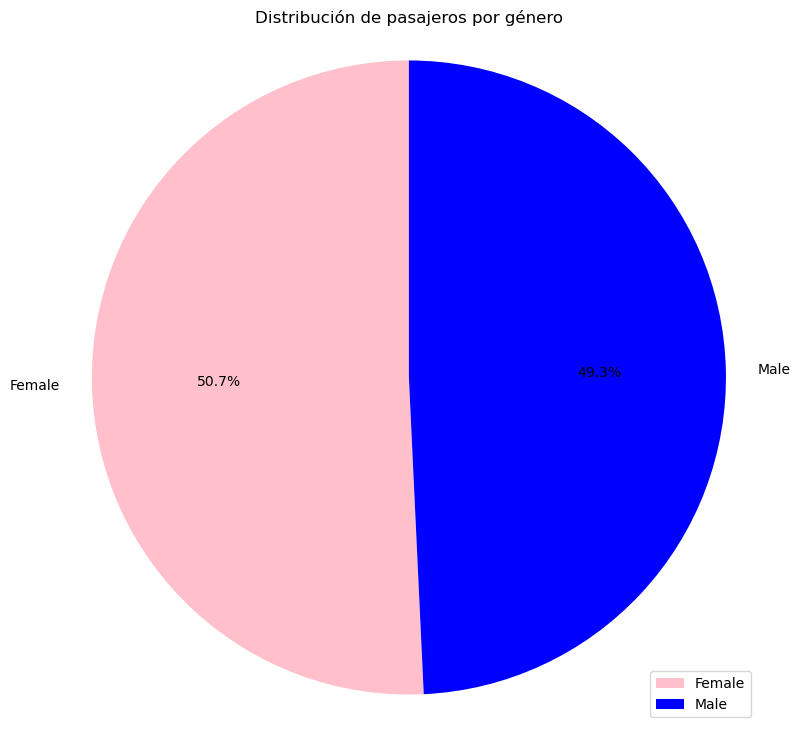

In [20]:
# Defino el esquema de colores personalizado
colores = {'Male': 'blue', 'Female': 'pink'}

# Gráfico de pastel que visualiza la distribucion de pasajeros por genero
figura_genero_general, ax = plt.subplots(figsize = (9, 9))
ax.pie(distribucion_genero_general['CANTIDAD'], labels=distribucion_genero_general['Gender'], autopct='%1.1f%%', startangle=90, colors=[colores[g] for g in distribucion_genero_general['Gender']])
ax.set_title('Distribución de pasajeros por género')
plt.axis('equal')  # Aseguro que el gráfico sea un círculo
plt.legend(loc='lower right')  # Muestro  la leyenda 
plt.show()



### Gráfico correspondiente a la distribución a nivel de clase de asientos

In [21]:
print(distribucion_genero_asiento.columns)


Index(['Class', 'Gender', 'CANTIDAD'], dtype='object')


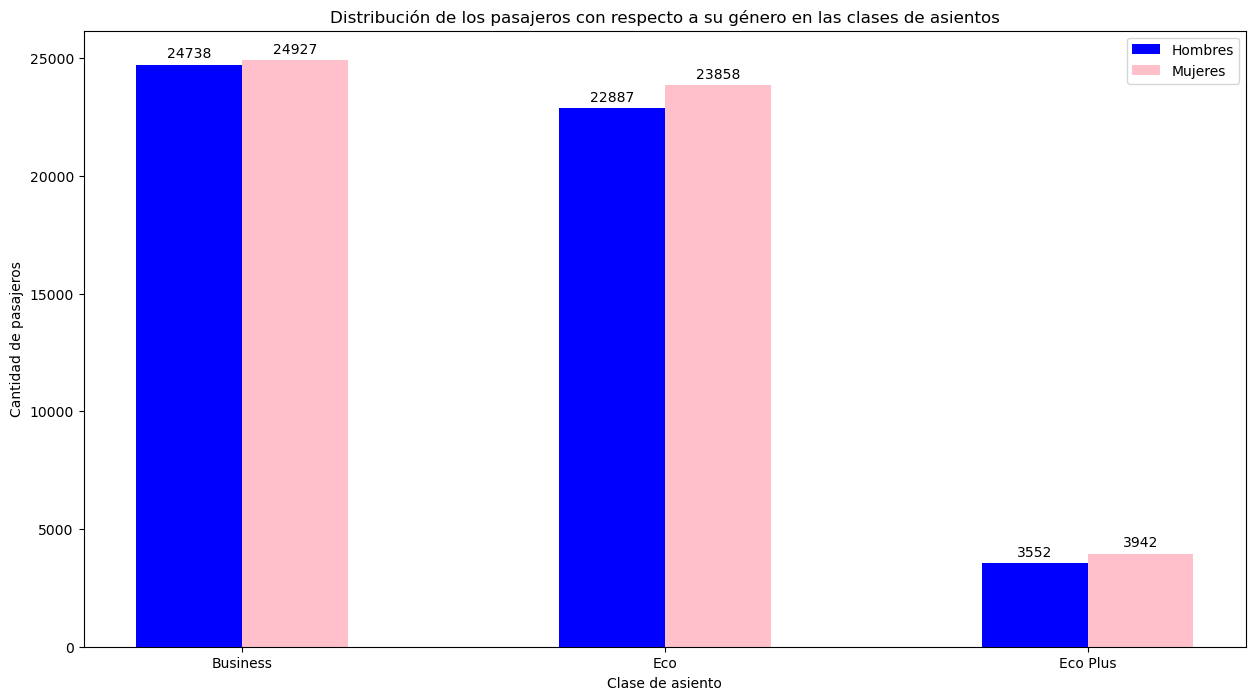

In [22]:
color_mapping = {'Male': 'blue', 'Female': 'pink'}

# Agrupo los datos por clase de asiento y género
grupo = distribucion_genero_asiento.groupby(['Class', 'Gender']).sum().unstack()

plt.style.use('default')

# Grafico de barras
plt.figure(figsize=(15, 8))

# Convierto el índice en una lista
indice_list = list(range(len(grupo)))

# Dibujo las barras para cada género
barra_hombres = plt.bar(indice_list, grupo['CANTIDAD']['Male'], width=0.25, label='Hombres', color=color_mapping['Male'])
barra_mujeres = plt.bar([x + 0.25 for x in indice_list], grupo['CANTIDAD']['Female'], width=0.25, label='Mujeres', color=color_mapping['Female'])

# Agrego titulo y labels
plt.xlabel('Clase de asiento')
plt.ylabel('Cantidad de pasajeros')
plt.title('Distribución de los pasajeros con respecto a su género en las clases de asientos')
plt.xticks([x + 0.25 / 2 for x in indice_list], grupo.index)
plt.legend()

# Agrego los totales a cada barra
for rect in barra_hombres.patches:
    plt.annotate(f'{rect.get_height():.0f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for rect in barra_mujeres.patches:
    plt.annotate(f'{rect.get_height():.0f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()


### Análisis de los gráficos de distribución general en razon del género

De los gráficos surge que hubieron más pasajeros mujeres que hombres, tendencia que también se ve reflejada en la eleccion de los tipos de clase de asientos.


## Análisis de los tipos de cliente según el género


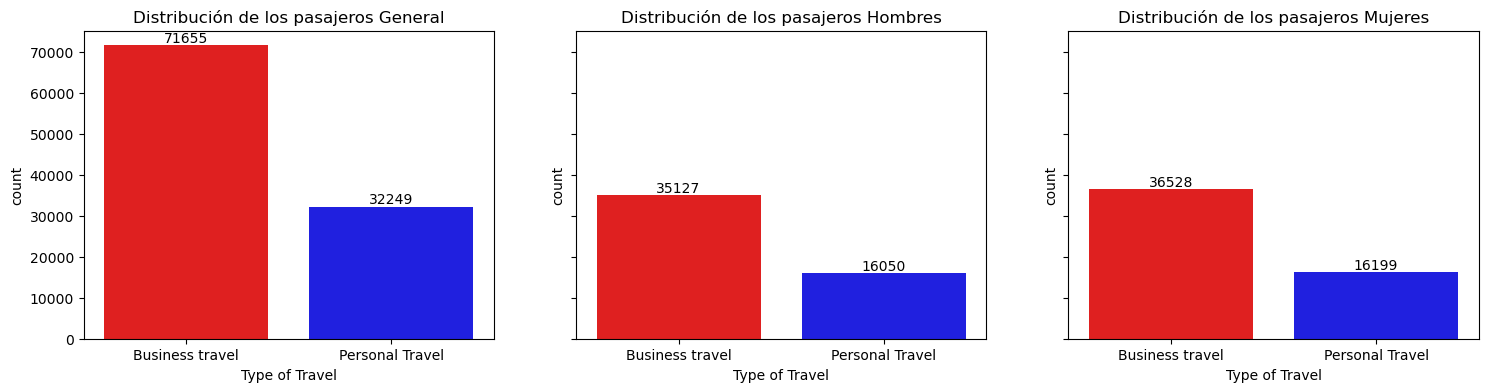

In [23]:
# Este código crea un gráfico de barras que muestra la distribución de pasajeros según el tipo de viaje (de negocios o personal) en 
# tres subplots horizontales. Cada subplot representa una categoría diferente de pasajeros: General, Hombres y Mujeres. 
# Utiliza diferentes colores para representar cada tipo de viaje y muestra el recuento de pasajeros en la parte superior de cada barra. 
# La distribución se basa en los datos proporcionados en el DataFrame df.

fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
colors = ['red', 'blue']
# Defino el orden de los tipos de viaje
order = ['Business travel', 'Personal Travel']

for i, (gen_pas, genero) in enumerate(zip([['Male','Female'], ['Male'], ['Female']], ['General', 'Hombres', 'Mujeres'])):
    df_gen_pas = df[df['Gender'].isin(gen_pas)]
    
    sns.countplot(data = df_gen_pas, x = 'Type of Travel', ax = axs[i], order = order, palette = colors)
    axs[i].set_title('Distribución de los pasajeros ' + genero)
    
    for bar in axs[i].patches:
        axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha = 'center', va = 'bottom')

plt.show()

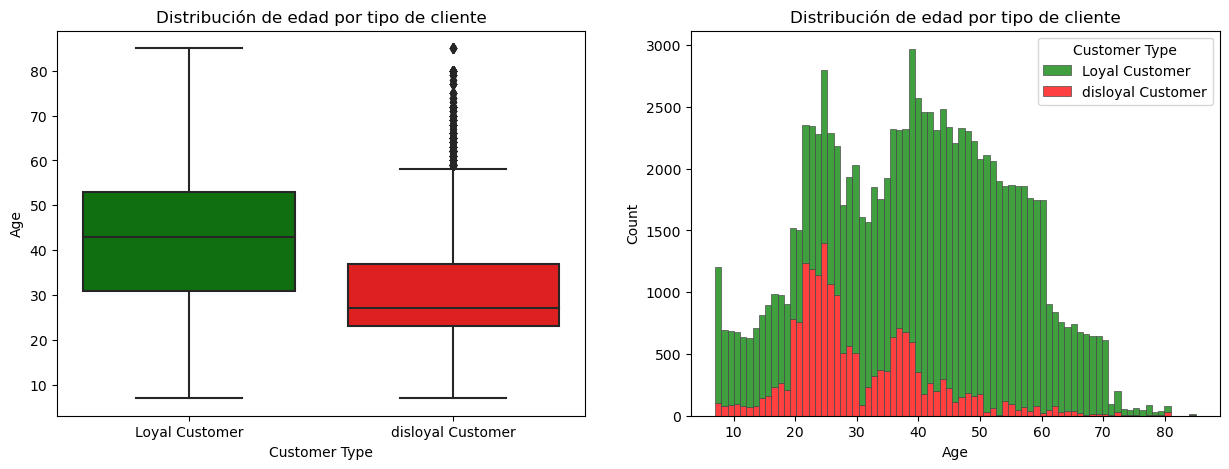

In [24]:
# Este código crea una figura con dos subplots lado a lado. El primer subplot muestra un gráfico de caja que representa la distribución 
# de la edad de los clientes, diferenciando entre clientes leales y clientes desleales. El segundo subplot muestra un histograma apilado 
# que también representa la distribución de la edad de los clientes, pero con las distribuciones de edad de los dos tipos de clientes 
# apiladas una encima de la otra para una comparación visual más directa. Ambos gráficos están basados en los datos proporcionados  
# en el DataFrame df.

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
colors = ('green', 'red')
order = ('Loyal Customer', 'disloyal Customer')

# Gráfico de caja
sns.boxplot(x='Customer Type', y='Age', palette=colors, data=df, ax=axs[0], order=order)
axs[0].set_title('Distribución de edad por tipo de cliente')

# Gráfico de histograma apilado
sns.histplot(df, x='Age', hue='Customer Type', multiple='stack', palette=colors, edgecolor='.3', linewidth=.5, ax=axs[1])
axs[1].set_title('Distribución de edad por tipo de cliente')

plt.show()

### Análisis de los gráficos

En los gráficos se muestra una marcada presencia de los pasajeros leales, que serían aquellos que se encuentran dentro de los programas de fidelidad de las aerolineas.

## Retraso de vuelos
Se necesita saber la distribución de los retrasos y el tiempo de retraso que se tuvo teniendo en cuenta la clase de asiento elegida

In [25]:
#Criterio por clase de asiento
distribucion_viaje_asiento = df.groupby(['Class', 'Type of Travel']).size().reset_index(name='CANTIDAD')
distribucion_viaje_asiento

Class   Type of Travel  CANTIDAD
0  Business  Business travel     47508
1  Business  Personal Travel      2157
2       Eco  Business travel     20257
3       Eco  Personal Travel     26488
4  Eco Plus  Business travel      3890
5  Eco Plus  Personal Travel      3604

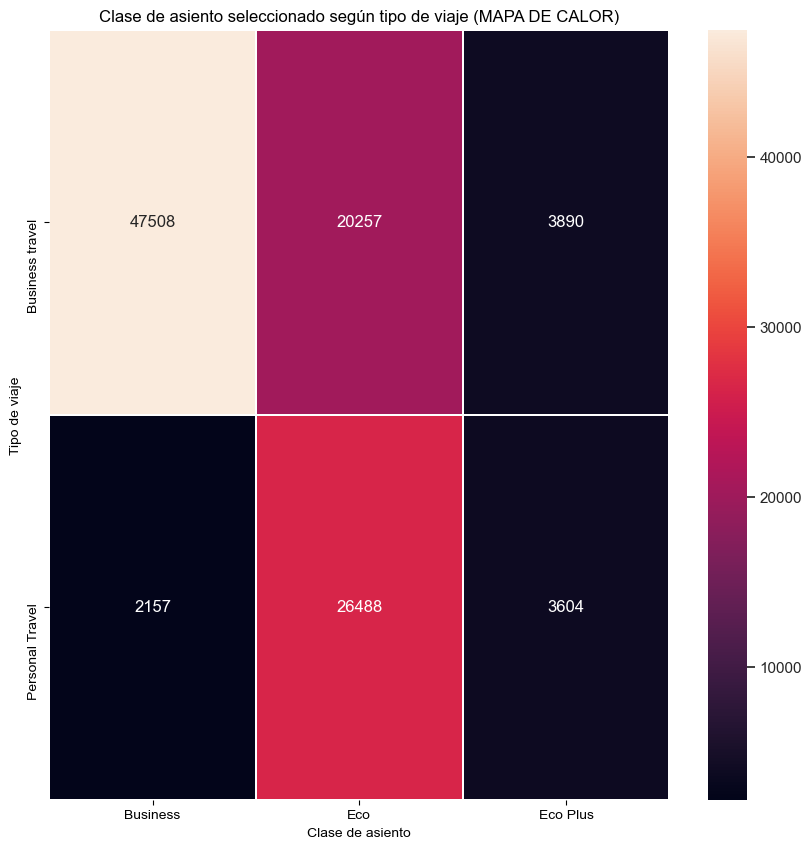

In [26]:
# Este código crea un mapa de calor que muestra la distribución de la cantidad de asientos seleccionados en diferentes clases de 
# asientos, según el tipo de viaje. Utiliza un DataFrame llamado distribucion_viaje_asiento y lo pivota para organizar los datos de 
# manera que las clases de asientos sean las columnas, los tipos de viaje sean las filas y los valores sean la cantidad de asientos 
# seleccionados. Luego, utilizo seaborn para trazar el mapa de calor con etiquetas mostrando los valores de cantidad en cada celda. 
# El mapa de calor está configurado con etiquetas en los ejes x e y y un título descriptivo.

asiento_vuelos = distribucion_viaje_asiento.pivot(index='Type of Travel', columns='Class', values='CANTIDAD')
f, ax = plt.subplots(figsize=(10, 10))

sns.set_theme(style='ticks', font_scale=1)
mapa_calor_codigo = sns.heatmap(asiento_vuelos, annot=True, fmt='.0f', linewidths=.2, ax=ax)
mapa_calor_codigo.set(xlabel='Clase de asiento', ylabel='Tipo de viaje', title='Clase de asiento seleccionado según tipo de viaje (MAPA DE CALOR)')

plt.show()


### Análisis del gráfico
Se observa una clara preferencia por los asientos de clase Business en los viajes de negocios, mientras que en los viajes de vacaciones se destaca una tendencia hacia la selección de los asientos de clase económica (Eco).

## Se desea conocer la distribución de los pasajeros según su edad y genero

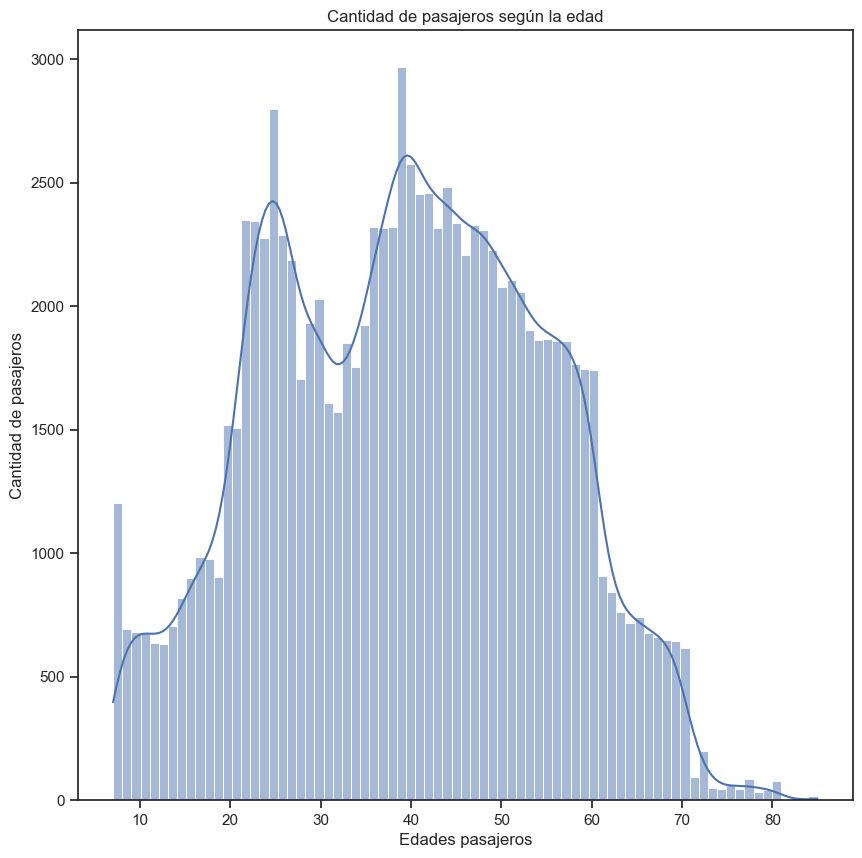

In [27]:
#Analisis de edad generalizado
f, ax = plt.subplots(figsize=(10, 10))

histograma_edad=sns.histplot(data=df, x='Age',kde=True)
histograma_edad.set(xlabel='Edades pasajeros',ylabel='Cantidad de pasajeros',title='Cantidad de pasajeros según la edad')

plt.show()

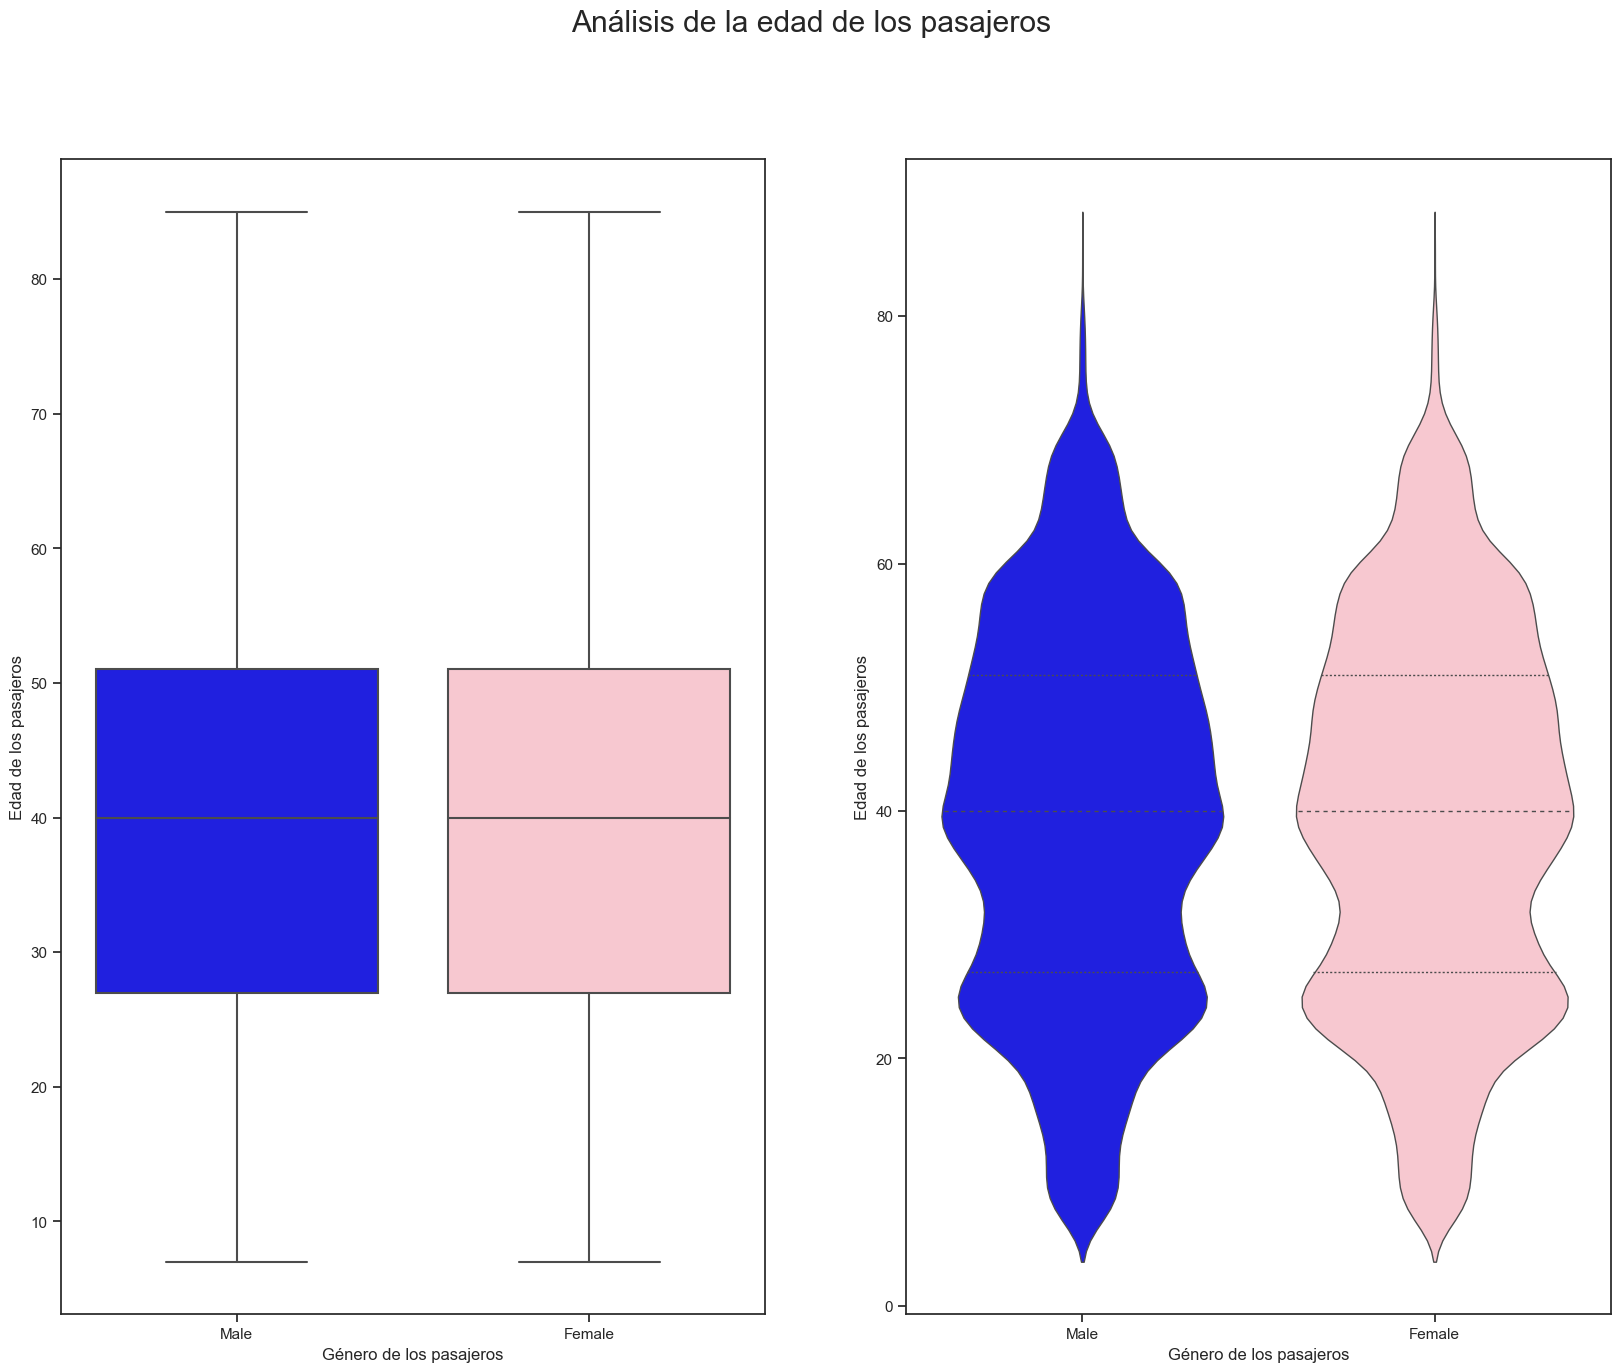

In [28]:
# Este código crea dos subplots en una figura: uno es un gráfico de caja y el otro es un gráfico de violín. Ambos gráficos muestran 
# la distribución de la edad de los pasajeros según su género.
color_mapping = {'Male': 'blue', 'Female': 'pink'}
fig_edad_pasajeros_gral, axes = plt.subplots(1, 2, figsize = (20,15))

sns.set_theme(style = 'ticks', font_scale = 1.5)

# En el gráfico de caja (izquierda), cada caja representa la distribución de la edad para un género específico, mostrando la mediana, 
# los cuartiles y los valores atípicos.
sns.boxplot(x = 'Gender', y = 'Age' , data = df,ax = axes[0], palette=color_mapping)
axes[0].set_ylabel('Edad de los pasajeros')
axes[0].set_xlabel('Género de los pasajeros')

# En el gráfico de violín (derecha), se superponen dos violines, uno para cada género. Cada violín representa la distribución de la 
# edad, con la forma del violín que indica la densidad de probabilidad en diferentes rangos de edad.
sns.violinplot(x = 'Gender', y = 'Age',data = df, split = True, inner = 'quart', linewidth = 1, ax = axes[1], palette=color_mapping)
axes[1].set_ylabel('Edad de los pasajeros')
axes[1].set_xlabel('Género de los pasajeros')

fig_edad_pasajeros_gral.suptitle('Análisis de la edad de los pasajeros')

plt.show()

### Análisis de los gráficos

**Análisis de Edades de Pasajeros:**

El conjunto de datos presenta un equilibrio notable entre los géneros. Para explorar las edades de los pasajeros, empleamos dos tipos de gráficos: un diagrama de caja (boxplot) a la izquierda y un gráfico de violín a la derecha.

- **Diagrama de Caja (Boxplot):** Para el sexo femenino, la distribución de edades muestra una mediana alrededor de los 40 años, con los cuartiles inferiores y superiores igualados por debajo y por encima de los 50 años, respectivamente. Este equilibrio sugiere una diversidad de edades entre las pasajeras.

- **Gráfico de Violín:** Complementando la información, el gráfico de violín revela que la mayoría de los pasajeros, tanto masculinos como femeninos, se encuentran en un rango de edades entre los 25 y los 60 años. Esta distribución uniforme señala una amplia representación de diferentes grupos etarios en el conjunto de datos.

Finalmente, el histograma general muestra una tendencia similar, sin distinguir entre géneros. Los picos de frecuencia ocurren aproximadamente a los 25 y 38 años, con una presencia mínima de pasajeros mayores de 70 años.

Este análisis resalta la diversidad de edades en la muestra de pasajeros, con una representación significativa en una amplia gama de grupos etarios.

Este análisis proporciona una descripción más clara y estructurada de las tendencias observadas en los gráficos, resaltando los hallazgos más relevantes y proporcionando una interpretación significativa de los resultados.


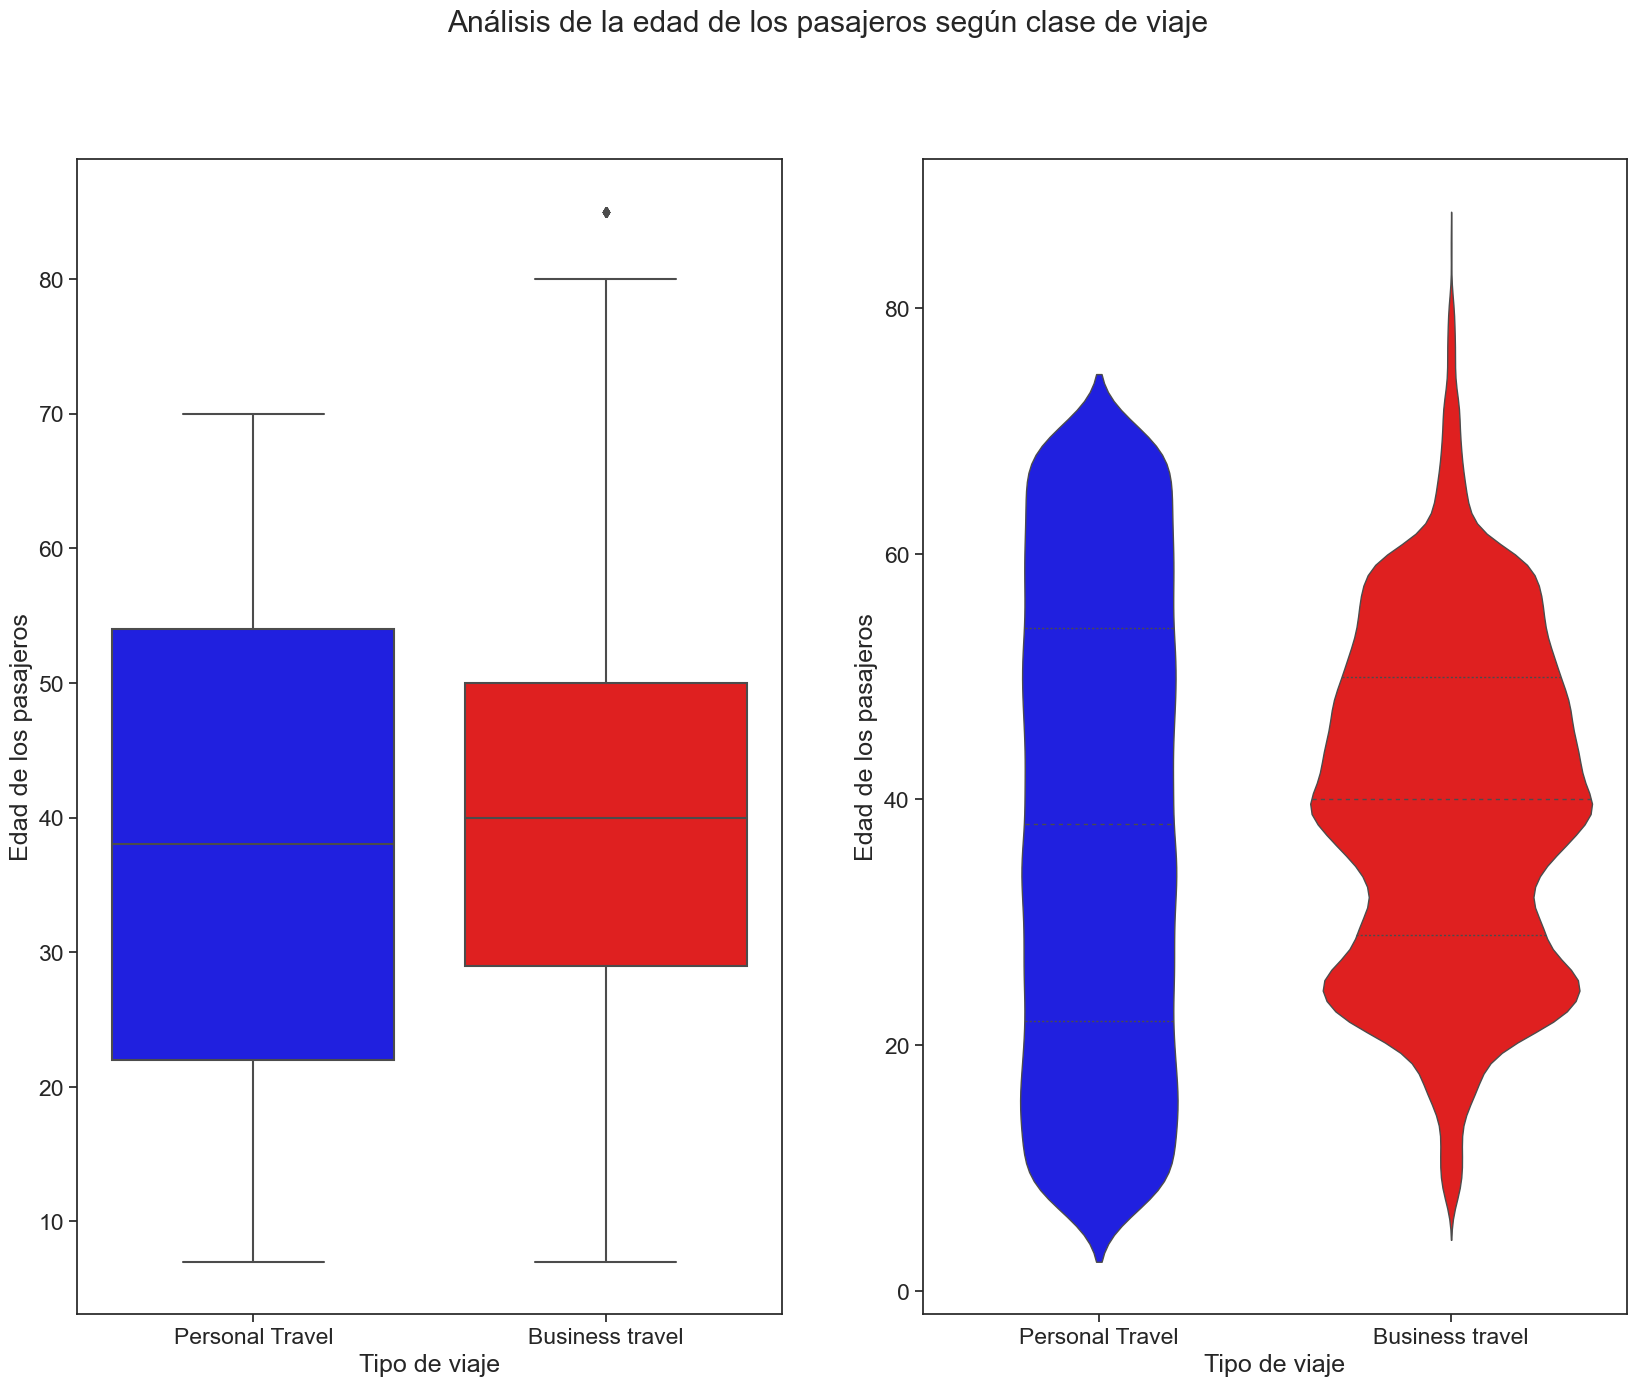

In [29]:
# El código crea dos gráficos: uno de caja y otro de violín. Ambos muestran la distribución de la edad de los pasajeros según el tipo 
# de viaje. En el gráfico de caja, cada caja representa la edad para cada tipo de viaje, y en el gráfico de violín, las formas de violín 
# representan la densidad de probabilidad de la edad. Se utilizan colores diferentes para cada tipo de viaje.

fig_edad_pasajeros_tipo_viaje, axes = plt.subplots(1, 2, figsize = (20,15))
order = ['Personal Travel', 'Business travel']
colors = ['blue', 'red']
sns.set_theme(style = 'ticks', font_scale = 1.5)

#Grafico de caja
sns.boxplot(x = 'Type of Travel', y = 'Age', data = df, ax = axes[0], palette = colors, order = order)
axes[0].set_ylabel('Edad de los pasajeros')
axes[0].set_xlabel('Tipo de viaje')

#Grafico de violin
sns.violinplot(x = 'Type of Travel', y = 'Age', data = df, split = True, inner = 'quart', linewidth = 1, ax = axes[1], palette = colors, order = order)
axes[1].set_ylabel('Edad de los pasajeros')
axes[1].set_xlabel('Tipo de viaje')

fig_edad_pasajeros_tipo_viaje.suptitle('Análisis de la edad de los pasajeros según clase de viaje')

plt.show()

## Nivel de satisfacción

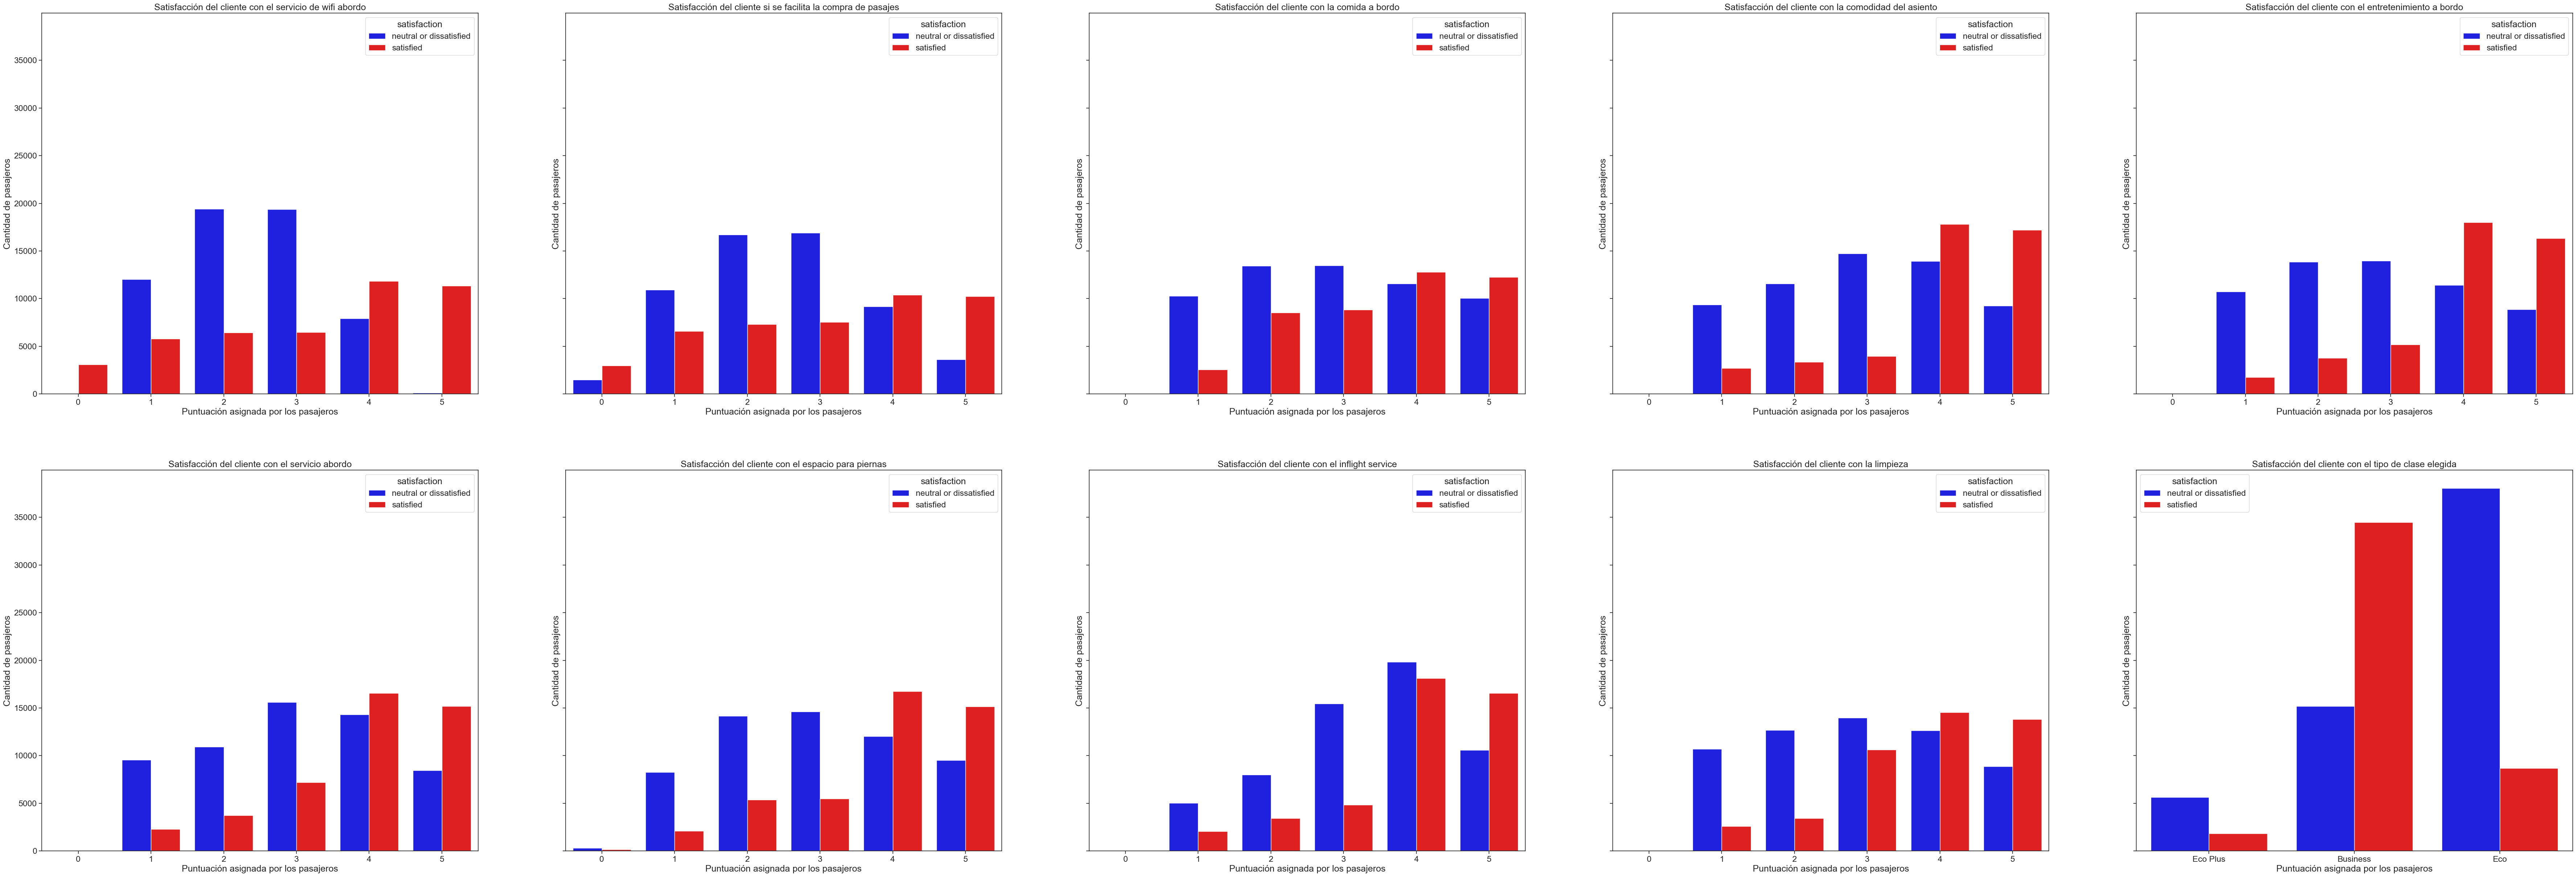

In [30]:
# Este código crea una matriz de subgráficos de 2 filas y 5 columnas, con cada subgráfico mostrando un conteo de la satisfacción del 
# cliente para una característica específica del servicio de la aerolínea. Se utiliza un esquema de color diferente para representar la 
# satisfacción positiva (azul) y negativa (roja). Cada subgráfico tiene su propio título que describe la característica del servicio.

fig, axs = plt.subplots(2, 5, figsize = (90, 30), sharey = True)
colors = ['blue', 'red']
for variable, titulo, ax in zip(['Inflight wifi service','Ease of Online booking','Food and drink','Seat comfort','Inflight entertainment',
                                'On-board service','Leg room service','Inflight service','Cleanliness','Class'],
                                ['con el servicio de wifi abordo','si se facilita la compra de pasajes','con la comida a bordo','con la comodidad del asiento',
                                'con el entretenimiento a bordo','con el servicio abordo','con el espacio para piernas','con el inflight service','con la limpieza',
                                'con el tipo de clase elegida'], axs.flat):
    # Gráfico
    sns.countplot(x = df[variable], hue = df['satisfaction'], ax = ax, palette = colors)
    ax.set_title(f'Satisfacción del cliente ' + titulo)
    ax.set(xlabel = 'Puntuación asignada por los pasajeros', ylabel = 'Cantidad de pasajeros')


## Ánalisis de los gráficos

Por lo que muestran los gráficos, parece que la tendencia general apunta hacia cierta insatisfacción con los servicios proporcionados. La mayoría de los pasajeros optaron por respuestas neutras o insatisfechas. Sin embargo, también se observa una concentración de pasajeros satisfechos en los puntajes más altos de los diferentes servicios ofrecidos.

## Conclusiones generales de lo analizado
Después de examinar detenidamente el dataset, se observa un equilibrio generalizado en los datos. La proporción de pasajeros masculinos y femeninos es casi idéntica, con una ligera ventaja para las mujeres (aproximadamente un 1,4% más). En cuanto a las preferencias de clase de asiento, la Business Class es la más popular, seguida de la Economy Class, mientras que la Economy Plus es la menos elegida.

Además, se observa que la mayoría de los pasajeros que eligen la clase Business suelen viajar por motivos de negocios, mientras que aquellos que optan por la clase Economy tienden a hacerlo por placer. Sin embargo, la diferencia en la cantidad de pasajeros entre los viajes de negocios y de placer no es significativa.

En relación a la edad de los pasajeros, se encuentra que la mediana se sitúa alrededor de los 40 años tanto para hombres como para mujeres.

Por último, el análisis revela una proporción considerable de pasajeros insatisfechos con los servicios proporcionados por la aerolínea. Los aspectos peor valorados incluyen el servicio de wifi, la facilidad de compra de pasajes y el espacio para las piernas.

## Recomendaciones en base a lo observado
Basándonos en los datos obtenidos del conjunto de datos, se sugiere realizar una actualización integral de los servicios ofrecidos por la compañía aérea. Esto incluiría mejoras significativas en áreas críticas como el servicio de wifi, la plataforma de compra de boletos y el espacio para las piernas en los asientos.

Además, dado que se observa una cantidad considerable de pasajeros que viajan por motivos de negocios, se recomienda dirigir esfuerzos y campañas publicitarias específicamente a este grupo demográfico. Dado que estos pasajeros suelen optar por las clases más caras de la aerolínea, como la Business Class, mejorar los servicios dirigidos a este segmento podría tener un impacto significativo en los ingresos de la empresa.

# **Feature selection**
El objetivo consiste en depurar los datos, eliminando aquellos campos que no aportan información relevante para la predicción. De esta manera, se busca organizar los datos de manera óptima para evitar que el modelo reciba información redundante o poco útil, lo que podría afectar la calidad y confiabilidad de las predicciones.

# Codificación de variables categóricas

Para poder realizar el análisis y construir modelos predictivos, es necesario convertir las variables categóricas en códigos numéricos. Este proceso nos permitirá luego realizar la matriz de correlación y trabajar con los datos de manera más eficiente.

En primer lugar, se procederá a codificar las variables categóricas. Para el género, se asignará el código 0 para 'Masculino' y 1 para 'Femenino'. Este mismo procedimiento se aplicará al tipo de viaje, clase elegida, tipo de cliente y la variable objetivo (satisfacción del pasajero).

In [31]:
# Este código reemplaza los valores categóricos en el DataFrame con valores numéricos. Se crea un diccionario para cada columna 
# categórica, donde se mapean los valores originales a valores numéricos. Luego, se utiliza el método replace() de pandas para aplicar 
# estos mapeos a las columnas correspondientes en el DataFrame.

dict_gen = {'Male' : 0, 'Female' : 1}
df['Gender'] = df.Gender.replace(dict_gen)

dict_viaje={'Personal Travel' : 0,'Business travel':1}
df['Type of Travel'] = df['Type of Travel'].replace(dict_viaje)

dict_clase={'Eco':0,'Eco Plus':1,'Business':2}
df['Class'] = df.Class.replace(dict_clase)

dict_tipo={'disloyal Customer':0,'Loyal Customer':1}
df['Customer Type'] = df['Customer Type'].replace(dict_tipo)

dict_satisfaccionv2={'neutral o no satisfecho':0,'satisfecho':1}
df['satisfaction'] = df.satisfaction.replace(dict_satisfaccionv2)

# Visualización de la matriz de correlación

Con el fin de obtener una comprensión clara de las relaciones entre las variables, vamos a crear un mapa de calor (heatmap) que represente visualmente los valores de correlación. Este heatmap nos permitirá evaluar tanto la fuerza como la dirección de las relaciones entre las variables, ayudándonos a identificar patrones y posibles asociaciones en nuestros datos.

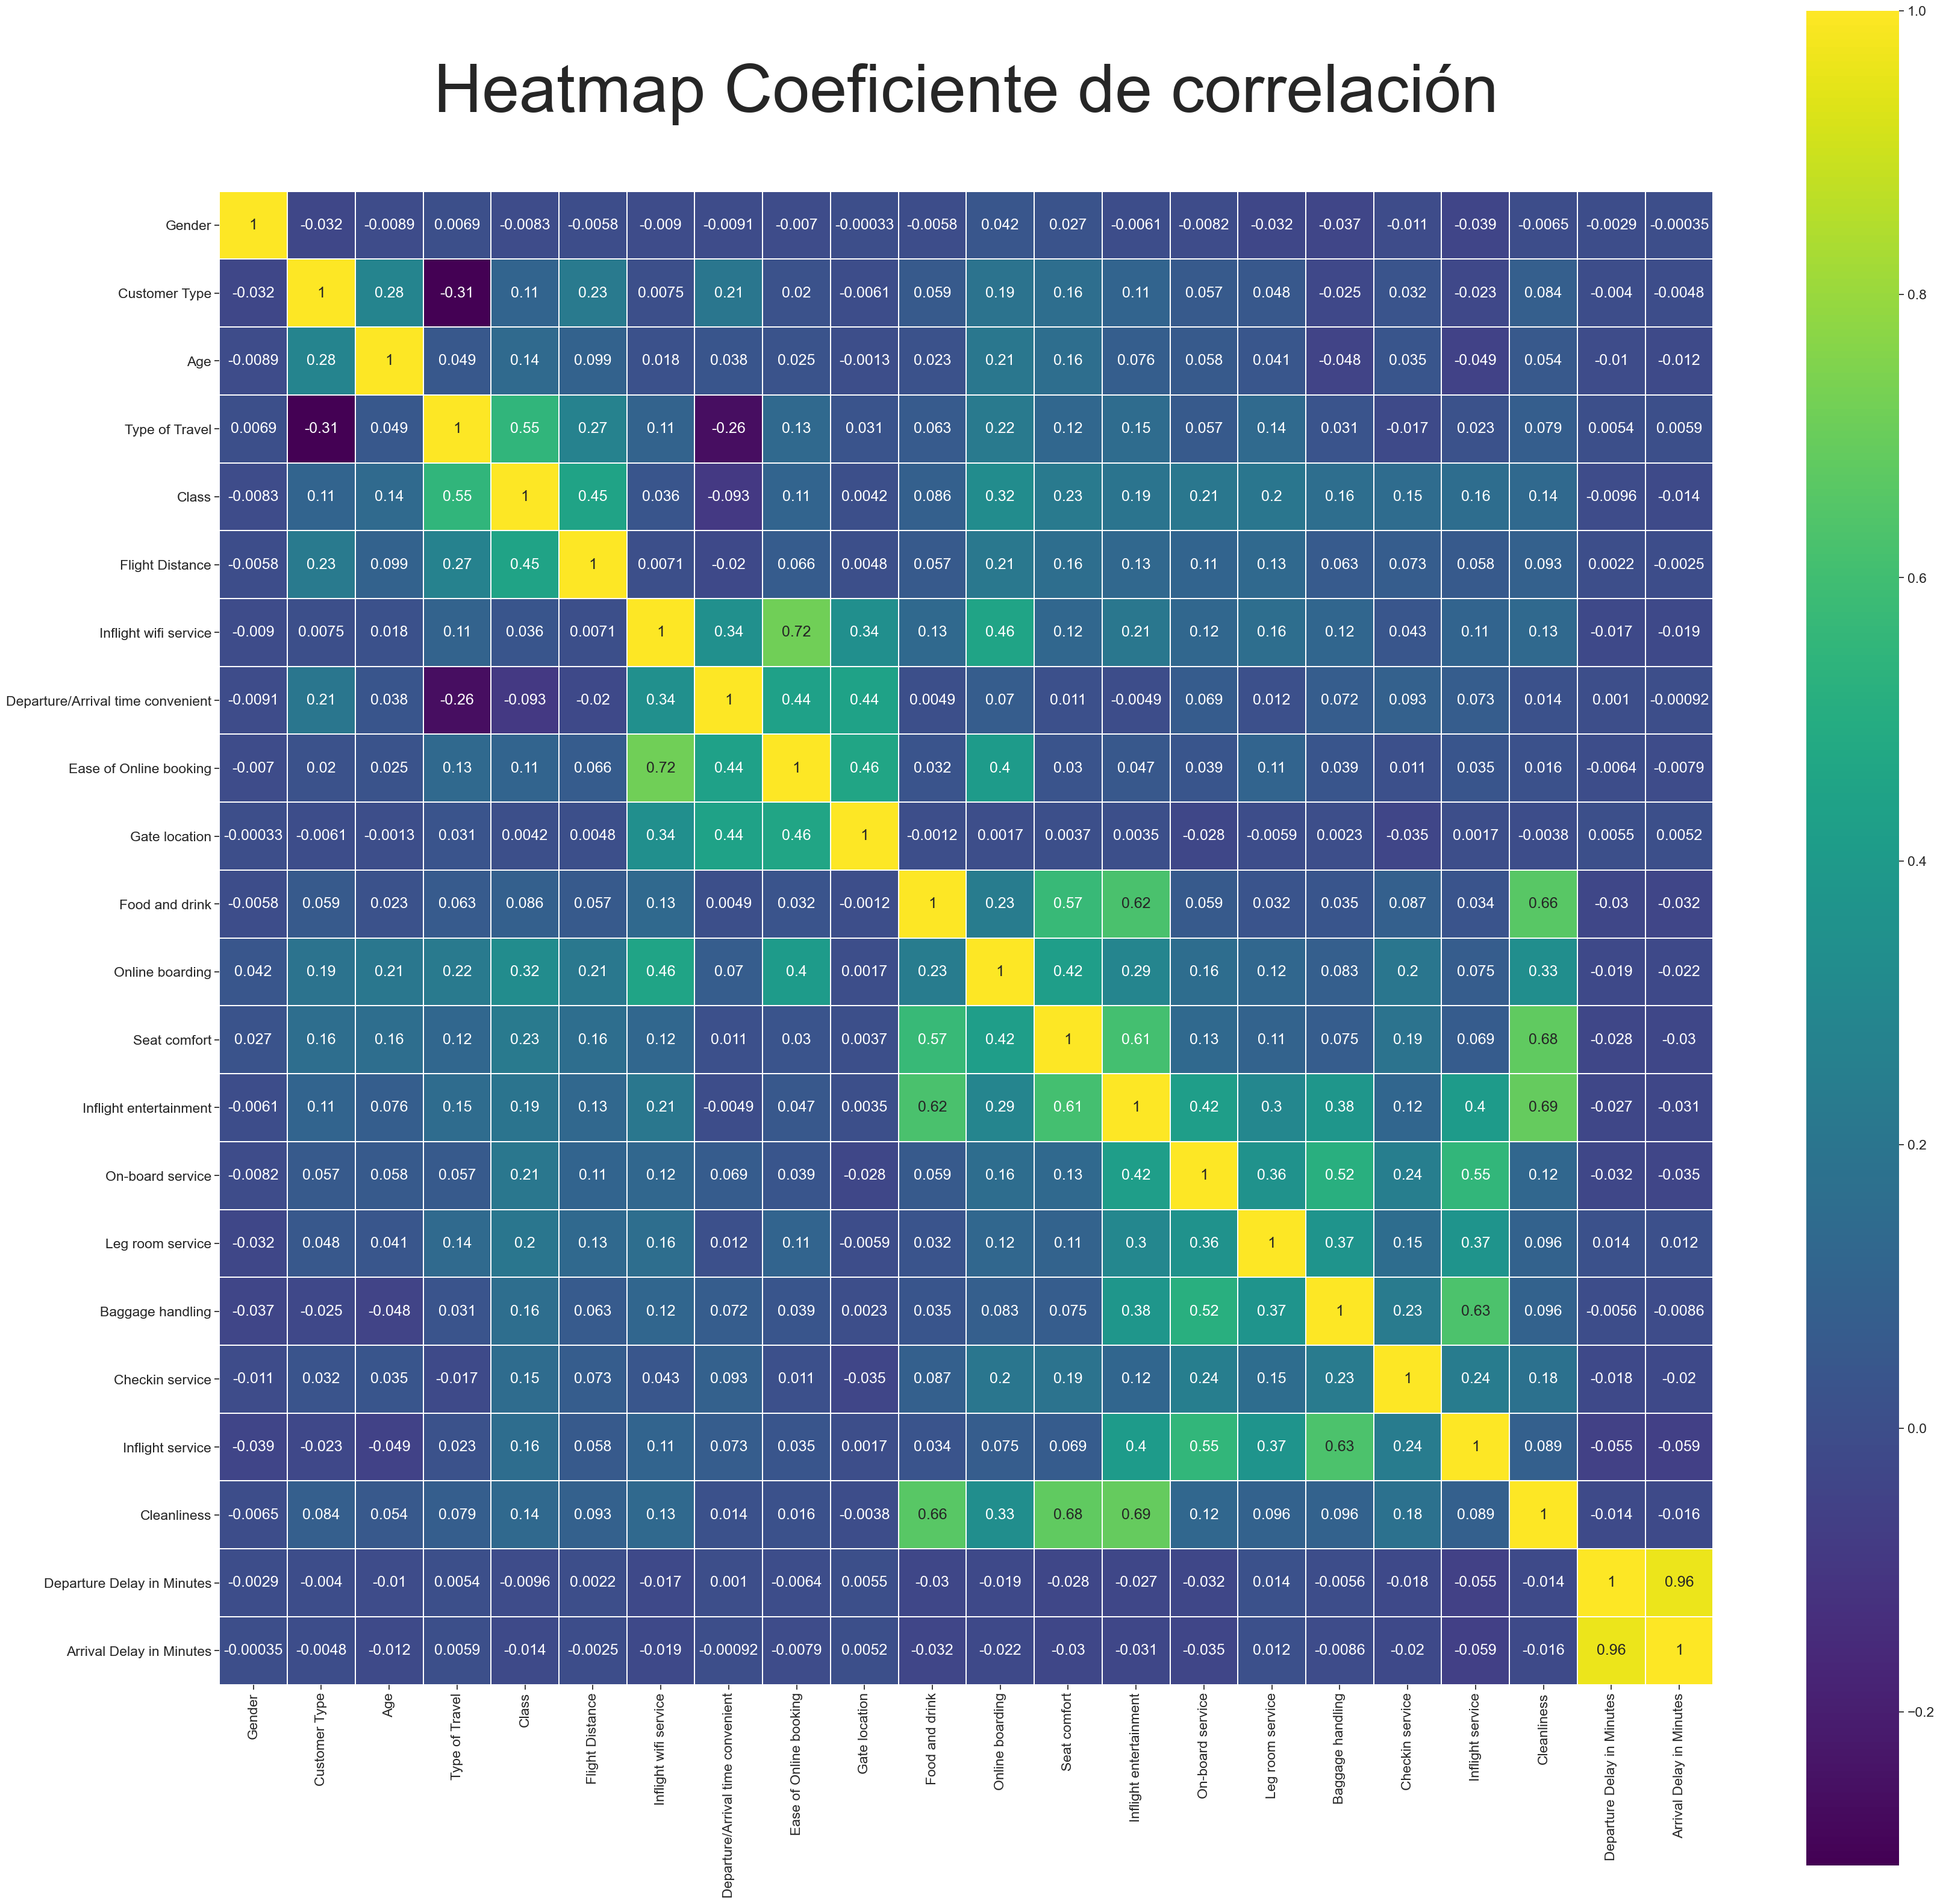

In [32]:
# Este código genera un heatmap que muestra los coeficientes de correlación entre las diferentes variables del DataFrame df. 
# Primero, se crea una copia del DataFrame df llamada dfaux, donde se elimina la columna 'satisfaction' utilizando el método drop(). 
# Luego, se utiliza sns.heatmap() de seaborn para trazar el heatmap de los coeficientes de correlación entre las variables restantes 
# en dfaux. Los coeficientes de correlación se calculan utilizando el método corr() de pandas. 

df_auxiliar=df.drop(['satisfaction'],axis=1)
mapacoef = plt.cm.viridis

plt.figure(figsize=(40,40))
plt.title('Heatmap Coeficiente de correlación', y=1.05, size=80)
sns.heatmap(df_auxiliar.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=mapacoef, linecolor='white', annot=True)

plt.show()

Teniendo en cuenta la alta correlacion existente entre el retraso de la salida y el retraso de la llegada se graficará con el fin de ver si es posible eliminar una de ambas en el feature selection

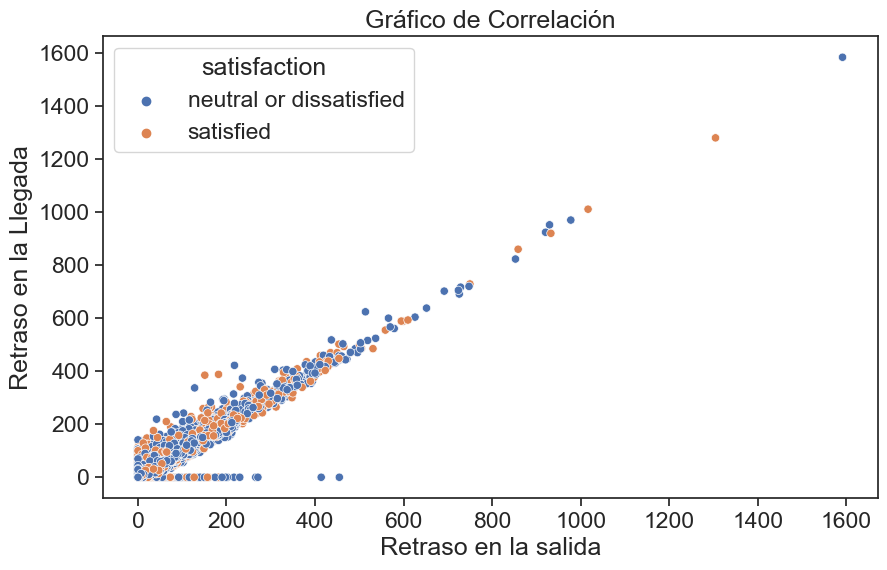

In [33]:
# Este código crea un gráfico de dispersión (scatter plot) que muestra la relación entre el retraso en la salida (en el eje x) y el 
# retraso en la llegada (en el eje y) utilizando los datos del DataFrame df. 

plt.subplots(figsize = (10, 6))

scatter_retraso = sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df, hue='satisfaction')
scatter_retraso.set(xlabel = 'Retraso en la salida', ylabel = 'Retraso en la Llegada', title = 'Gráfico de Correlación')

plt.show()

## Conclusion 
El análisis revela una fuerte correlación entre el retraso en la salida y el retraso en la llegada. Por lo tanto, podemos concluir que, debido a esta alta correlación, prescindir de una de estas variables sería adecuado durante la selección de características relevantes. En este caso, optaré por descartar el retraso en la salida.

Otras variables que muestran una correlación significativa, alrededor de 0.7, incluyen Inflight wifi service y Ease of Online booking, Cleanliness y Inflight entertainm, Cleanliness y Seat comfort, y Food and drink y Cleanliness. Realizaré un análisis similar para determinar si alguna de estas variables puede ser eliminada durante la etapa de selección de características relevantes.

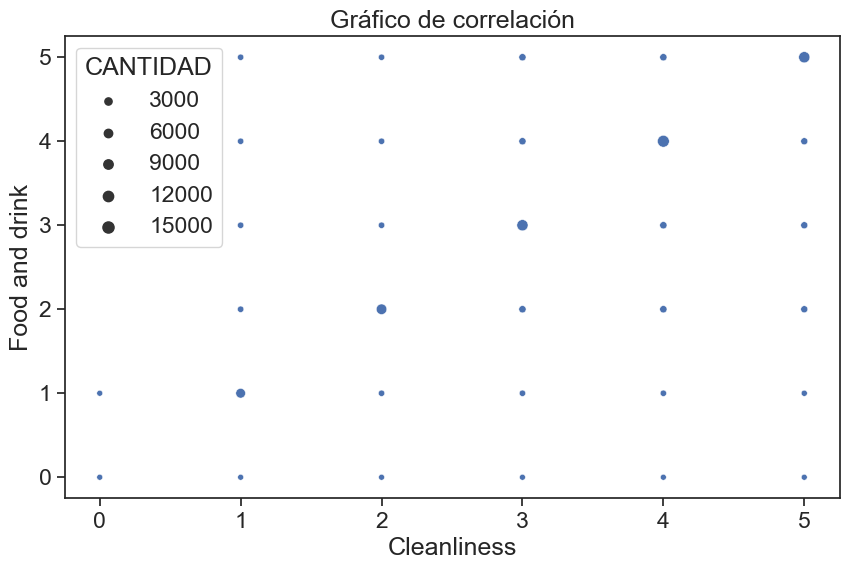

In [34]:
# Este código crea un gráfico de dispersión (scatter plot) donde se visualiza la relación entre dos variables: "Cleanliness" (limpieza) 
# en el eje x y "Food and drink" (comida y bebida) en el eje y.

plt.subplots(figsize=(10, 6))

# El DataFrame aux_burbuja se utiliza para calcular el recuento de observaciones para cada combinación de valores y luego se pasa al 
# gráfico de dispersión
aux_burbuja = df.reset_index().groupby(['Cleanliness', 'Food and drink'])['index'].count().to_frame('CANTIDAD').reset_index()
scatter = sns.scatterplot(x='Cleanliness', y='Food and drink', size='CANTIDAD', data=aux_burbuja)
scatter.set_title('Gráfico de correlación')
plt.show()



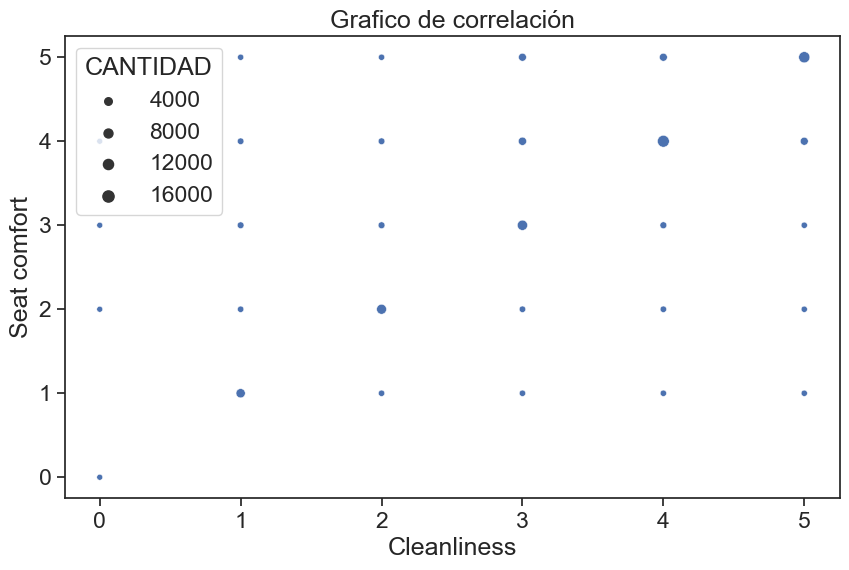

In [35]:
plt.subplots(figsize=(10, 6))

aux_burbuja = df.reset_index().groupby(['Cleanliness', 'Seat comfort'])['index'].count().to_frame('CANTIDAD').reset_index()
scater = sns.scatterplot(x = 'Cleanliness', y = 'Seat comfort', size = 'CANTIDAD', data = aux_burbuja)
scater.set(xlabel = 'Cleanliness', ylabel = 'Seat comfort', title = 'Grafico de correlación')
plt.show()

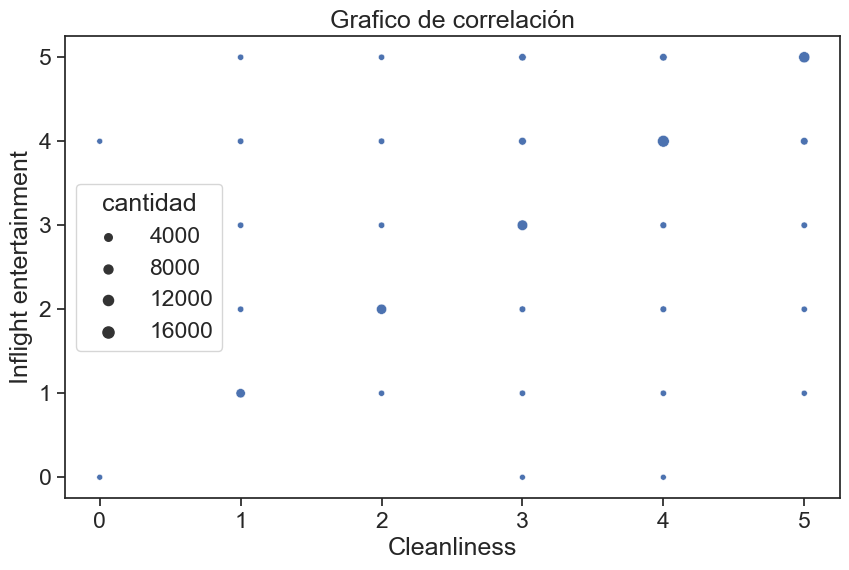

In [36]:
plt.subplots(figsize=(10, 6))
aux_burbuja = df.reset_index().groupby(['Cleanliness', 'Inflight entertainment'])['index'].count().to_frame('cantidad').reset_index()
scater = sns.scatterplot(x = 'Cleanliness', y = 'Inflight entertainment', size = 'cantidad', data = aux_burbuja)
scater.set(xlabel = 'Cleanliness', ylabel = 'Inflight entertainment', title = 'Grafico de correlación')
plt.show()

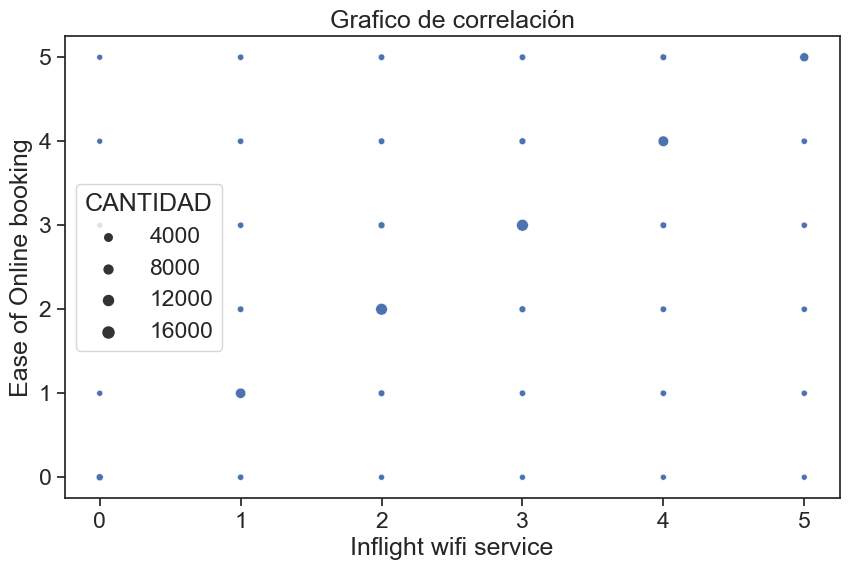

In [37]:
plt.subplots(figsize = (10, 6))
aux_burbuja = df.reset_index().groupby(['Inflight wifi service','Ease of Online booking'])['index'].count().to_frame('CANTIDAD').reset_index()
scater=sns.scatterplot(x = 'Inflight wifi service', y = 'Ease of Online booking', size = 'CANTIDAD', data = aux_burbuja)
scater.set(xlabel = 'Inflight wifi service', ylabel = 'Ease of Online booking', title = 'Grafico de correlación')
plt.show()

## Conclusion
En estos cuatro casos, la correlación es evidente ya que al aumentar una variable, la otra también tiende a aumentar, como se puede observar en el tamaño de las burbujas en el gráfico. Por lo tanto, en la etapa de selección de características, eliminaré la variable 'Cleanliness' en los tres primeros casos y 'Inflight wifi service' en el último.

In [38]:
# Calculo el coeficiente de correlación entre X e Y
corr_coeff = df['Departure Delay in Minutes'].corr(df['Arrival Delay in Minutes'], method='pearson')

# Imprimo el coeficiente de correlación
print("Coeficiente de correlación de Pearson: ", corr_coeff)

Coeficiente de correlación de Pearson:  0.9602470986642809


# Busqueda de outliers

Para la busqueda de outliers revisaremos todas las variables no categoricas

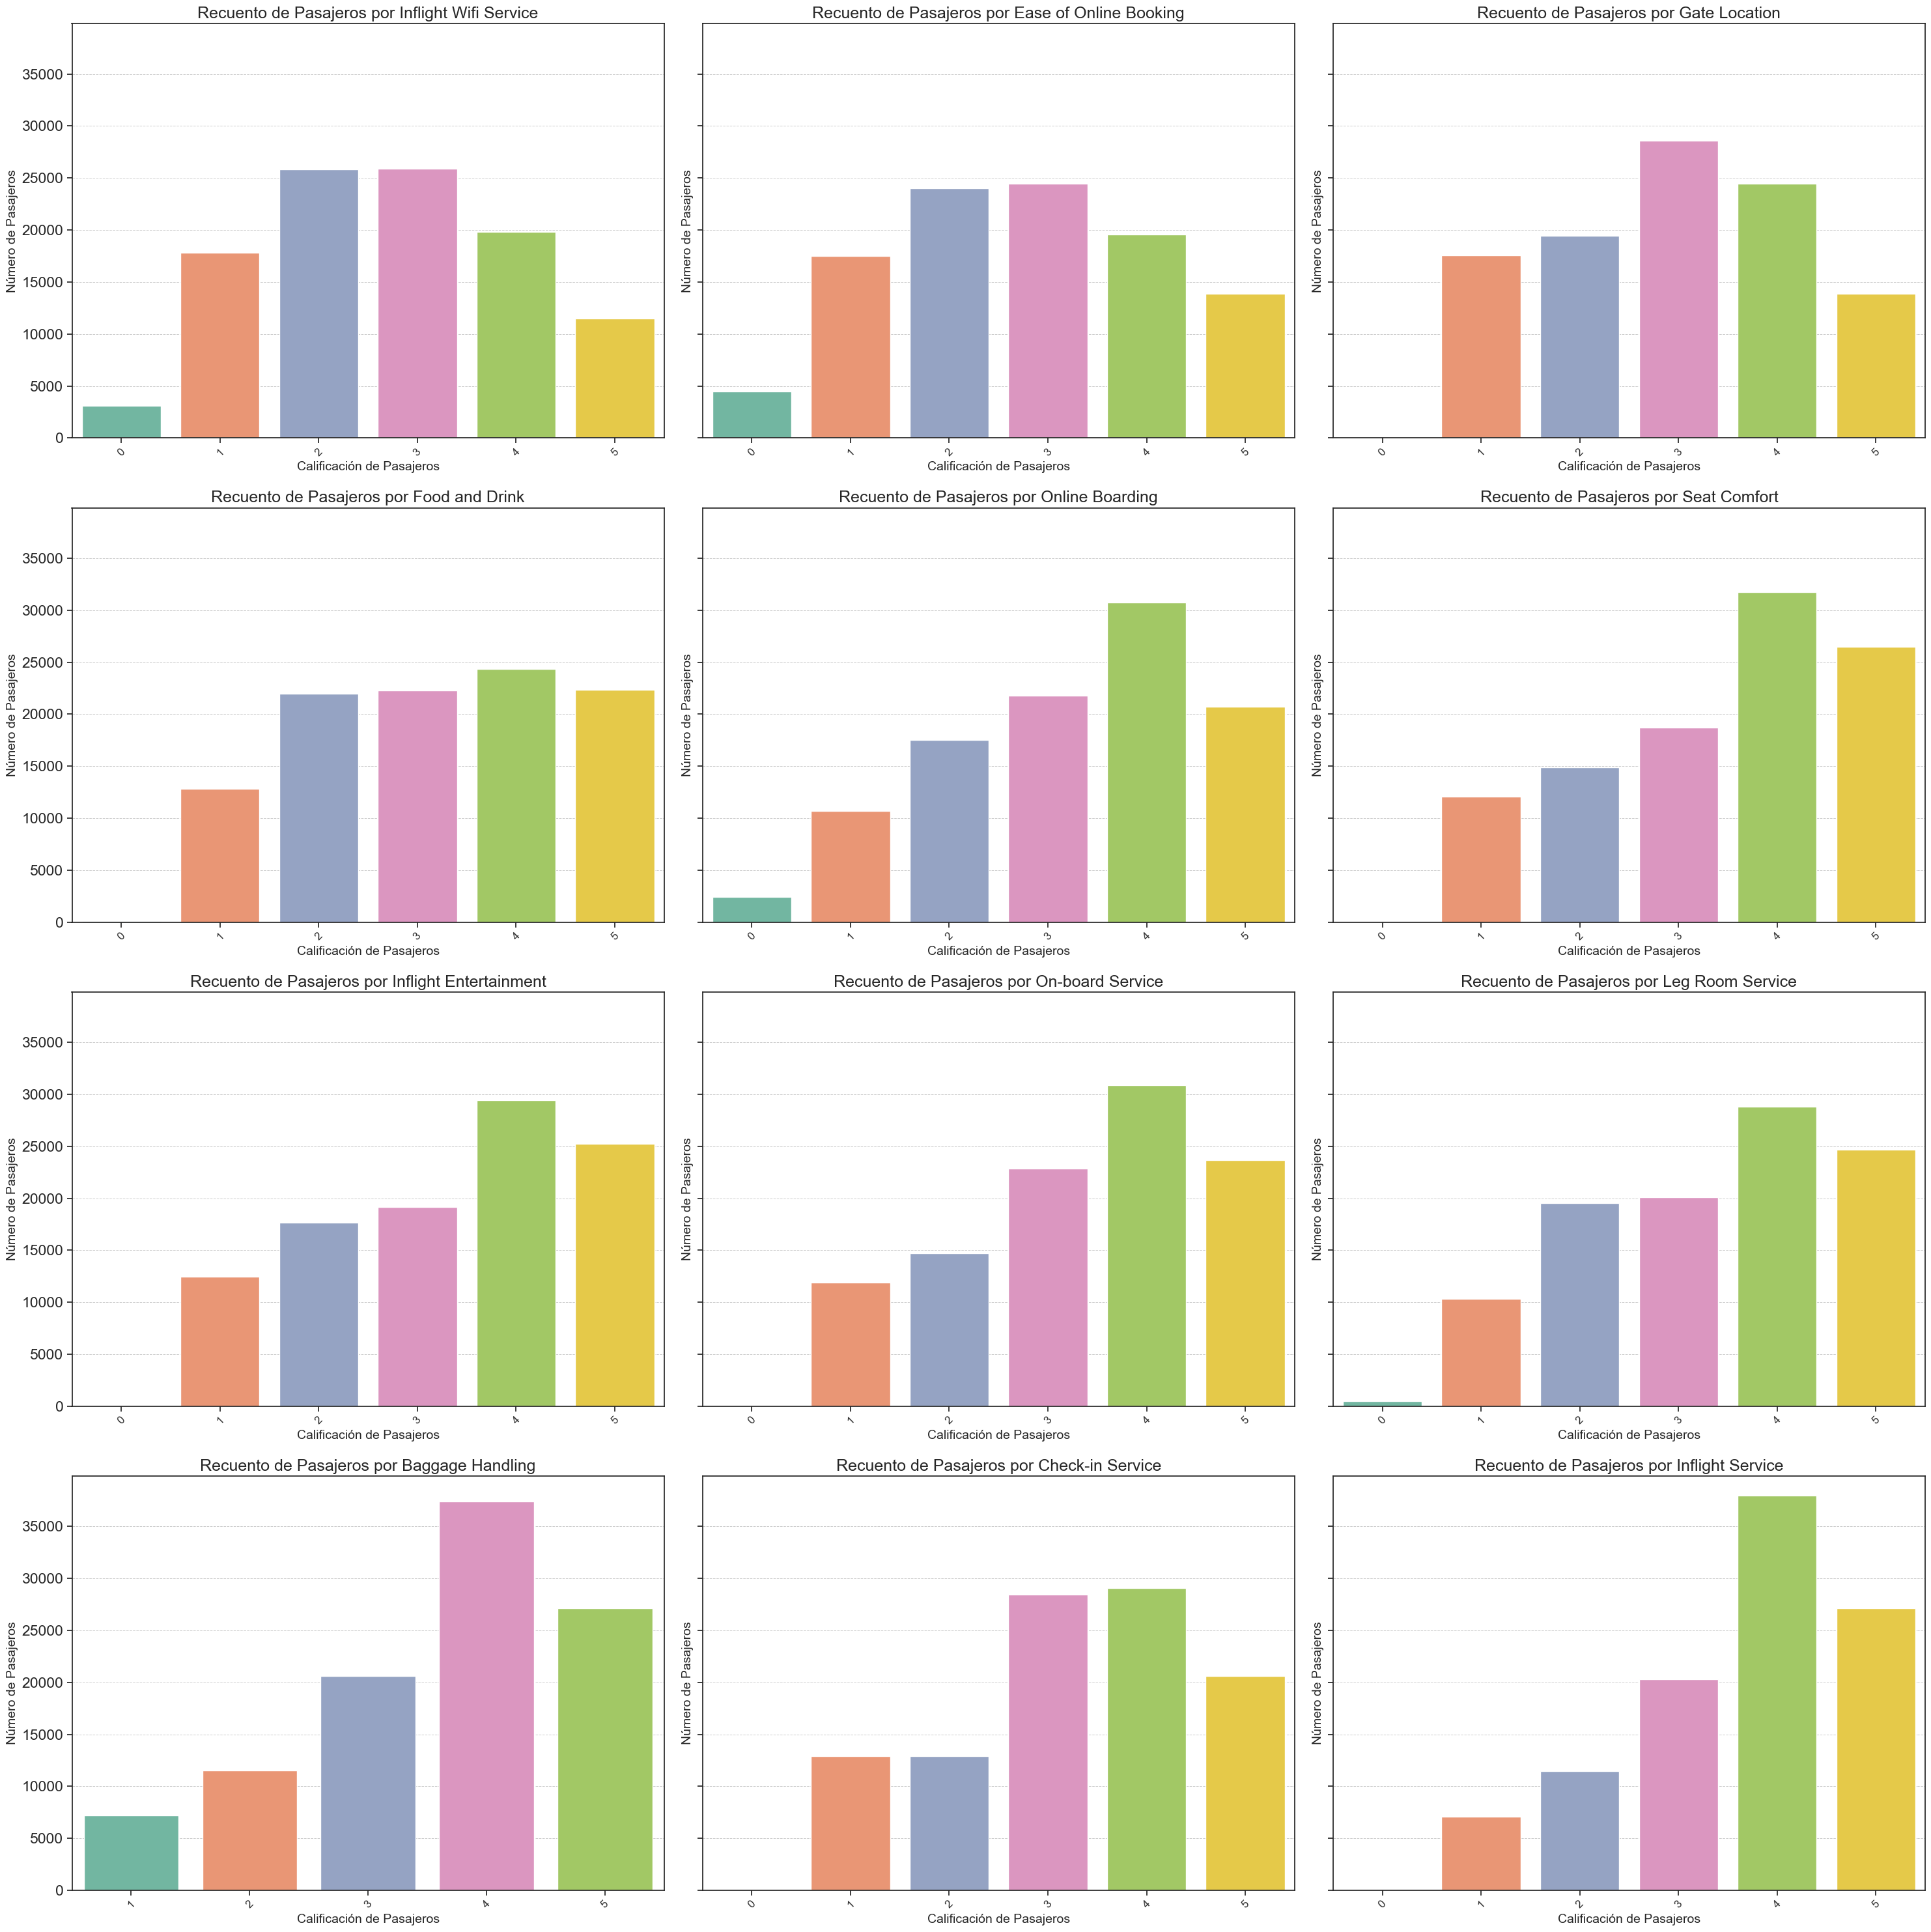

In [39]:
#Tamaño reducido para una mejor visualización
fig, axs = plt.subplots(4, 3, figsize=(30, 30), sharey=True) 

# Defino color palette for the plots
palette = sns.color_palette("Set2", 10)

# Itero a través de variables y títulos
for variable, titulo, ax in zip(['Inflight wifi service', 'Ease of Online booking', 'Gate location', 'Food and drink',
                                'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
                                'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service'],
                                ['Inflight Wifi Service', 'Ease of Online Booking', 'Gate Location', 'Food and Drink',
                                'Online Boarding', 'Seat Comfort', 'Inflight Entertainment', 'On-board Service',
                                'Leg Room Service', 'Baggage Handling', 'Check-in Service', 'Inflight Service'],
                                axs.flat):

    # Gráfico de conteo con paleta de colores actualizada
    sns.countplot(x=df[variable], ax=ax, palette=palette)
    
    # Mejoro el título y el tamaño de la fuente
    ax.title.set_text(f'Recuento de Pasajeros por {titulo}')
    ax.title.set_size(18)

    # Mejoro las etiquetas de los ejes y su tamaño
    ax.set_xlabel('Calificación de Pasajeros', fontsize=14)
    ax.set_ylabel('Número de Pasajeros', fontsize=14)

    # Roto las etiquetas del eje x para evitar superposición
    ax.tick_params(axis='x', rotation=45, labelsize=12)

    # Agrego líneas de cuadrícula para mejorar la legibilidad
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout() 
plt.show()

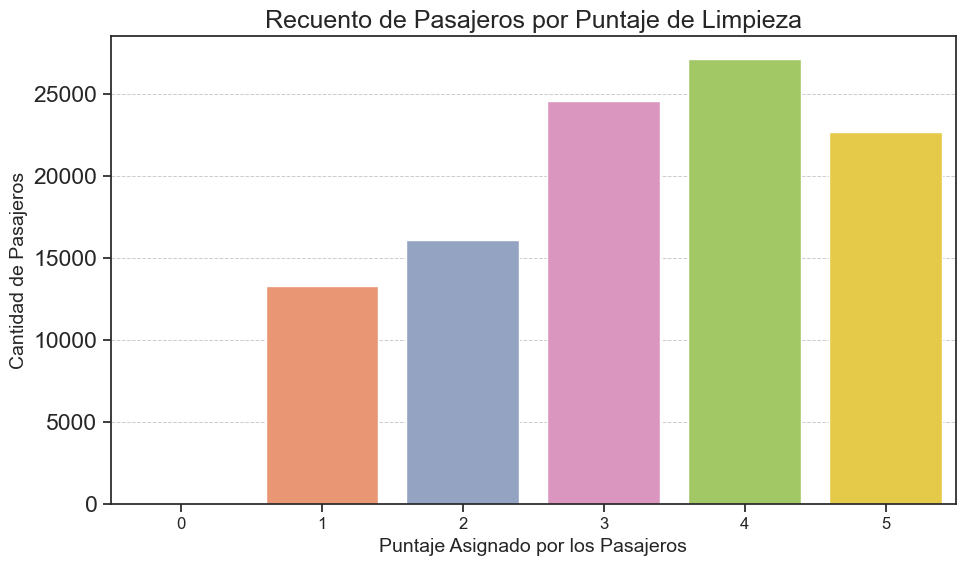

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))  

# Defino una paleta de colores para consistencia
palette = sns.color_palette("Set2", 10)

# Creo gráfico de conteo con estilo mejorado
sns.countplot(x=df['Cleanliness'], ax=ax, palette=palette)

# Mejoro el título y el tamaño de la fuente
ax.title.set_text('Recuento de Pasajeros por Puntaje de Limpieza')
ax.title.set_size(18)

# Mejoro las etiquetas de los ejes y su tamaño
ax.set_xlabel('Puntaje Asignado por los Pasajeros', fontsize=14)
ax.set_ylabel('Cantidad de Pasajeros', fontsize=14)

# Roto las etiquetas del eje x si es necesario
ax.tick_params(axis='x', labelsize=12)

# Agrego líneas de cuadrícula para mejorar la legibilidad
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()  
plt.show()

## Análisis del gráfico

Del gráfico se desprende que deberemos revisar los puntajes de 0 para ver si los podemos considerar como outliers.

In [41]:
# Para saber el número exacto de cantidades que tienen 0 revisare todas las columnas que tienen 0
for variable in ['Inflight wifi service','Departure/Arrival time convenient',
                'Ease of Online booking','Gate location','Food and drink',
                'Online boarding','Seat comfort','Inflight entertainment',
                'On-board service','Leg room service','Checkin service',
                'Inflight service','Cleanliness']:
    print(variable + str(df[df[variable]==0].shape))

Inflight wifi service(3103, 23)
Departure/Arrival time convenient(5300, 23)
Ease of Online booking(4487, 23)
Gate location(1, 23)
Food and drink(107, 23)
Online boarding(2428, 23)
Seat comfort(1, 23)
Inflight entertainment(14, 23)
On-board service(3, 23)
Leg room service(472, 23)
Checkin service(1, 23)
Inflight service(3, 23)
Cleanliness(12, 23)


In [42]:
df=df[(df["Cleanliness"]!=0) & (df["Inflight service"]!=0)& (df["Checkin service"]!=0)& 
    (df["Inflight service"]!=0)& (df["Seat comfort"]!=0)& (df["Gate location"]!=0)& 
    (df["Inflight wifi service"]!=0) ]

## Conclusión outliers
Al analizar los puntajes de 0 para cada uno de los ítems evaluados, se observa que en algunos casos estos valores podrían interpretarse como “no aplicable” en lugar de una evaluación negativa. Por ejemplo, en el caso del wifi a bordo, un puntaje de 0 puede indicar que el vuelo no ofrecía servicio de wifi, de acuerdo con la documentación proporcionada en Kaggle, donde se menciona que un puntaje de 0 puede significar que el servicio no estaba disponible.

Sin embargo, en cuestiones como la limpieza, un puntaje de 0 podría reflejar la decisión de un pasajero de no opinar sobre este aspecto específico del servicio.

Por lo tanto, se ha decidido considerar como outliers los registros donde el puntaje es 0 en los siguientes ítems: limpieza, servicio a bordo, servicio de check-in, comodidad del asiento, y puerta de embarque. Estos valores serán desestimados en el análisis para evitar que influyan negativamente en los resultados finales.

## Seleccion de Feautures relevantes

Para enfocar correctamente el análisis, se seleccionaron todas las características (features) relevantes, excluyendo aquellas que no aportan valor, como género y puerta_embarque. Se dio mayor importancia a las columnas que presentan una cierta correlación, ya que se espera que estas ayuden a realizar un mejor análisis. Análisis previos indican que las personas que valoran positivamente el servicio prestado tienden a estar más satisfechas, mientras que aquellas que dan valoraciones menos positivas suelen estar más disconformes con el servicio.

Es importante señalar que variables como retraso_salida, horario, limpieza y wifi_abordo fueron excluidas debido a la alta correlación con otras variables. La razón detrás de esta exclusión es que estas variables redundantes pueden reducir la capacidad de generalización del modelo y afectar negativamente su precisión.

Por lo tanto, se eligió la variable de satisfacción como la variable objetivo (target), que será la Y en nuestro análisis.

In [43]:
# genero un nuevo dataframe con los features relevantes y la variable target
analisis = pd.DataFrame()

analisis['Customer Type'] = df['Customer Type']
analisis['Age'] = df['Age']
analisis['Type of Travel'] = df['Type of Travel']
analisis['Class'] = df['Class']
analisis['Flight Distance'] = df['Flight Distance']
analisis['Ease of Online booking'] = df['Ease of Online booking']
analisis['Food and drink'] = df['Food and drink']
analisis['Online boarding'] = df['Online boarding']
analisis['Seat comfort'] = df['Seat comfort']
analisis['Inflight entertainment'] = df['Inflight entertainment']
analisis['On-board service'] = df['On-board service']
analisis['Leg room service'] = df['Leg room service']
analisis['Baggage handling'] = df['Baggage handling']
analisis['Checkin service'] = df['Checkin service']
analisis['Inflight service'] = df['Inflight service']
analisis['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes']
analisis['satisfaction'] = df['satisfaction']
analisis.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100793 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer Type             100793 non-null  int64  
 1   Age                       100793 non-null  int64  
 2   Type of Travel            100793 non-null  int64  
 3   Class                     100793 non-null  int64  
 4   Flight Distance           100793 non-null  int64  
 5   Ease of Online booking    100793 non-null  int64  
 6   Food and drink            100793 non-null  int64  
 7   Online boarding           100793 non-null  int64  
 8   Seat comfort              100793 non-null  int64  
 9   Inflight entertainment    100793 non-null  int64  
 10  On-board service          100793 non-null  int64  
 11  Leg room service          100793 non-null  int64  
 12  Baggage handling          100793 non-null  int64  
 13  Checkin service           100793 non-null  i

In [44]:
# selecciono la variable target
x = analisis.drop(['satisfaction'],axis=1)
y = analisis['satisfaction']

In [45]:
x.shape

(100793, 16)

In [46]:
#Imports necesarios
from sklearn.model_selection import train_test_split


Para construir y evaluar el modelo de análisis, los datos se dividirán en conjuntos de entrenamiento y prueba (tanto X como Y). La proporción elegida es del 70% para entrenamiento y el 30% para prueba. Esta división asegura que el modelo tenga suficiente información para aprender y también permite evaluar su desempeño en datos no vistos.

Además, para mantener la proporción original de las respuestas de satisfacción en ambos conjuntos (entrenamiento y prueba), utilizaremos la técnica de estratificación (stratify). La estratificación garantiza que la distribución de la variable objetivo (en este caso, la satisfacción) sea similar en ambos conjuntos, evitando sesgos que podrían afectar la validez de los resultados.

También se empleará el parámetro random_state. Esto establece una semilla para el generador de números aleatorios, lo que asegura que la división de los datos sea reproducible. Es decir, al usar el mismo random_state, obtendremos la misma división cada vez que ejecutemos el proceso, permitiendo replicar los resultados.

In [47]:

rng = np.random.RandomState(60)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = rng, stratify = y) 

# **Algoritmos de clasificación**

Teniendo en cuenta que para el análisis a realizar se cuenta con la variable target que es la respuesta a lo que necesito saber, en este caso la satisfaccion  o no del cliente, y que con la información historica que poseemos de las encuestas de satisfacción realizada intentaremos realizar predicciones sobre la satisfacción del cliente es que se elige la rama de algoritmos de aprendizaje supervisado. En éste caso elijo la rama de clasificación ya que necesito clasificar a los clientes entre satisfechos o no satisfechos, por lo tanto, éste será un problema de clasificación binaria. También es de aclarar que el target es una variable cualitativa y por ese motivo es una clasificación. 

Por último, lo que se buscará al realizar un manejo de los hiperparámetros de los algoritmos asi como también de lo realizado en la función train_test_split es que las métricas, de la seccion de test, de precisión y accuracy aumenten. Es de señalar que lo que muestro en ésta sección es producto de un refinamiento de los parámetros ya que se fue realizando pruebas con el fin de que los valores tanto de precisión como de accuracy aumenten y, a su vez, se busco también la disminución del overfitting que en un inicio tenian todos los modelos. 

In [48]:
# Modelos a desarrollar
modelos = [
        DecisionTreeClassifier(max_depth=7, random_state=42, splitter='random'),
        LogisticRegression(max_iter=11000, n_jobs=-1, random_state=42),                
        RandomForestClassifier(random_state=42, n_estimators=50, max_depth=6, n_jobs=-1),  # Aumento de n_estimators
        GradientBoostingClassifier(n_estimators=50, max_depth=6, random_state=42, min_samples_split=45),
        LinearDiscriminantAnalysis(), 
        xgboost.XGBClassifier(objective='binary:logistic', n_estimators=50, seed=42, max_depth=6, random_state=42, use_label_encoder=False),
        AdaBoostClassifier(n_estimators=50, random_state=42)  # Aumento de n_estimators
        ]

In [49]:


# Inicializo el LabelEncoder
le = LabelEncoder()

# Ajusto el LabelEncoder con tus etiquetas y transforma las etiquetas
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# También necesito transformar las etiquetas en los conjuntos de datos para la validación cruzada
y_encoded = le.transform(y)


#Metricas resultantes de las predicciones
metricas_modelos=pd.DataFrame(columns=['modelo','precision_test','precision_entrenamiento','accuracy_test','accuracy_entrenamiento',
                                    'recall_test','recall_entrenamiento','f1_test','f1_entrenamiento'])
metricas_kfold=pd.DataFrame(columns=['modelo','precision','accuracy'])
#arrays auxiliares
listado_modelos=['Arbol de decisión','Regresión logistica','Random Forest','Gradient Boosting classifier',
                'Linear discriminant analysis','XGBOOST','AdaBoostClassifier']
tiempos_entrenamiento=[]

############################################################################
############################Funciones Auxiliares############################
############################################################################

# Genero y muestro una matriz de confusión para evaluar el desempeño del modelo.
def matriz_confusion(y_test, yprediccion_testeo, modelo, label):
    # Calculo la matriz de confusión
    matrix = confusion_matrix(y_test, yprediccion_testeo)
    # Creo el objeto de visualización de la matriz de confusión
    confusion = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=label)
    # Configuro el gráfico
    fig, ax = plt.subplots(figsize=(12, 10))
    confusion.plot(cmap="Blues", ax=ax, values_format='.2f', colorbar=False)
    # Mejoro el título y etiquetas
    ax.set_title(f'Matriz de Confusión - {modelo} (Test)', fontsize=16)
    ax.set_xlabel('Predicción', fontsize=14)
    ax.set_ylabel('Satisfacción Real', fontsize=14)
    # Añado una cuadrícula para mejor lectura
    ax.grid(True, linestyle='--', alpha=0.7)
    # Muestro el gráfico
    plt.tight_layout()
    plt.show()

# Creo un histograma para comparar las probabilidades predichas por el modelo con las respuestas correctas
def hist_probabilidad(proba0, proba1, y_test, modelo):
    plt.figure(figsize=(13, 13))
    # Configuro el estilo del gráfico
    plt.style.use('seaborn-darkgrid')
    # Creo histogramas con colores y estilos mejorados
    plt.hist(proba0, bins=50, label='Probabilidad de 1', alpha=0.6, color='blue')
    plt.hist(proba1, bins=50, label='Probabilidad de 0', alpha=0.6, color='orange')
    plt.hist(y_test, bins=50, label='Respuesta correcta', alpha=0.6, color='red')
    # Configuro etiquetas y título
    plt.xlabel('Probabilidad predicha vs respuesta correcta', fontsize=14)
    plt.ylabel('Cantidad de registros', fontsize=14)
    plt.title(modelo, fontsize=16)
    # Configuro la leyenda y el tamaño de las etiquetas
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', labelsize=12, pad=5)
    # Añado cuadrícula para mejor lectura
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def importancia_feature(modelo, X_train):
    if hasattr(modelo, 'feature_importances_'):
        # Ordeno las características por importancia
        sorted_idx = modelo.feature_importances_.argsort()
        # Configuro el tamaño y estilo del gráfico
        plt.figure(figsize=(14, 10))
        plt.barh(X_train.columns[sorted_idx], modelo.feature_importances_[sorted_idx], color='teal', edgecolor='black')
        # Mejoro etiquetas y título
        plt.xlabel("Nivel de Importancia", fontsize=14)
        plt.ylabel("Características", fontsize=14)
        plt.title("Importancia de las Características", fontsize=16)
        # Añado cuadrícula para mejor lectura
        plt.grid(True, linestyle='--', alpha=0.6, which='both')
        plt.show()
    else:
        print(f'El modelo {modelo.__class__.__name__} no tiene el atributo feature_importances_.')

def shap_dibujar(modelo, X_train):
    explainer = shap.Explainer(modelo, X_train)
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train, plot_type="bar")

def curva_roc(modelo, false_positive_rate1, true_positive_rate1):
    plt.figure(figsize=(10, 8))
    # Trazo la curva ROC
    plt.plot(false_positive_rate1, true_positive_rate1, color='blue', linestyle='-', linewidth=2, label='Curva ROC')
    # Añado línea de referencia diagonal
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1, label='Aleatorio')
    # Configuro título y etiquetas
    plt.title(f'Receiver Operating Characteristic (ROC) - {modelo}', fontsize=16)
    plt.xlabel('Tasa de Falsos Positivos (False Positive Rate)', fontsize=14)
    plt.ylabel('Tasa de Verdaderos Positivos (True Positive Rate)', fontsize=14)
    # Añado cuadrícula para mejor lectura
    plt.grid(True, linestyle='--', alpha=0.6)
    # Añado leyenda
    plt.legend(loc='lower right', fontsize=12)
    # Muestro el gráfico
    plt.show()

In [50]:
skf = StratifiedKFold(n_splits=15, random_state=42, shuffle=True)
skf.get_n_splits(x, y)

15

## <ins>Reporte de Clasificacion Arbol de decisión (test):</ins>

                         precision    recall  f1-score   support

neutral or dissatisfied  0.9153745 0.9426921 0.9288325     17659
              satisfied  0.9160305 0.8776532 0.8964313     12579

               accuracy                      0.9156360     30238
              macro avg  0.9157025 0.9101727 0.9126319     30238
           weighted avg  0.9156474 0.9156360 0.9153536     30238



## <ins>Explicación de las métricas del reporte de clasificacion de Arbol de decisión (test):</ins>

(nota aclaratoria: neutral o no satisfecho: 0, satisfecho: 1)
- En cuanto a la precisión del modelo (es la capacidad del clasificador para no etiquetar como positivo una muestra que es negativa), este acertó en un porcentaje del 91.60305% que el pasajero estaba satisfecho,
mientras que en cuanto al porcentaje de precisión sobre los pasajeros que no estaban satisfechos fue del 91.53745%
- El accuracy (el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto correspondiente de etiquetas en y_true) del modelo nos dice que predijo en un porcentaje del 91.56360% la satisfacción de manera correcta
- Por definición, la función del recall es: intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas
en este caso el modelo tuvo la habilidad de encontrar sobre el total de los pasajeros satisfechos el 87.76532% de ellos
------------------------------------------------------------------------------------------


## <ins>Reporte de clasificacion de Arbol de decisión (entrenamiento):</ins>

              precision    recall  f1-score   support

           0  0.9134993 0.9431622 0.9280938     41205
           1  0.9163930 0.8746167 0.8950176     29350

    accuracy                      0.9146481     70555
   macro avg  0.9149461 0.9088895 0.9115557     70555
weighted avg  0.9147030 0.9146481 0.9143345     70555

-------------------------------------------------------------------------------------------------------


## <ins>Matriz de confusión Arbol de decisión:</ins>

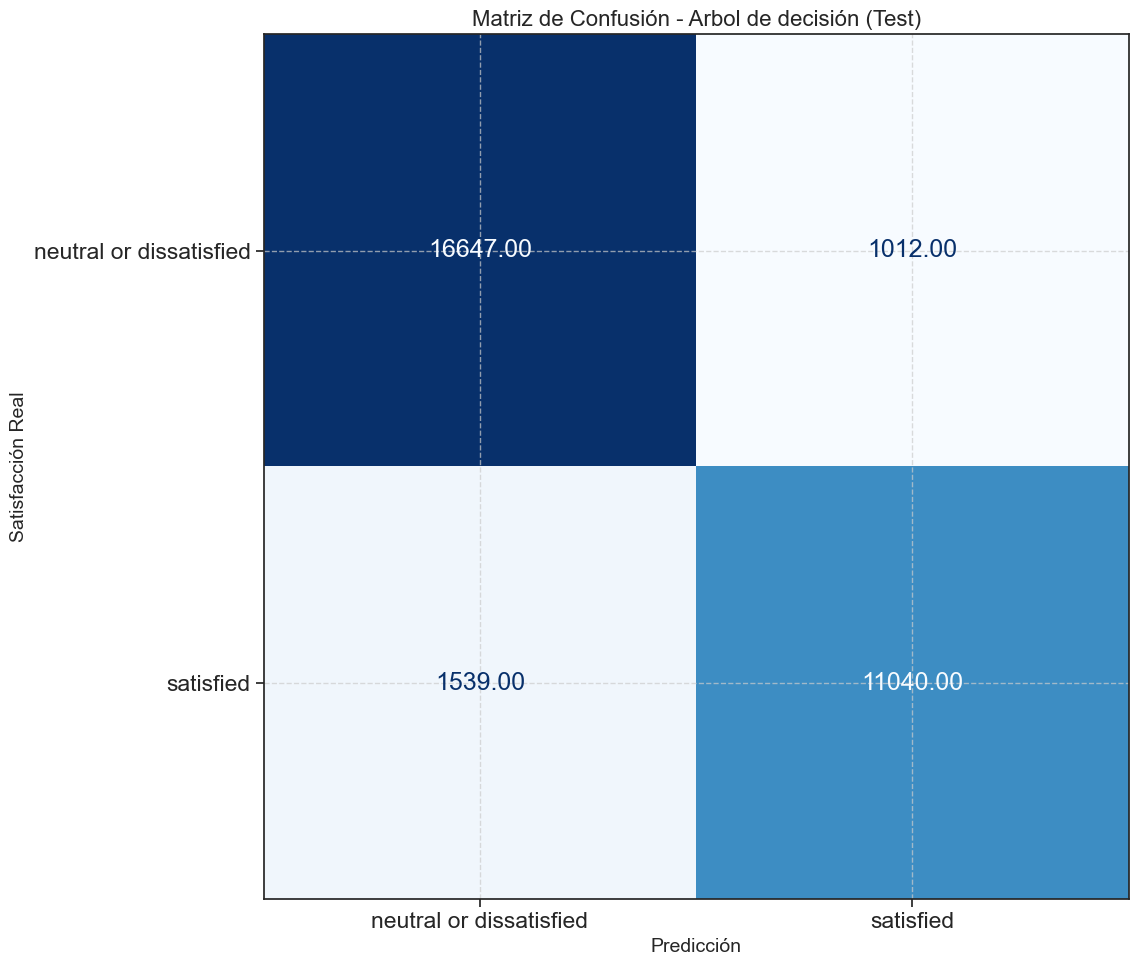

-------------------------------------------------------------------------------------------------------


## <ins>Feature Importance SHAP Arbol de decisión:</ins>

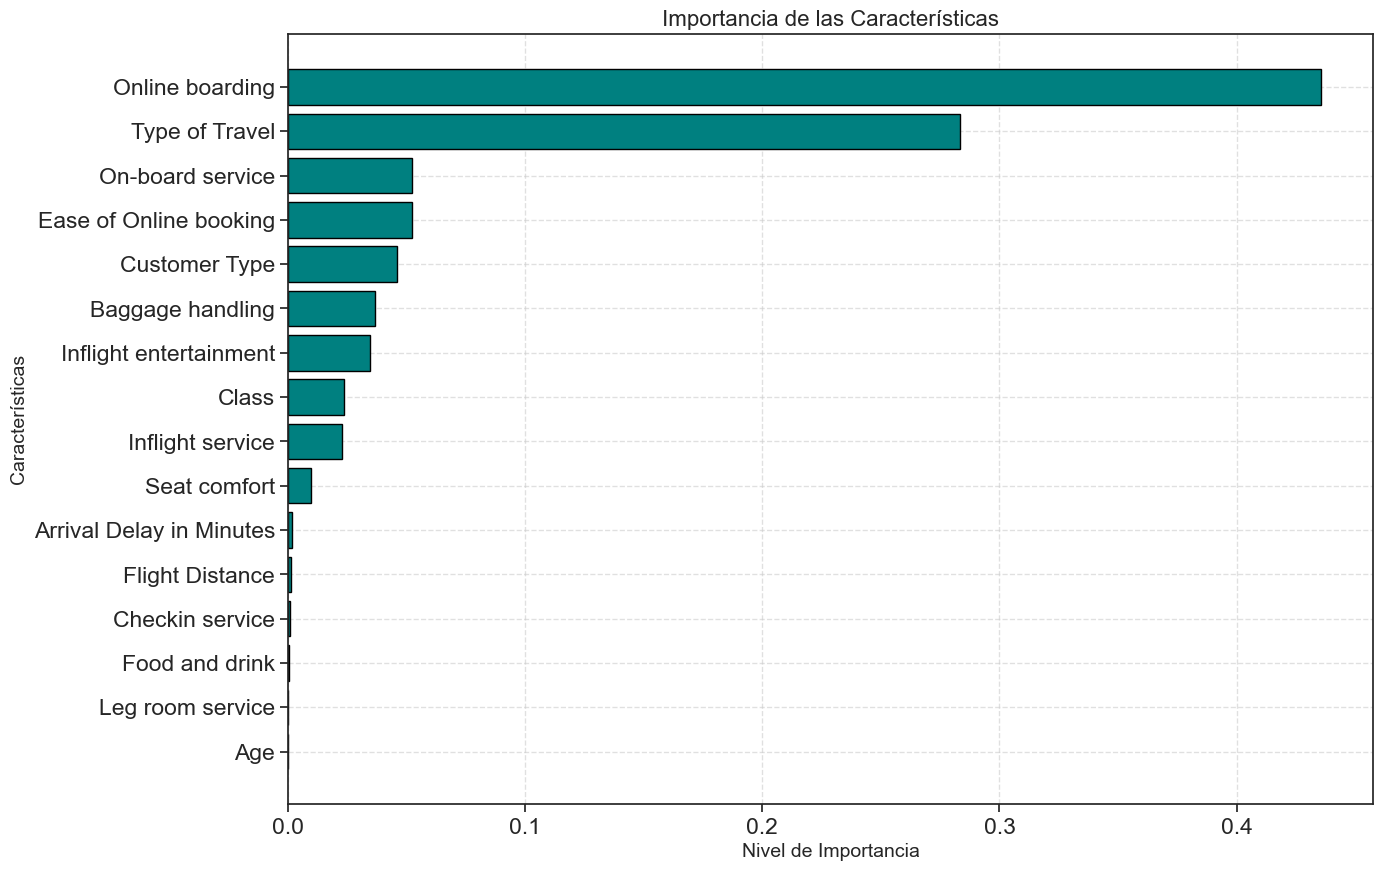

## <ins>Histograma de probabilidad Arbol de decisión:</ins>

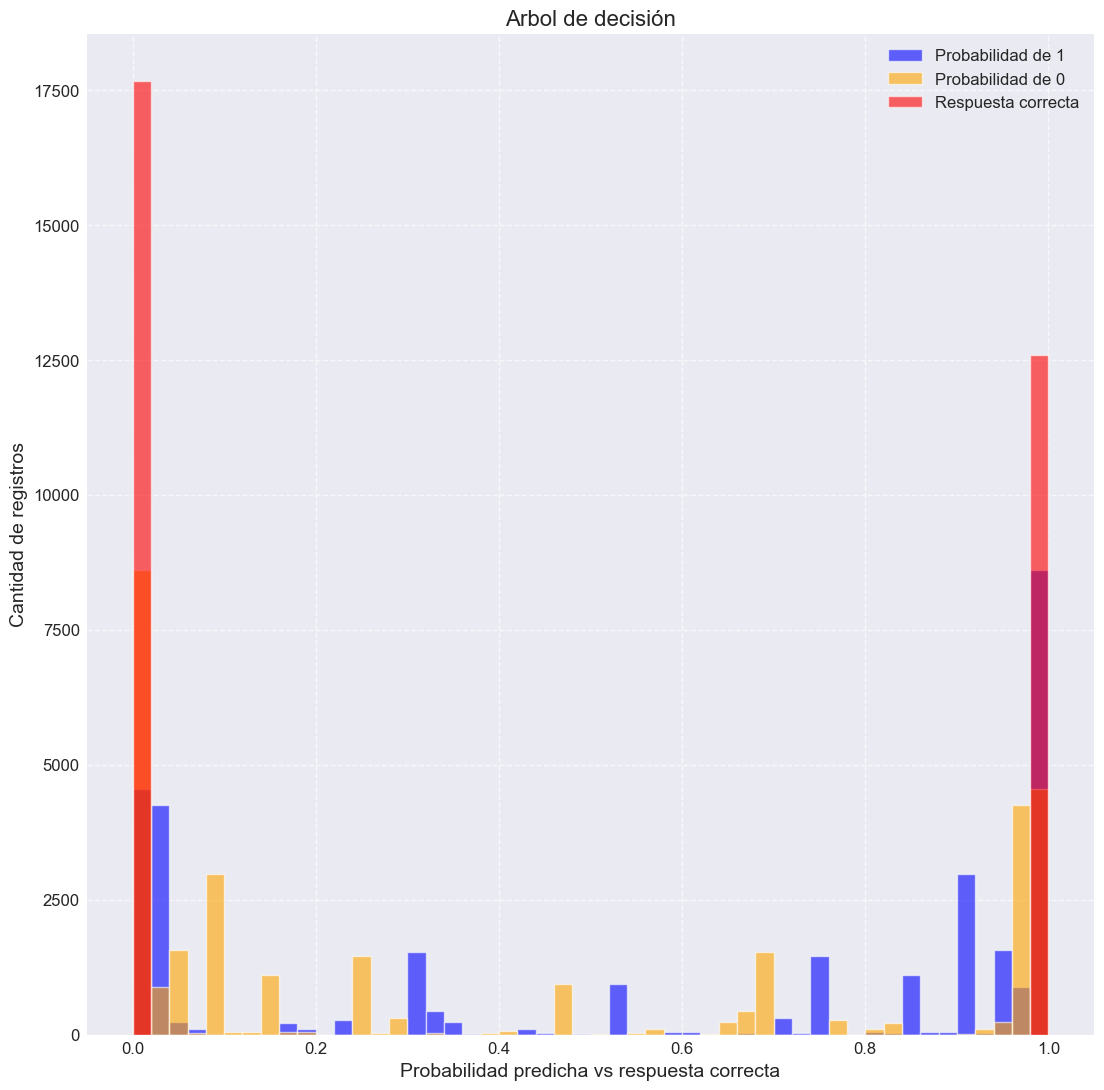

## <ins>Curva ROC Arbol de decisión:</ins>

roc_auc_score: 0.9695355558431616


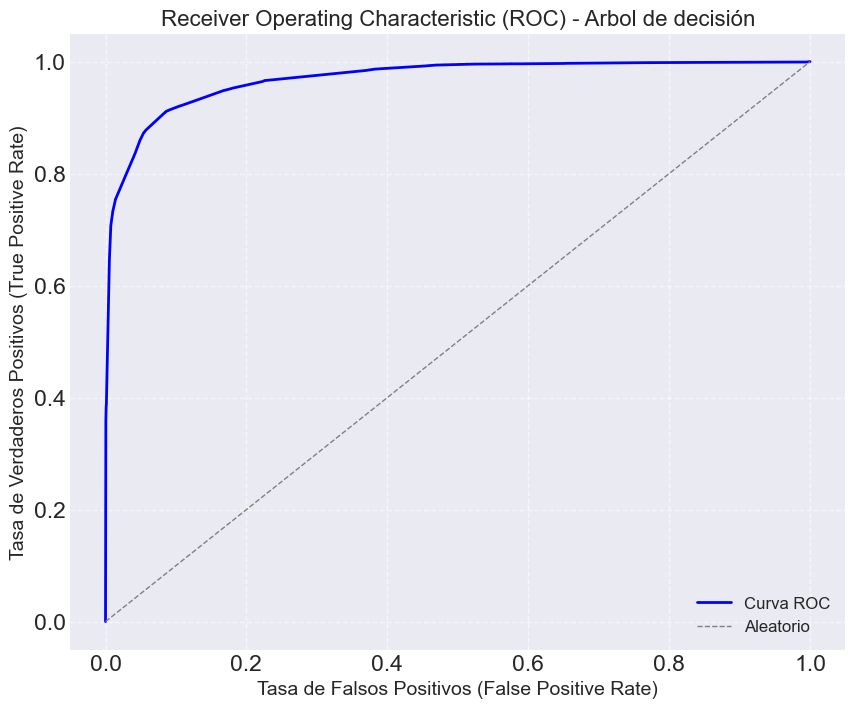

## <ins>Cross-validation Arbol de decisión:</ins>

Accuracy: 0.915 (0.006)


## <ins>Stratified K-Fold Arbol de decisión:</ins>

Iteración 1, Accuracy: 0.9096513605442177, Precision: 0.8896236012207528
Iteración 2, Accuracy: 0.9173044217687075, Precision: 0.9057971014492754
Iteración 3, Accuracy: 0.9204931972789115, Precision: 0.9150498164656529
Iteración 4, Accuracy: 0.9136904761904762, Precision: 0.9131592967501332
Iteración 5, Accuracy: 0.9162414965986394, Precision: 0.9154704944178629
Iteración 6, Accuracy: 0.9081632653061225, Precision: 0.8833584715937657
Iteración 7, Accuracy: 0.9022108843537415, Precision: 0.8744372186093047
Iteración 8, Accuracy: 0.9253826530612245, Precision: 0.9294117647058824
Iteración 9, Accuracy: 0.9230442176870748, Precision: 0.9190751445086706
Iteración 10, Accuracy: 0.9130527210884354, Precision: 0.8827893175074184
Iteración 11, Accuracy: 0.9109079311078035, Precision: 0.8899036022323693
Iteración 12, Accuracy: 0.9094195194556666, Precision: 0.889511201629328
Iteración 13, Accuracy: 0.9172868381883904, Precision: 0.907012987012987
Iteración 14, Accuracy: 0.9117584520518818, Preci

## <ins>Reporte de Clasificacion Regresión logistica (test):</ins>

                         precision    recall  f1-score   support

neutral or dissatisfied  0.8950518 0.9147177 0.9047779     17659
              satisfied  0.8764662 0.8494316 0.8627372     12579

               accuracy                      0.8875587     30238
              macro avg  0.8857590 0.8820747 0.8837575     30238
           weighted avg  0.8873202 0.8875587 0.8872890     30238



## <ins>Explicación de las métricas del reporte de clasificacion de Regresión logistica (test):</ins>

(nota aclaratoria: neutral o no satisfecho: 0, satisfecho: 1)
- En cuanto a la precisión del modelo (es la capacidad del clasificador para no etiquetar como positivo una muestra que es negativa), este acertó en un porcentaje del 87.64662% que el pasajero estaba satisfecho,
mientras que en cuanto al porcentaje de precisión sobre los pasajeros que no estaban satisfechos fue del 89.50518%
- El accuracy (el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto correspondiente de etiquetas en y_true) del modelo nos dice que predijo en un porcentaje del 88.75587% la satisfacción de manera correcta
- Por definición, la función del recall es: intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas
en este caso el modelo tuvo la habilidad de encontrar sobre el total de los pasajeros satisfechos el 84.94316% de ellos
------------------------------------------------------------------------------------------


## <ins>Reporte de clasificacion de Regresión logistica (entrenamiento):</ins>

              precision    recall  f1-score   support

           0  0.8934195 0.9130203 0.9031135     41205
           1  0.8740069 0.8470869 0.8603364     29350

    accuracy                      0.8855928     70555
   macro avg  0.8837132 0.8800536 0.8817249     70555
weighted avg  0.8853441 0.8855928 0.8853188     70555

-------------------------------------------------------------------------------------------------------


## <ins>Matriz de confusión Regresión logistica:</ins>

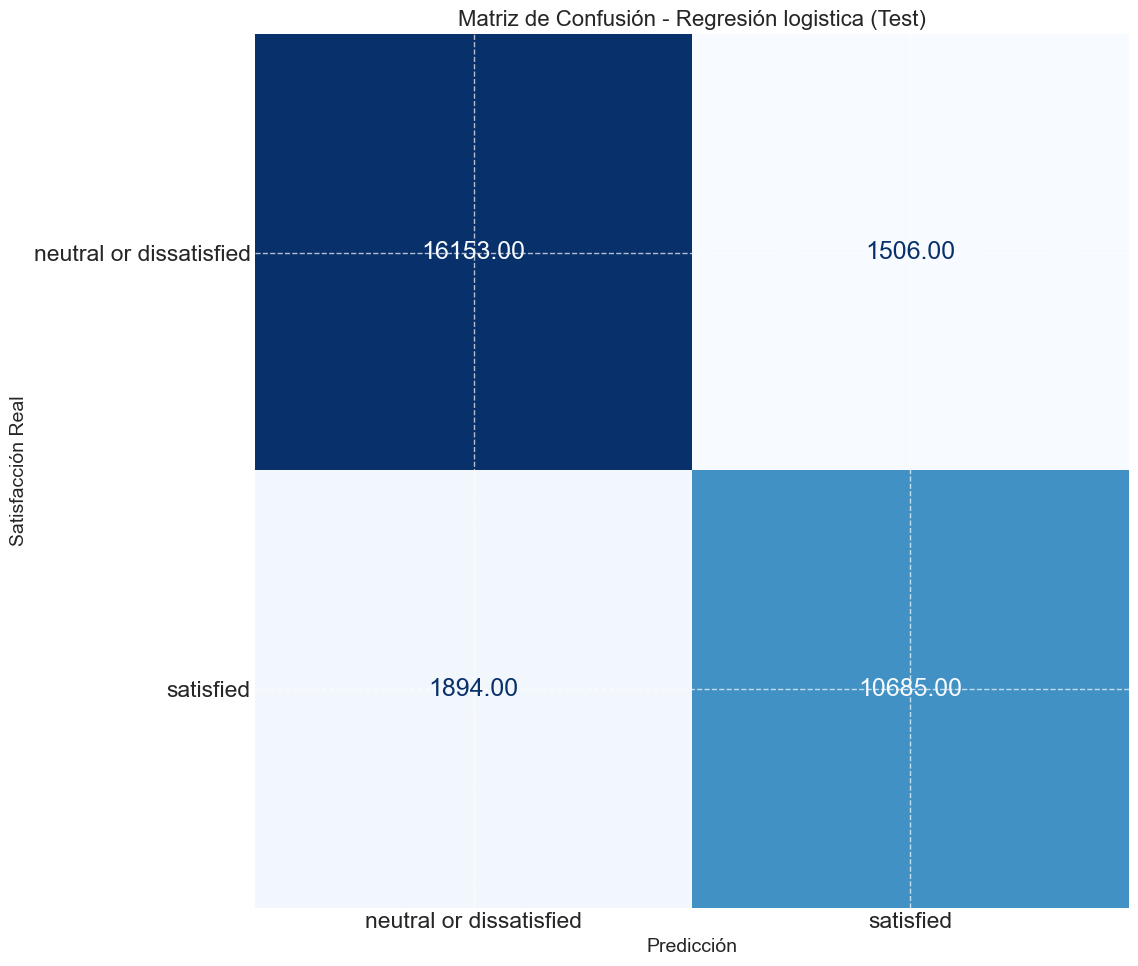

-------------------------------------------------------------------------------------------------------


## <ins>Histograma de probabilidad Regresión logistica:</ins>

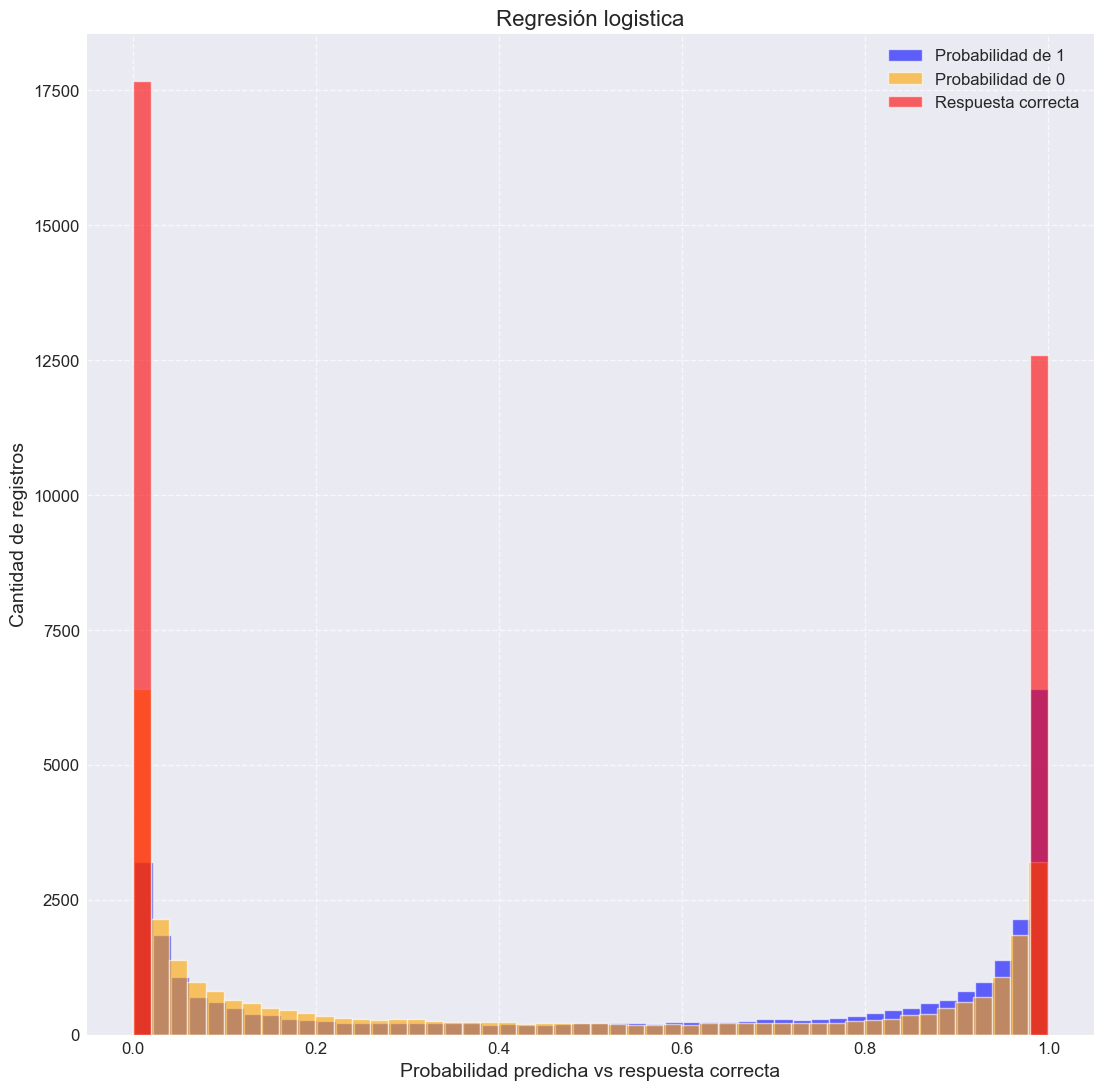

## <ins>Curva ROC Regresión logistica:</ins>

roc_auc_score: 0.9529501665449218


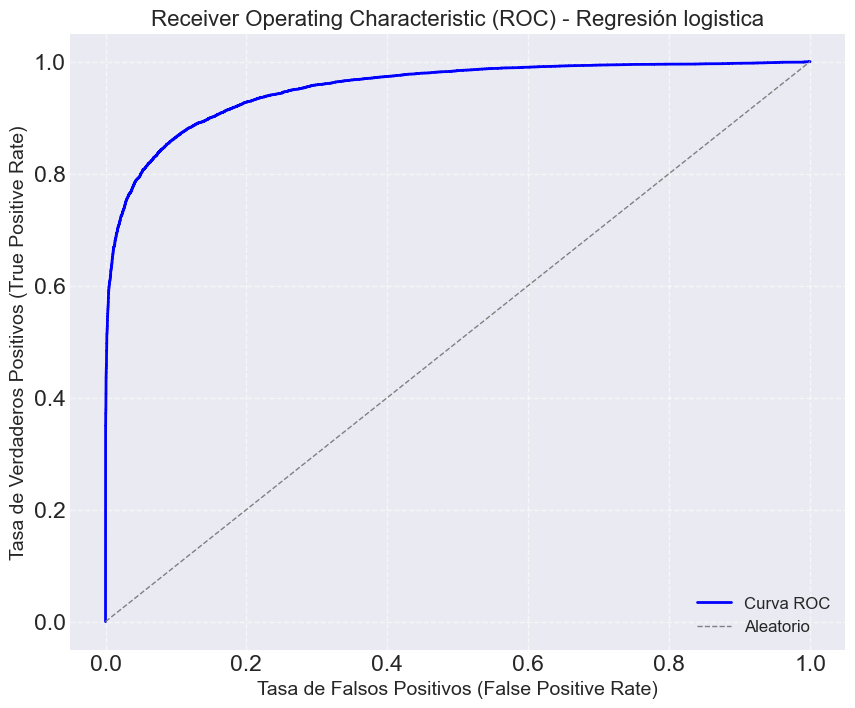

## <ins>Cross-validation Regresión logistica:</ins>

Accuracy: 0.886 (0.003)


## <ins>Stratified K-Fold Regresión logistica:</ins>

Iteración 1, Accuracy: 0.8803146258503401, Precision: 0.8653039832285115
Iteración 2, Accuracy: 0.8826530612244898, Precision: 0.8726790450928382
Iteración 3, Accuracy: 0.8830782312925171, Precision: 0.8716323296354992
Iteración 4, Accuracy: 0.8858418367346939, Precision: 0.8728991596638656
Iteración 5, Accuracy: 0.8835034013605442, Precision: 0.8806050783360346
Iteración 6, Accuracy: 0.8847789115646258, Precision: 0.8761297182349814
Iteración 7, Accuracy: 0.8835034013605442, Precision: 0.8633316142341413
Iteración 8, Accuracy: 0.8924319727891157, Precision: 0.8800419067574646
Iteración 9, Accuracy: 0.8898809523809523, Precision: 0.8841430859583556
Iteración 10, Accuracy: 0.8858418367346939, Precision: 0.8721174004192872
Iteración 11, Accuracy: 0.8849670423134169, Precision: 0.8690662493479395
Iteración 12, Accuracy: 0.8843291516053583, Precision: 0.8731501057082452
Iteración 13, Accuracy: 0.8932596215181798, Precision: 0.8826315789473684
Iteración 14, Accuracy: 0.8841165213693387, Pre

## <ins>Reporte de Clasificacion Random Forest (test):</ins>

                         precision    recall  f1-score   support

neutral or dissatisfied  0.9293020 0.9416162 0.9354185     17659
              satisfied  0.9164844 0.8994356 0.9078800     12579

               accuracy                      0.9240691     30238
              macro avg  0.9228932 0.9205259 0.9216492     30238
           weighted avg  0.9239699 0.9240691 0.9239625     30238



## <ins>Explicación de las métricas del reporte de clasificacion de Random Forest (test):</ins>

(nota aclaratoria: neutral o no satisfecho: 0, satisfecho: 1)
- En cuanto a la precisión del modelo (es la capacidad del clasificador para no etiquetar como positivo una muestra que es negativa), este acertó en un porcentaje del 91.64844% que el pasajero estaba satisfecho,
mientras que en cuanto al porcentaje de precisión sobre los pasajeros que no estaban satisfechos fue del 92.93020%
- El accuracy (el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto correspondiente de etiquetas en y_true) del modelo nos dice que predijo en un porcentaje del 92.40691% la satisfacción de manera correcta
- Por definición, la función del recall es: intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas
en este caso el modelo tuvo la habilidad de encontrar sobre el total de los pasajeros satisfechos el 89.94356% de ellos
------------------------------------------------------------------------------------------


## <ins>Reporte de clasificacion de Random Forest (entrenamiento):</ins>

              precision    recall  f1-score   support

           0  0.9265779 0.9402500 0.9333638     41205
           1  0.9143414 0.8954003 0.9047717     29350

    accuracy                      0.9215931     70555
   macro avg  0.9204596 0.9178252 0.9190678     70555
weighted avg  0.9214876 0.9215931 0.9214699     70555

-------------------------------------------------------------------------------------------------------


## <ins>Matriz de confusión Random Forest:</ins>

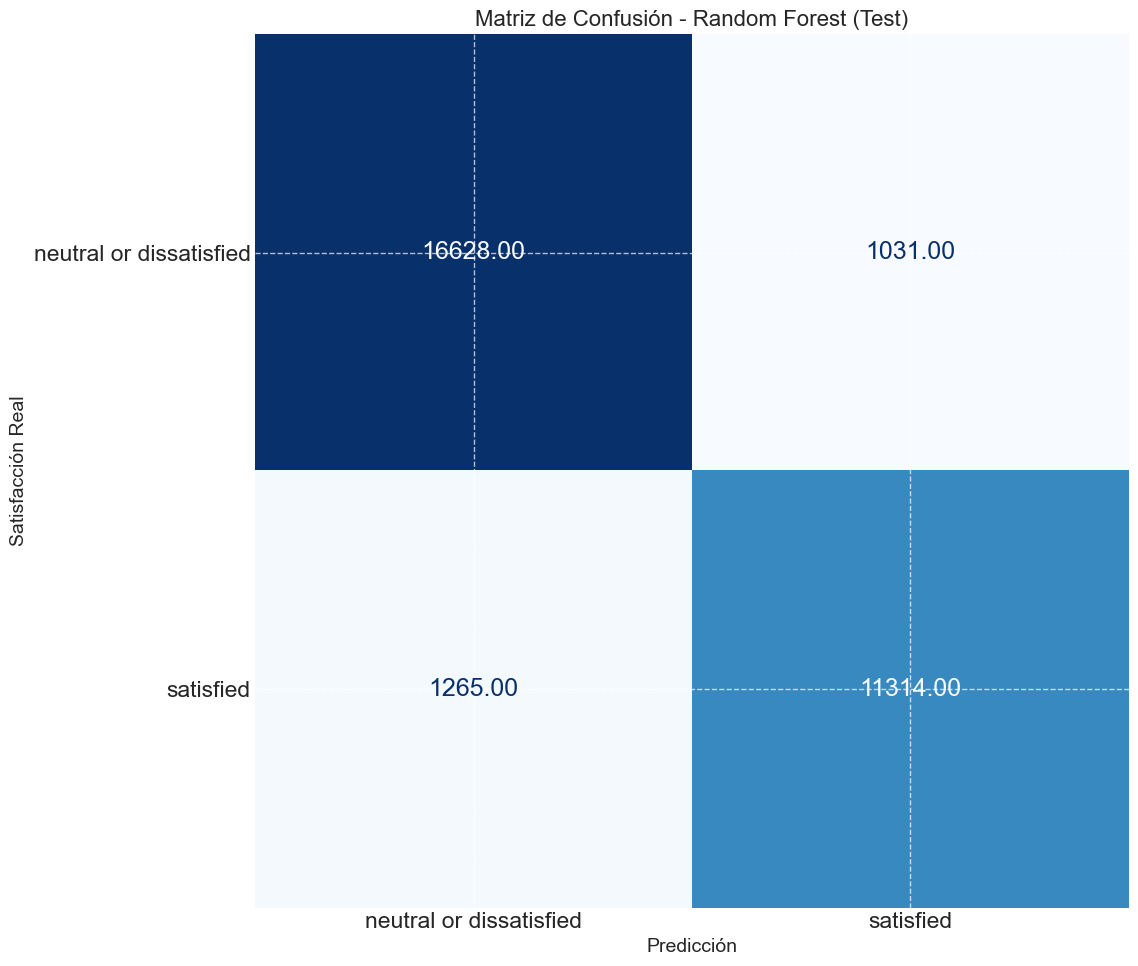

-------------------------------------------------------------------------------------------------------


## <ins>Feature Importance SHAP Random Forest:</ins>

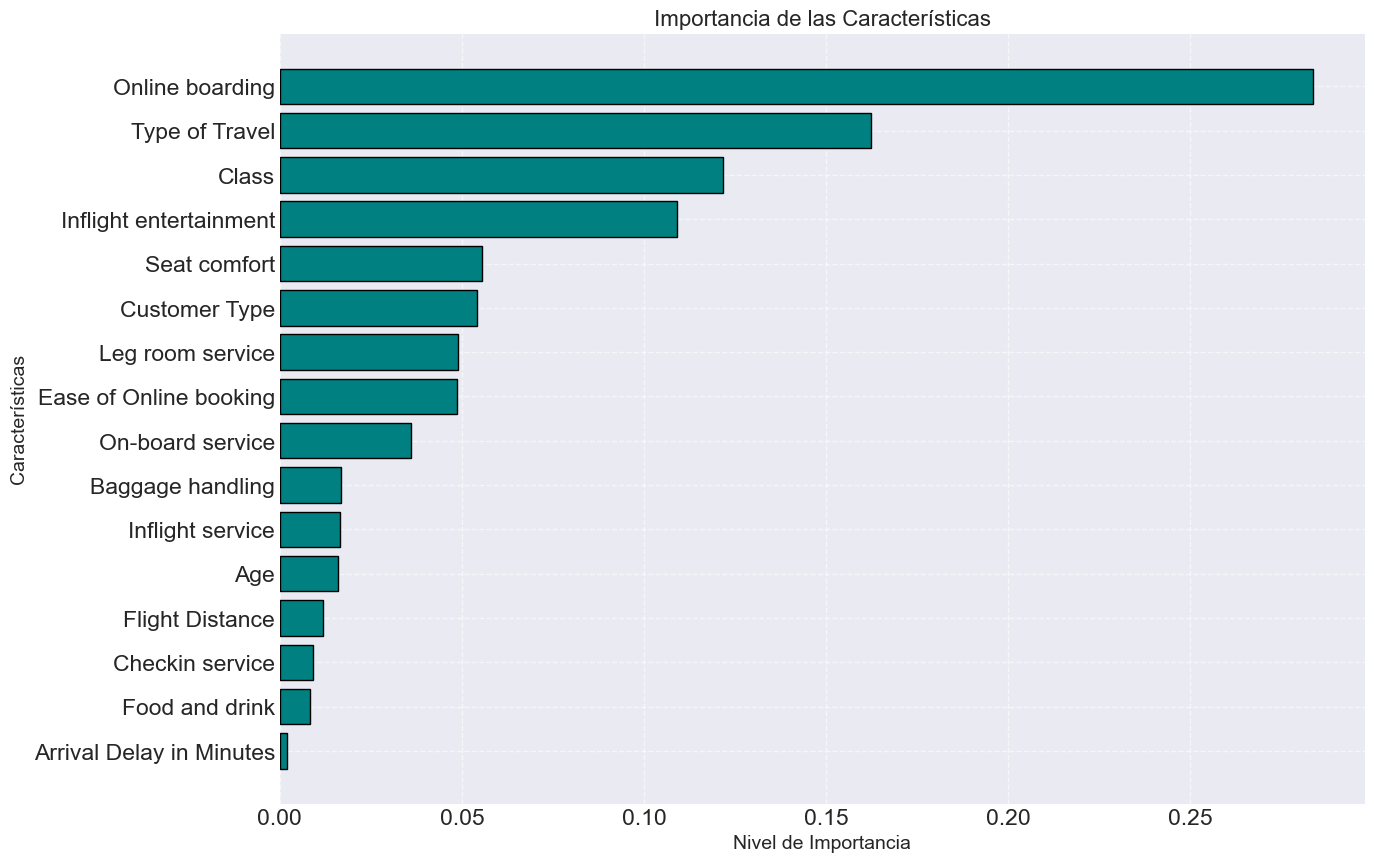

## <ins>Histograma de probabilidad Random Forest:</ins>

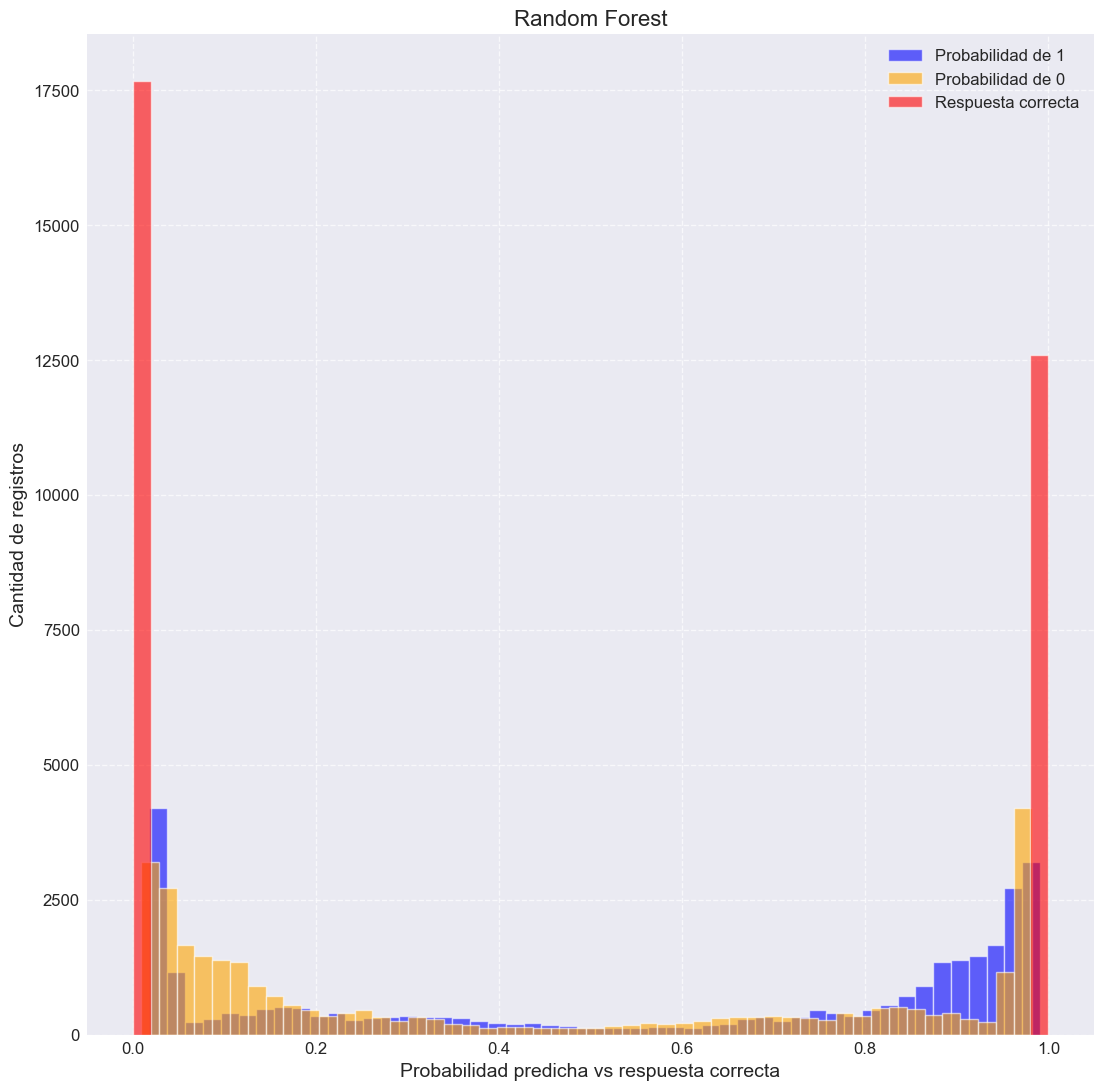

## <ins>Curva ROC Random Forest:</ins>

roc_auc_score: 0.973708683347868


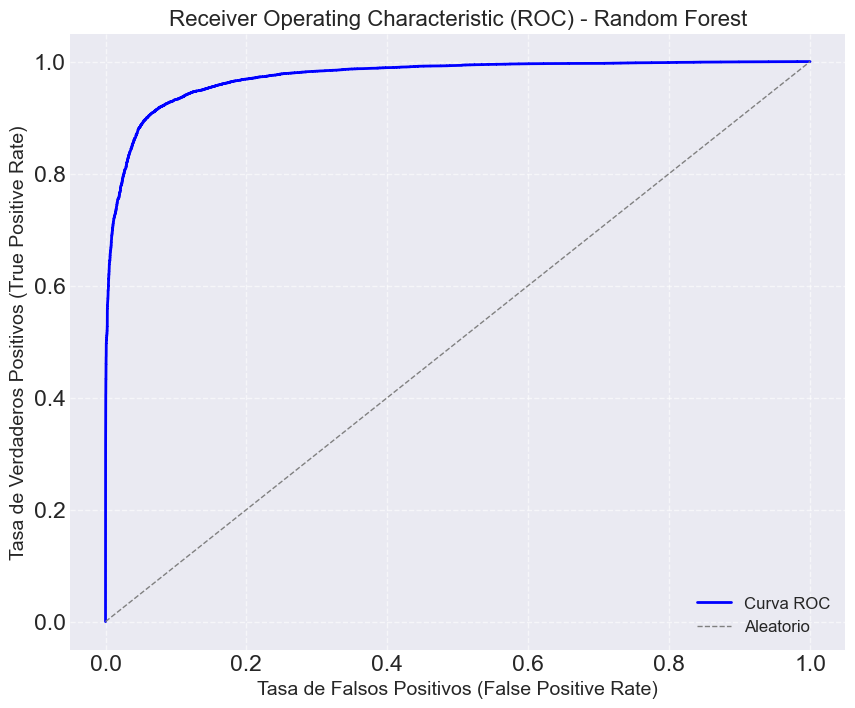

## <ins>Cross-validation Random Forest:</ins>

Accuracy: 0.919 (0.002)


## <ins>Stratified K-Fold Random Forest:</ins>

Iteración 1, Accuracy: 0.9141156462585034, Precision: 0.9012919896640826
Iteración 2, Accuracy: 0.9194302721088435, Precision: 0.9117954070981211
Iteración 3, Accuracy: 0.9200680272108843, Precision: 0.9184753838009528
Iteración 4, Accuracy: 0.9204931972789115, Precision: 0.9154855643044619
Iteración 5, Accuracy: 0.9241071428571429, Precision: 0.9201680672268907
Iteración 6, Accuracy: 0.9158163265306123, Precision: 0.9075718015665797
Iteración 7, Accuracy: 0.9173044217687075, Precision: 0.907061266874351
Iteración 8, Accuracy: 0.9266581632653061, Precision: 0.9150360453141092
Iteración 9, Accuracy: 0.9226190476190477, Precision: 0.9203166226912929
Iteración 10, Accuracy: 0.9175170068027211, Precision: 0.9041731066460588
Iteración 11, Accuracy: 0.9217520731448012, Precision: 0.9092783505154639
Iteración 12, Accuracy: 0.914522645120136, Precision: 0.9063807531380753
Iteración 13, Accuracy: 0.9249415266850947, Precision: 0.9163636363636364
Iteración 14, Accuracy: 0.91749946842441, Precisi

## <ins>Reporte de Clasificacion Gradient Boosting classifier (test):</ins>

                         precision    recall  f1-score   support

neutral or dissatisfied  0.9396537 0.9558299 0.9476728     17659
              satisfied  0.9364562 0.9138246 0.9250020     12579

               accuracy                      0.9383557     30238
              macro avg  0.9380550 0.9348273 0.9363374     30238
           weighted avg  0.9383236 0.9383557 0.9382418     30238



## <ins>Explicación de las métricas del reporte de clasificacion de Gradient Boosting classifier (test):</ins>

(nota aclaratoria: neutral o no satisfecho: 0, satisfecho: 1)
- En cuanto a la precisión del modelo (es la capacidad del clasificador para no etiquetar como positivo una muestra que es negativa), este acertó en un porcentaje del 93.64562% que el pasajero estaba satisfecho,
mientras que en cuanto al porcentaje de precisión sobre los pasajeros que no estaban satisfechos fue del 93.96537%
- El accuracy (el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto correspondiente de etiquetas en y_true) del modelo nos dice que predijo en un porcentaje del 93.83557% la satisfacción de manera correcta
- Por definición, la función del recall es: intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas
en este caso el modelo tuvo la habilidad de encontrar sobre el total de los pasajeros satisfechos el 91.38246% de ellos
------------------------------------------------------------------------------------------


## <ins>Reporte de clasificacion de Gradient Boosting classifier (entrenamiento):</ins>

              precision    recall  f1-score   support

           0  0.9418951 0.9599078 0.9508161     41205
           1  0.9421609 0.9168654 0.9293411     29350

    accuracy                      0.9420027     70555
   macro avg  0.9420280 0.9383866 0.9400786     70555
weighted avg  0.9420057 0.9420027 0.9418828     70555

-------------------------------------------------------------------------------------------------------


## <ins>Matriz de confusión Gradient Boosting classifier:</ins>

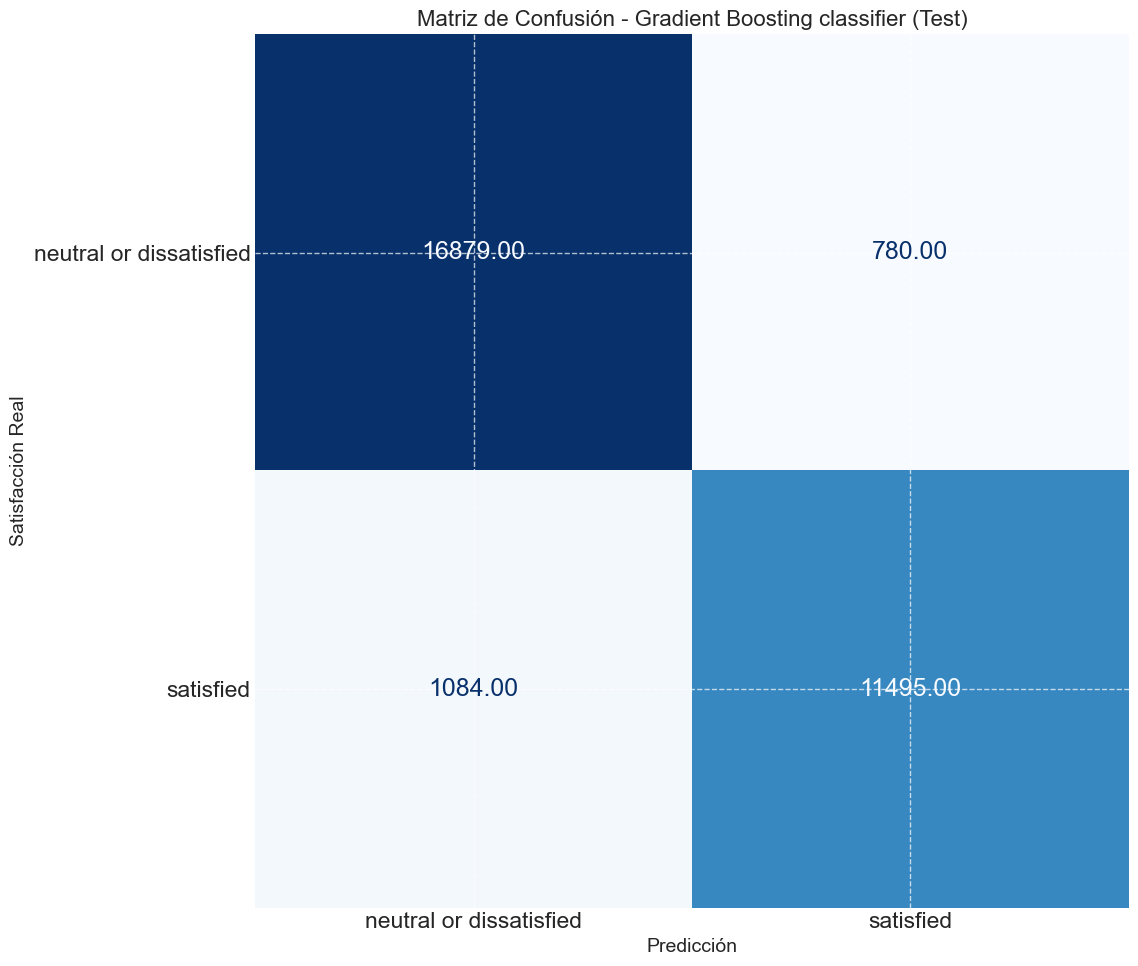

-------------------------------------------------------------------------------------------------------


## <ins>Feature Importance SHAP Gradient Boosting classifier:</ins>

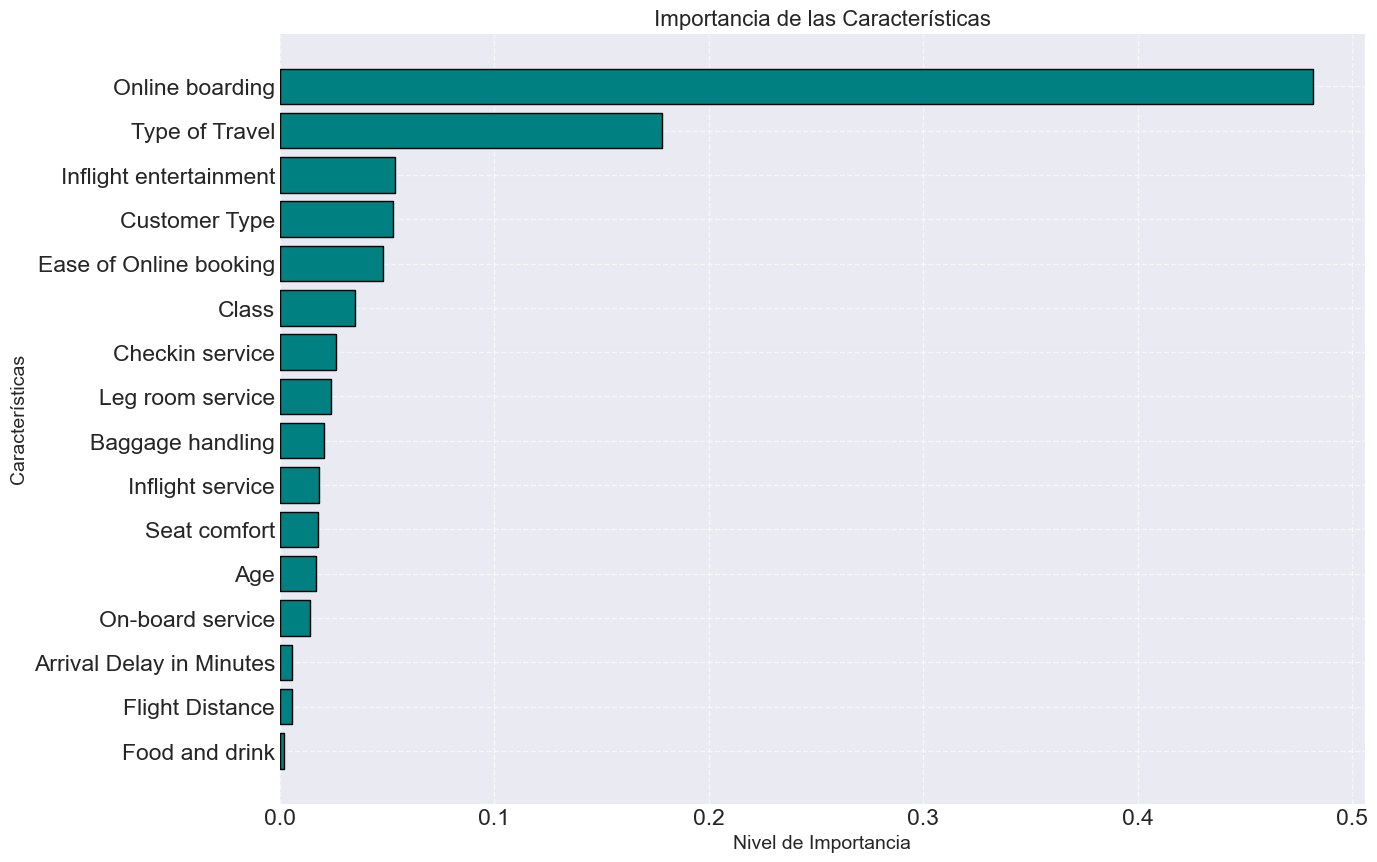

## <ins>Histograma de probabilidad Gradient Boosting classifier:</ins>

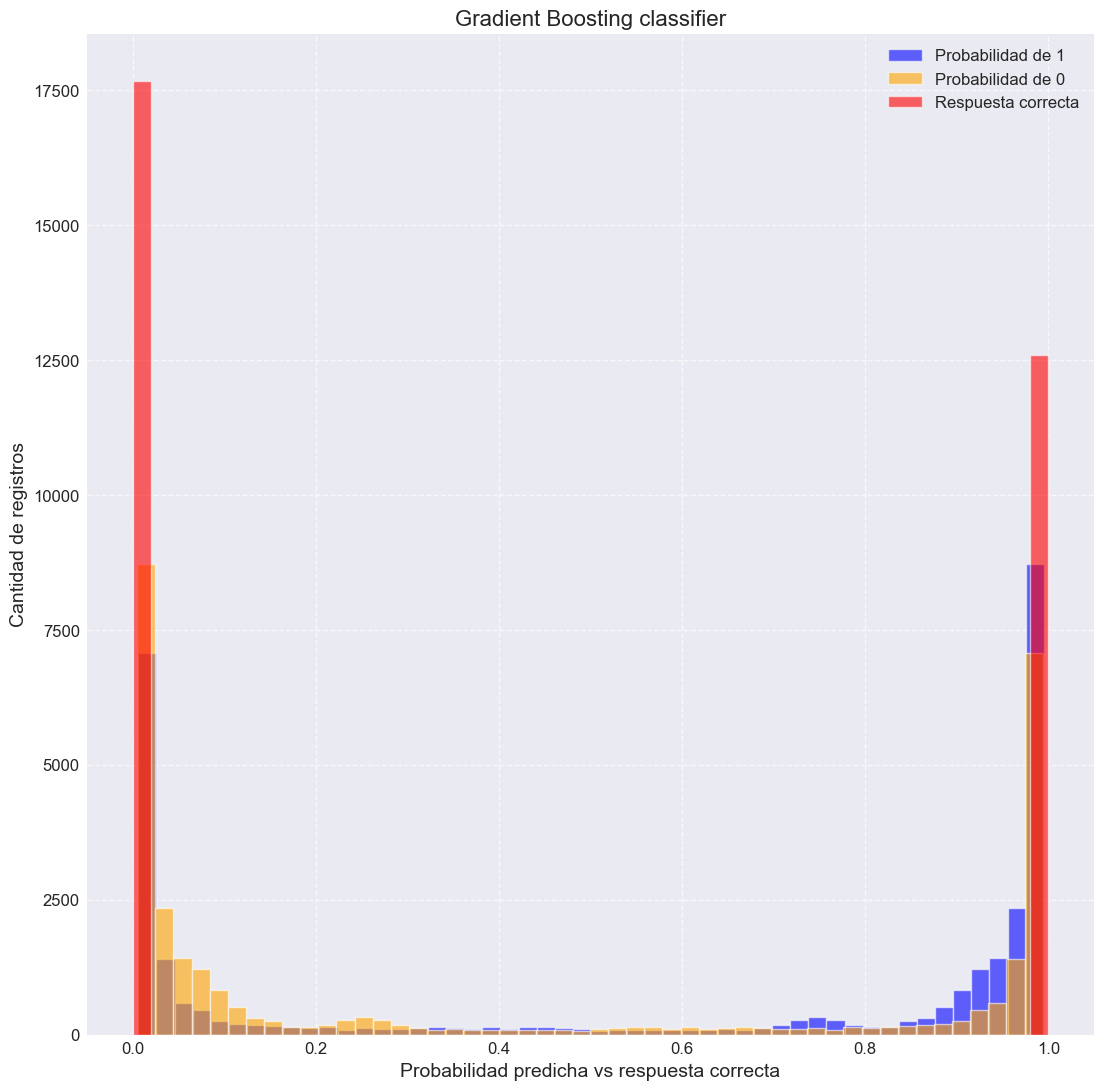

## <ins>Curva ROC Gradient Boosting classifier:</ins>

roc_auc_score: 0.9844265942623333


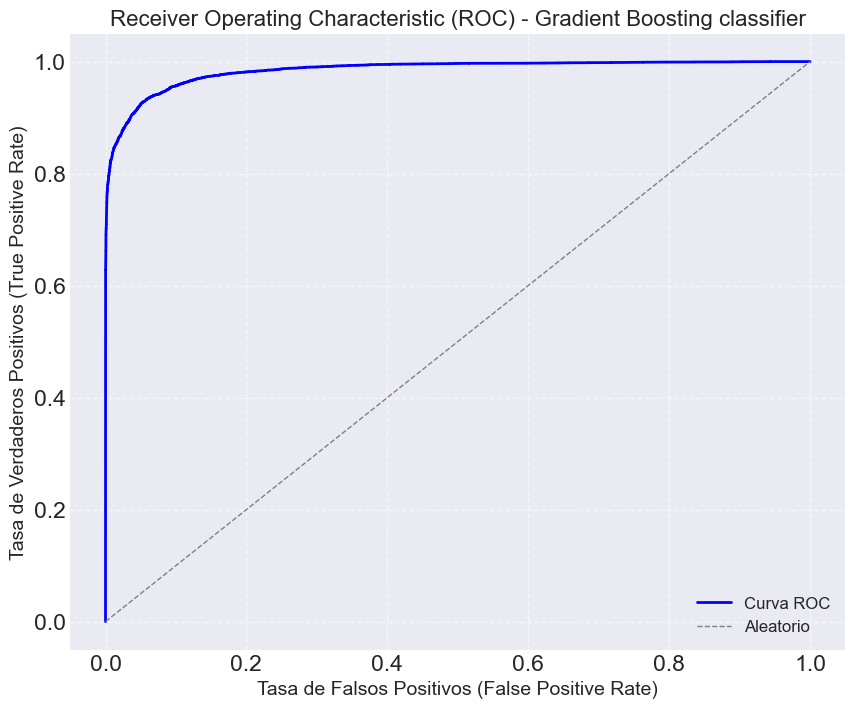

## <ins>Cross-validation Gradient Boosting classifier:</ins>

Accuracy: 0.939 (0.002)


## <ins>Stratified K-Fold Gradient Boosting classifier:</ins>

Iteración 1, Accuracy: 0.9330357142857143, Precision: 0.9330168776371308
Iteración 2, Accuracy: 0.9428146258503401, Precision: 0.9446786090621707
Iteración 3, Accuracy: 0.9381377551020408, Precision: 0.9407407407407408
Iteración 4, Accuracy: 0.9387755102040817, Precision: 0.9413008989952406
Iteración 5, Accuracy: 0.9409013605442177, Precision: 0.9453580901856764
Iteración 6, Accuracy: 0.9334608843537415, Precision: 0.9303664921465968
Iteración 7, Accuracy: 0.9381377551020408, Precision: 0.93521421107628
Iteración 8, Accuracy: 0.9460034013605442, Precision: 0.9465128474043
Iteración 9, Accuracy: 0.9400510204081632, Precision: 0.94148655772272
Iteración 10, Accuracy: 0.9368622448979592, Precision: 0.9313929313929314
Iteración 11, Accuracy: 0.9347225175419944, Precision: 0.9292035398230089
Iteración 12, Accuracy: 0.9325962151817988, Precision: 0.9310889005786428
Iteración 13, Accuracy: 0.9470550712311291, Precision: 0.9489742240925828
Iteración 14, Accuracy: 0.934935147778014, Precision: 

## <ins>Reporte de Clasificacion Linear discriminant analysis (test):</ins>

                         precision    recall  f1-score   support

neutral or dissatisfied  0.8944556 0.9099043 0.9021138     17659
              satisfied  0.8703764 0.8492726 0.8596950     12579

               accuracy                      0.8846815     30238
              macro avg  0.8824160 0.8795884 0.8809044     30238
           weighted avg  0.8844386 0.8846815 0.8844676     30238



## <ins>Explicación de las métricas del reporte de clasificacion de Linear discriminant analysis (test):</ins>

(nota aclaratoria: neutral o no satisfecho: 0, satisfecho: 1)
- En cuanto a la precisión del modelo (es la capacidad del clasificador para no etiquetar como positivo una muestra que es negativa), este acertó en un porcentaje del 87.03764% que el pasajero estaba satisfecho,
mientras que en cuanto al porcentaje de precisión sobre los pasajeros que no estaban satisfechos fue del 89.44556%
- El accuracy (el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto correspondiente de etiquetas en y_true) del modelo nos dice que predijo en un porcentaje del 88.46815% la satisfacción de manera correcta
- Por definición, la función del recall es: intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas
en este caso el modelo tuvo la habilidad de encontrar sobre el total de los pasajeros satisfechos el 84.92726% de ellos
------------------------------------------------------------------------------------------


## <ins>Reporte de clasificacion de Linear discriminant analysis (entrenamiento):</ins>

              precision    recall  f1-score   support

           0  0.8934624 0.9071229 0.9002408     41205
           1  0.8667479 0.8481431 0.8573446     29350

    accuracy                      0.8825881     70555
   macro avg  0.8801052 0.8776330 0.8787927     70555
weighted avg  0.8823495 0.8825881 0.8823965     70555

-------------------------------------------------------------------------------------------------------


## <ins>Matriz de confusión Linear discriminant analysis:</ins>

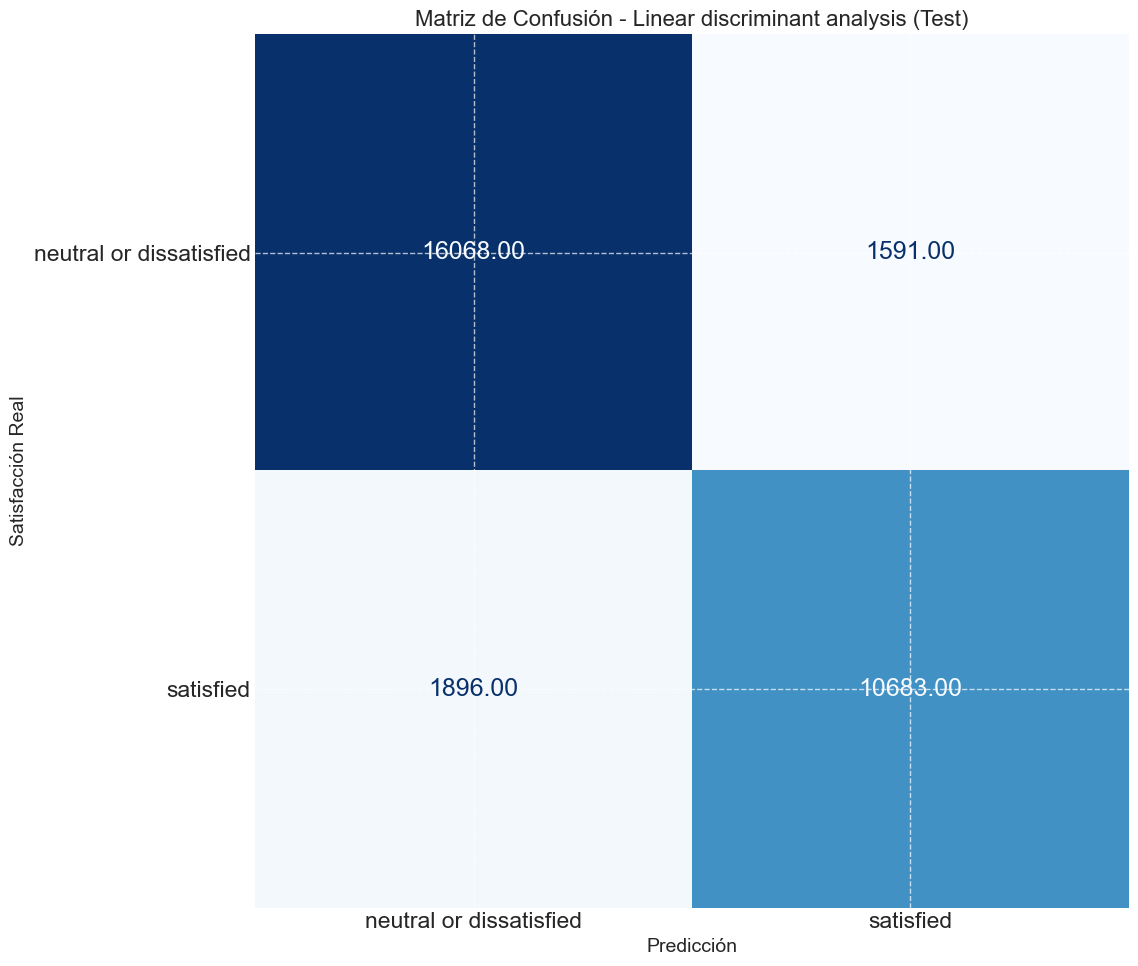

-------------------------------------------------------------------------------------------------------


## <ins>Feature Importance SHAP Linear discriminant analysis:</ins>

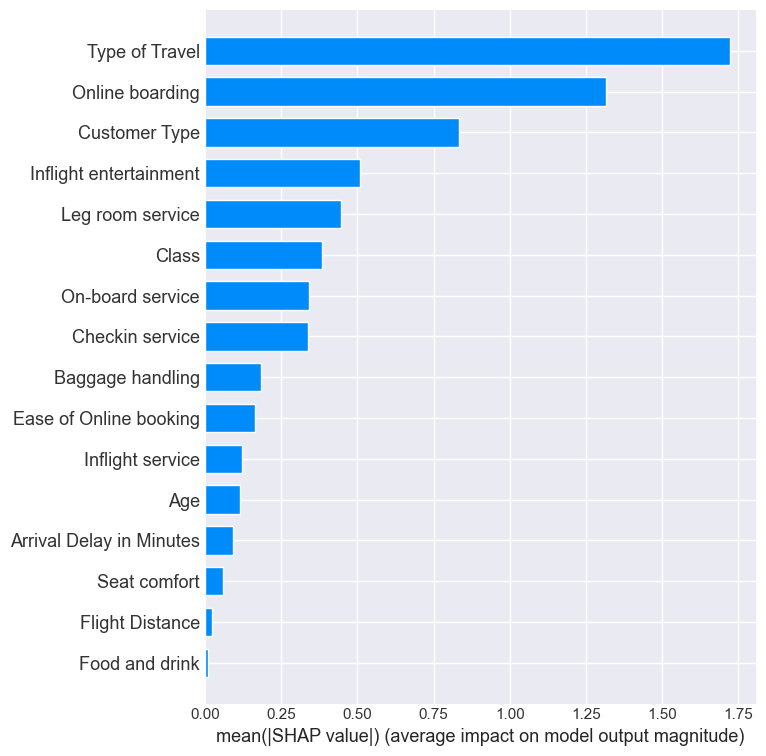

## <ins>Histograma de probabilidad Linear discriminant analysis:</ins>

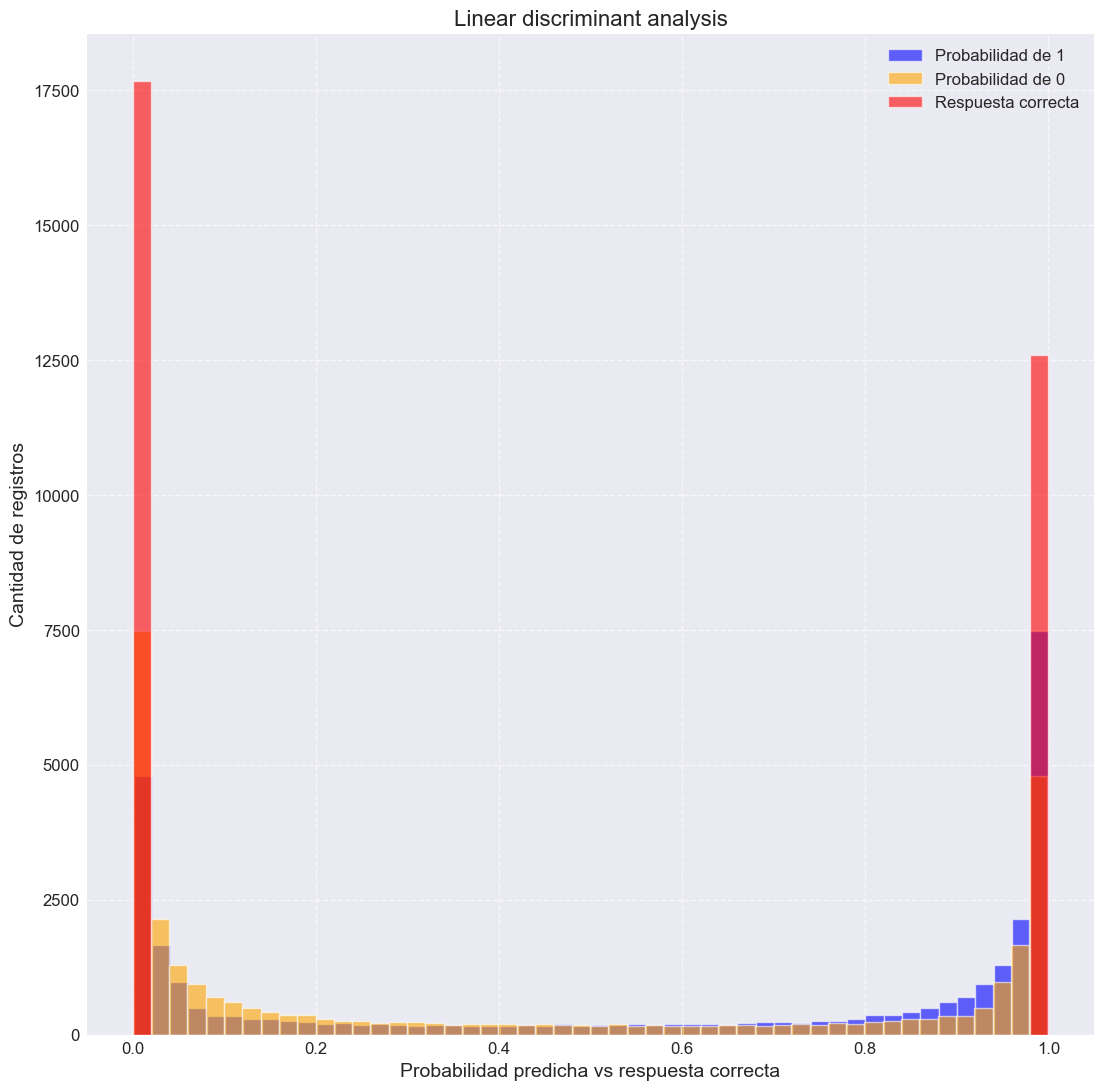

## <ins>Curva ROC Linear discriminant analysis:</ins>

roc_auc_score: 0.9499042826053763


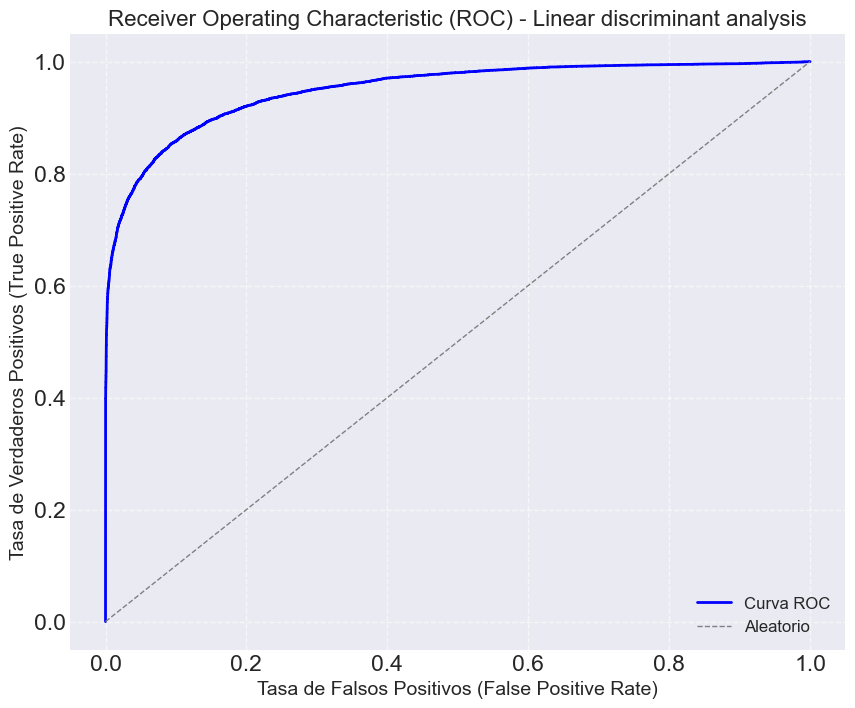

## <ins>Cross-validation Linear discriminant analysis:</ins>

Accuracy: 0.882 (0.003)


## <ins>Stratified K-Fold Linear discriminant analysis:</ins>

Iteración 1, Accuracy: 0.8803146258503401, Precision: 0.8615145228215768
Iteración 2, Accuracy: 0.8824404761904762, Precision: 0.8663883089770354
Iteración 3, Accuracy: 0.8798894557823129, Precision: 0.8678646934460887
Iteración 4, Accuracy: 0.8809523809523809, Precision: 0.8666666666666667
Iteración 5, Accuracy: 0.8807397959183674, Precision: 0.8736616702355461
Iteración 6, Accuracy: 0.8796768707482994, Precision: 0.866245392311743
Iteración 7, Accuracy: 0.8796768707482994, Precision: 0.8564838544336237
Iteración 8, Accuracy: 0.8896683673469388, Precision: 0.8725388601036269
Iteración 9, Accuracy: 0.8852040816326531, Precision: 0.8754636989931107
Iteración 10, Accuracy: 0.8826530612244898, Precision: 0.8653146125845034
Iteración 11, Accuracy: 0.8849670423134169, Precision: 0.8645028335909325
Iteración 12, Accuracy: 0.8800765468849671, Precision: 0.8663157894736843
Iteración 13, Accuracy: 0.8934722517541994, Precision: 0.8798955613577023
Iteración 14, Accuracy: 0.8798639166489475, Prec

## <ins>Reporte de Clasificacion XGBOOST (test):</ins>

                         precision    recall  f1-score   support

neutral or dissatisfied  0.9409486 0.9627952 0.9517465     17659
              satisfied  0.9460104 0.9151761 0.9303378     12579

               accuracy                      0.9429856     30238
              macro avg  0.9434795 0.9389856 0.9410422     30238
           weighted avg  0.9430543 0.9429856 0.9428405     30238



## <ins>Explicación de las métricas del reporte de clasificacion de XGBOOST (test):</ins>

(nota aclaratoria: neutral o no satisfecho: 0, satisfecho: 1)
- En cuanto a la precisión del modelo (es la capacidad del clasificador para no etiquetar como positivo una muestra que es negativa), este acertó en un porcentaje del 94.60104% que el pasajero estaba satisfecho,
mientras que en cuanto al porcentaje de precisión sobre los pasajeros que no estaban satisfechos fue del 94.09486%
- El accuracy (el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto correspondiente de etiquetas en y_true) del modelo nos dice que predijo en un porcentaje del 94.29856% la satisfacción de manera correcta
- Por definición, la función del recall es: intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas
en este caso el modelo tuvo la habilidad de encontrar sobre el total de los pasajeros satisfechos el 91.51761% de ellos
------------------------------------------------------------------------------------------


## <ins>Reporte de clasificacion de XGBOOST (entrenamiento):</ins>

              precision    recall  f1-score   support

           0  0.9497746 0.9715568 0.9605423     41205
           1  0.9587397 0.9278705 0.9430525     29350

    accuracy                      0.9533839     70555
   macro avg  0.9542571 0.9497137 0.9517974     70555
weighted avg  0.9535040 0.9533839 0.9532668     70555

-------------------------------------------------------------------------------------------------------


## <ins>Matriz de confusión XGBOOST:</ins>

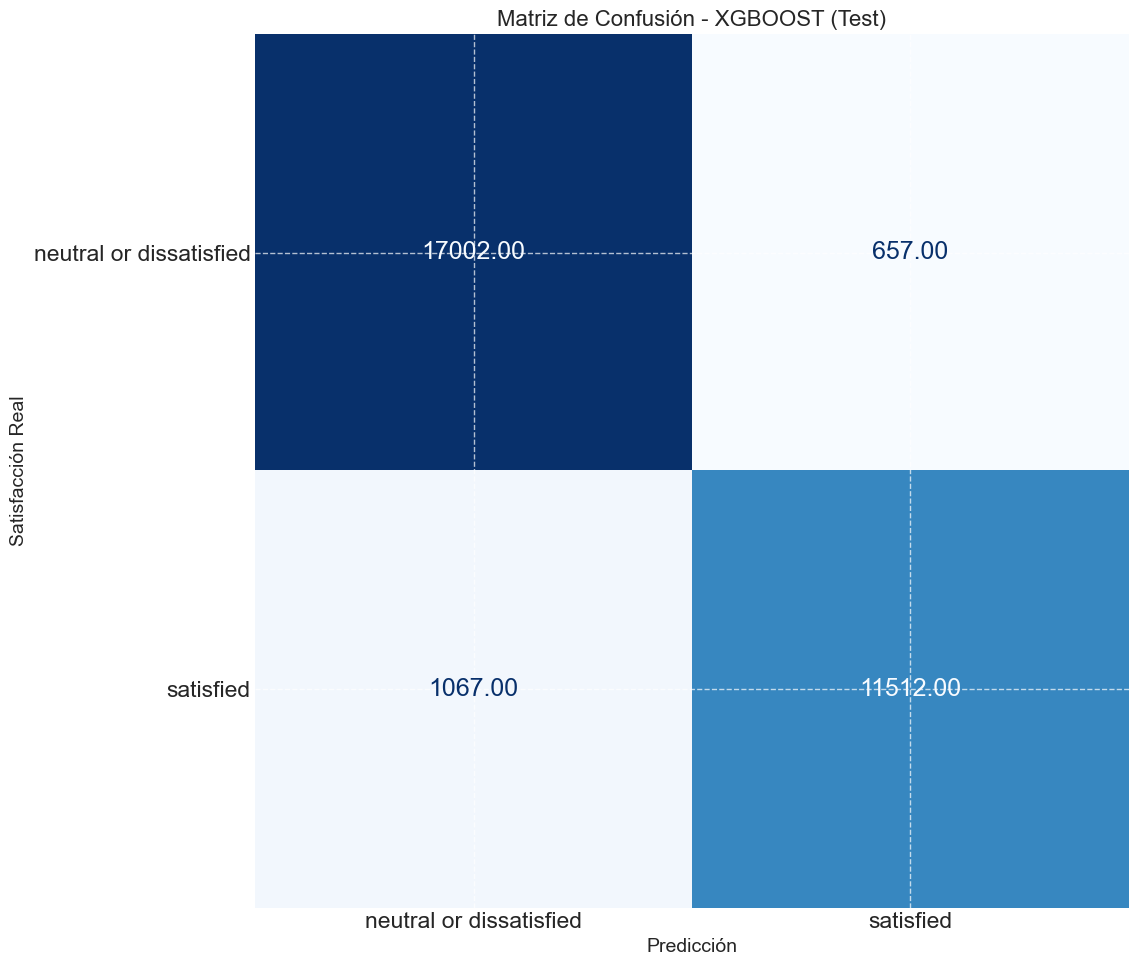

-------------------------------------------------------------------------------------------------------


## <ins>Feature Importance SHAP XGBOOST:</ins>

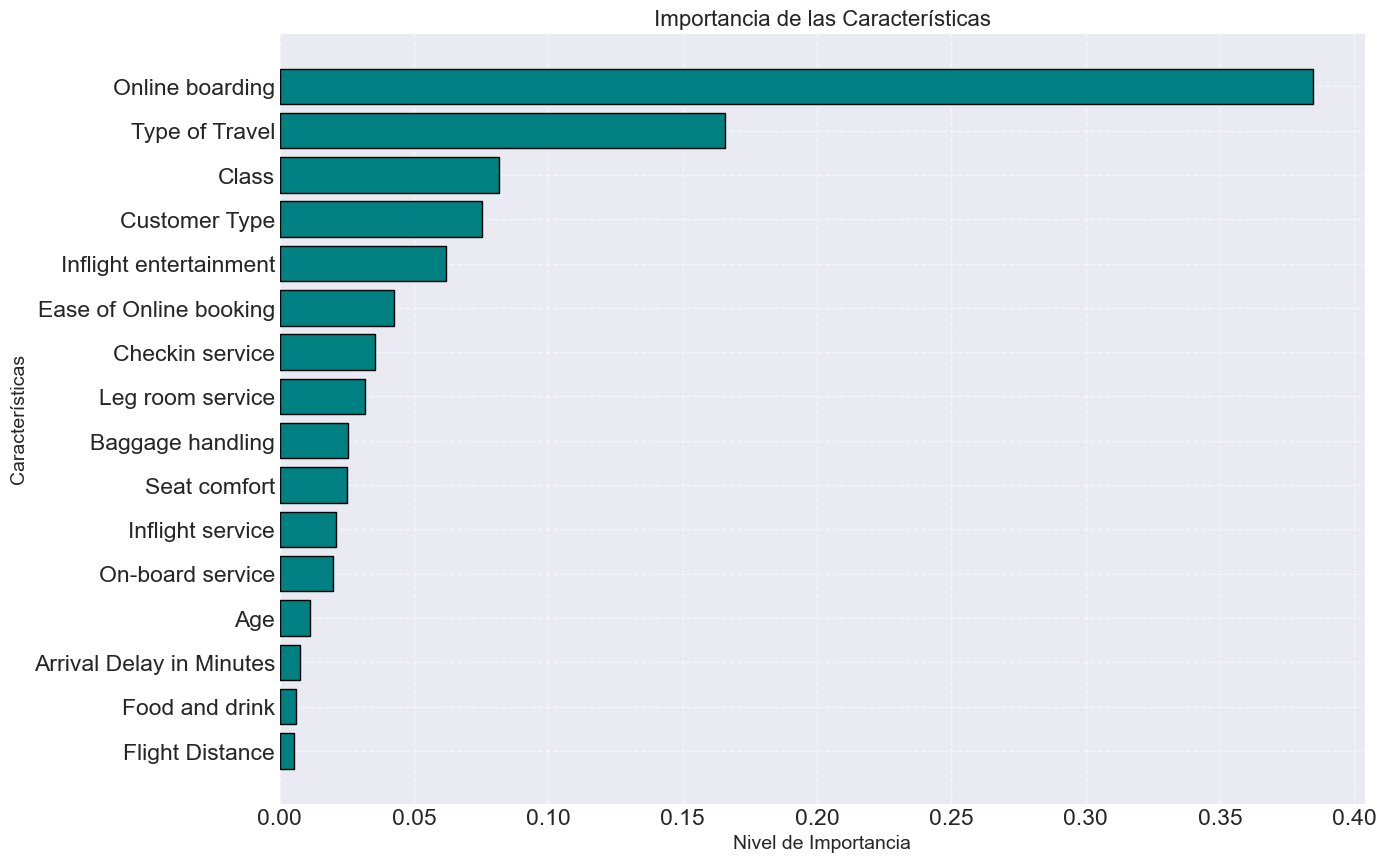

## <ins>Histograma de probabilidad XGBOOST:</ins>

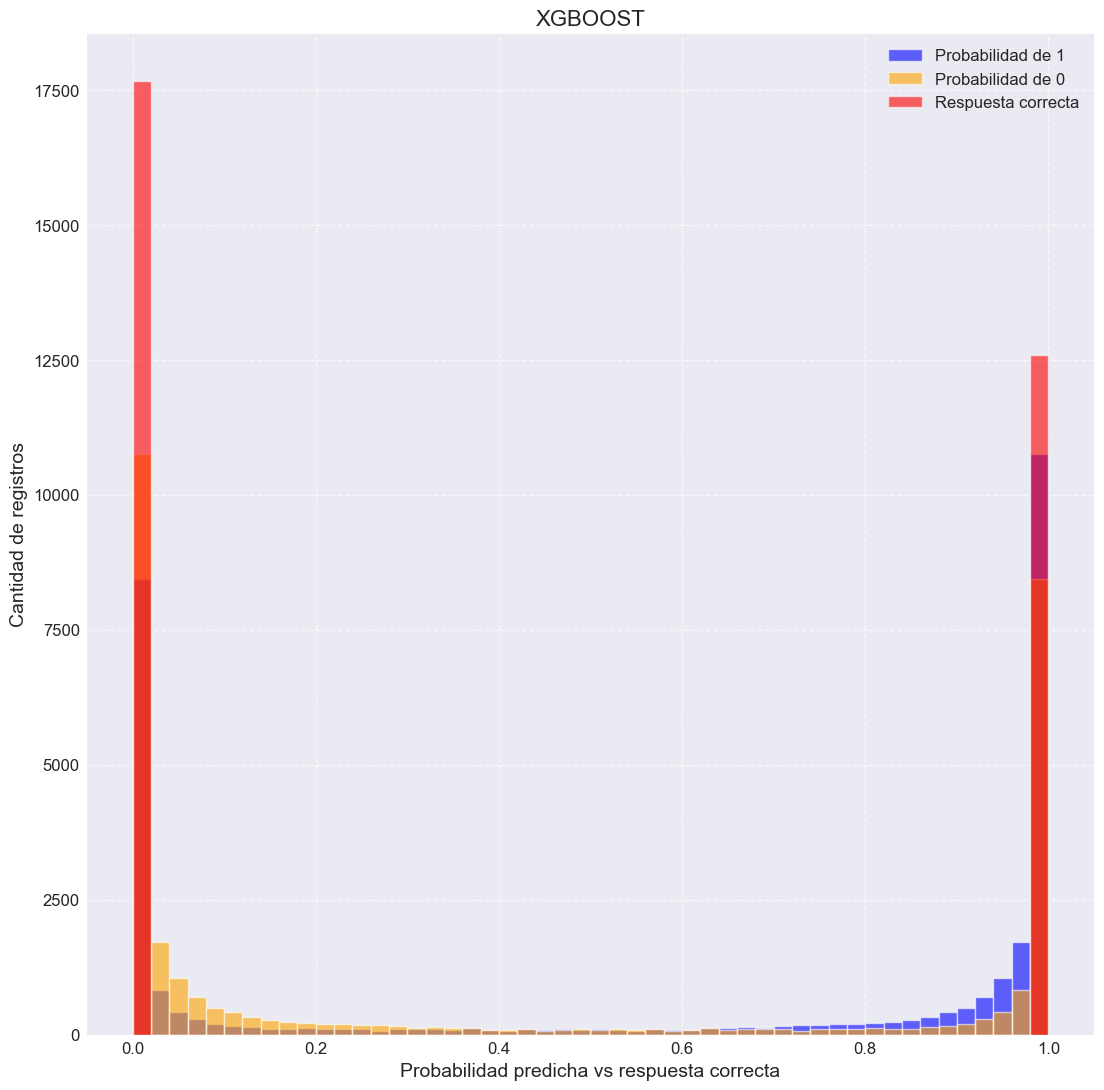

## <ins>Curva ROC XGBOOST:</ins>

roc_auc_score: 0.9869288388567221


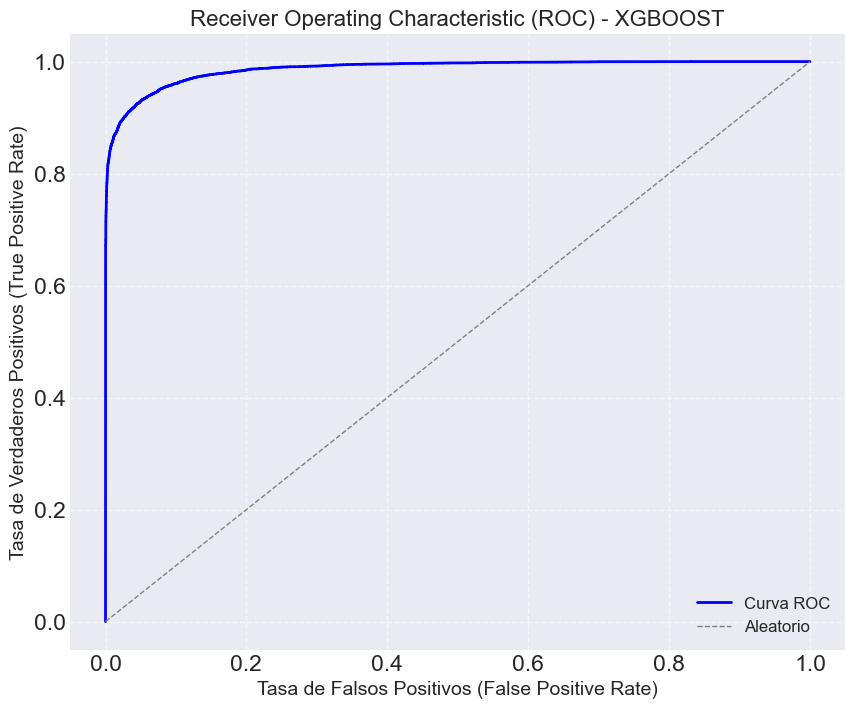

## <ins>Cross-validation XGBOOST:</ins>

Accuracy: 0.944 (0.002)


## <ins>Stratified K-Fold XGBOOST:</ins>

Iteración 1, Accuracy: 0.9377125850340136, Precision: 0.9416135881104034
Iteración 2, Accuracy: 0.9485544217687075, Precision: 0.9506043089858118
Iteración 3, Accuracy: 0.9447278911564626, Precision: 0.9530165509877202
Iteración 4, Accuracy: 0.9426020408163265, Precision: 0.9503470368392952
Iteración 5, Accuracy: 0.9440901360544217, Precision: 0.9534261241970021
Iteración 6, Accuracy: 0.9372874149659864, Precision: 0.9392177589852009
Iteración 7, Accuracy: 0.9451530612244898, Precision: 0.9459317585301837
Iteración 8, Accuracy: 0.9498299319727891, Precision: 0.9560148383677796
Iteración 9, Accuracy: 0.9440901360544217, Precision: 0.9510117145899893
Iteración 10, Accuracy: 0.9438775510204082, Precision: 0.9457609268035808
Iteración 11, Accuracy: 0.9430150967467574, Precision: 0.9414225941422594
Iteración 12, Accuracy: 0.9379119710822879, Precision: 0.9392819429778247
Iteración 13, Accuracy: 0.9513076759515203, Precision: 0.9523310633839707
Iteración 14, Accuracy: 0.9436529874548161, Pre

## <ins>Reporte de Clasificacion AdaBoostClassifier (test):</ins>

                         precision    recall  f1-score   support

neutral or dissatisfied  0.9201294 0.9178889 0.9190078     17659
              satisfied  0.8851212 0.8881469 0.8866315     12579

               accuracy                      0.9055162     30238
              macro avg  0.9026253 0.9030179 0.9028196     30238
           weighted avg  0.9055660 0.9055162 0.9055393     30238



## <ins>Explicación de las métricas del reporte de clasificacion de AdaBoostClassifier (test):</ins>

(nota aclaratoria: neutral o no satisfecho: 0, satisfecho: 1)
- En cuanto a la precisión del modelo (es la capacidad del clasificador para no etiquetar como positivo una muestra que es negativa), este acertó en un porcentaje del 88.51212% que el pasajero estaba satisfecho,
mientras que en cuanto al porcentaje de precisión sobre los pasajeros que no estaban satisfechos fue del 92.01294%
- El accuracy (el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto correspondiente de etiquetas en y_true) del modelo nos dice que predijo en un porcentaje del 90.55162% la satisfacción de manera correcta
- Por definición, la función del recall es: intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas
en este caso el modelo tuvo la habilidad de encontrar sobre el total de los pasajeros satisfechos el 88.81469% de ellos
------------------------------------------------------------------------------------------


## <ins>Reporte de clasificacion de AdaBoostClassifier (entrenamiento):</ins>

              precision    recall  f1-score   support

           0  0.9181445 0.9184565 0.9183005     41205
           1  0.8854650 0.8850426 0.8852537     29350

    accuracy                      0.9045567     70555
   macro avg  0.9018048 0.9017495 0.9017771     70555
weighted avg  0.9045502 0.9045567 0.9045535     70555

-------------------------------------------------------------------------------------------------------


## <ins>Matriz de confusión AdaBoostClassifier:</ins>

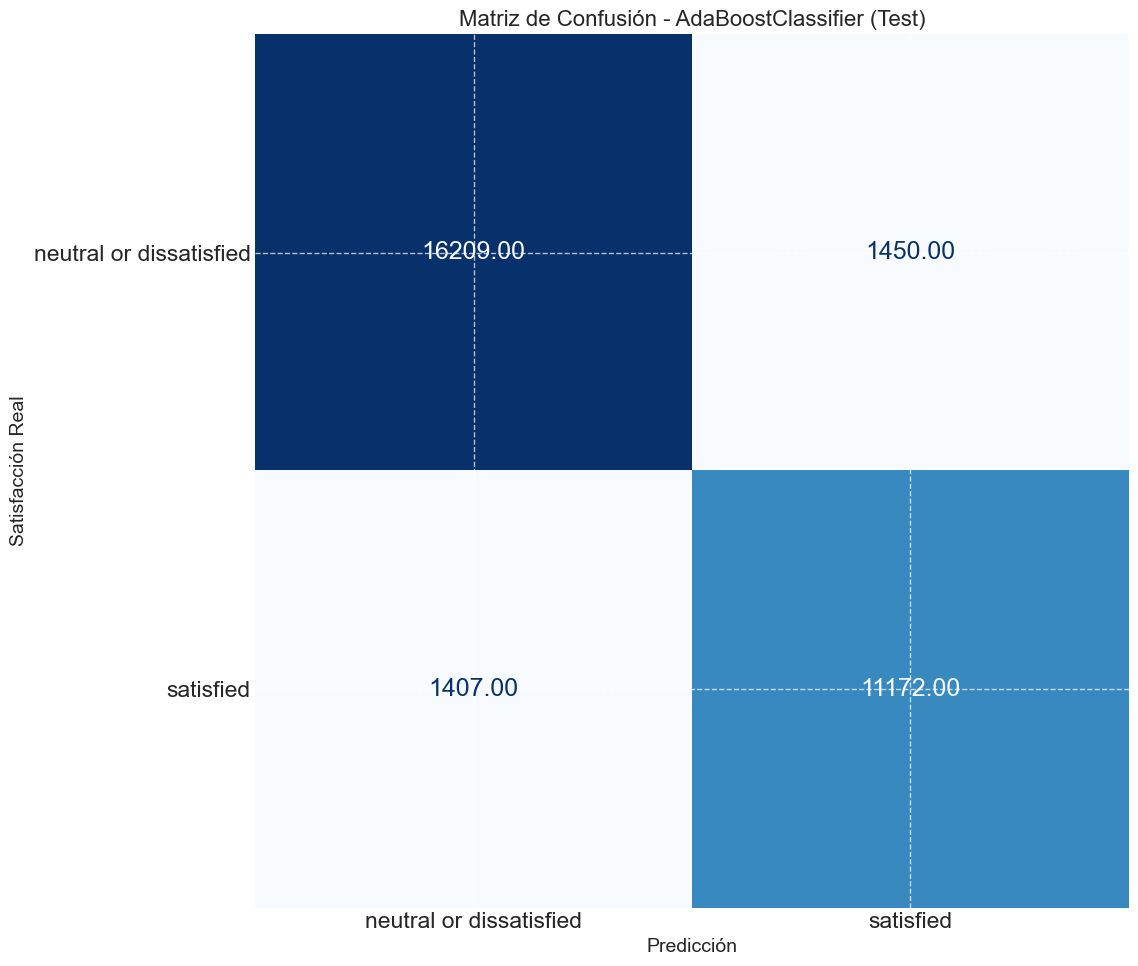

-------------------------------------------------------------------------------------------------------


## <ins>Feature Importance SHAP AdaBoostClassifier:</ins>

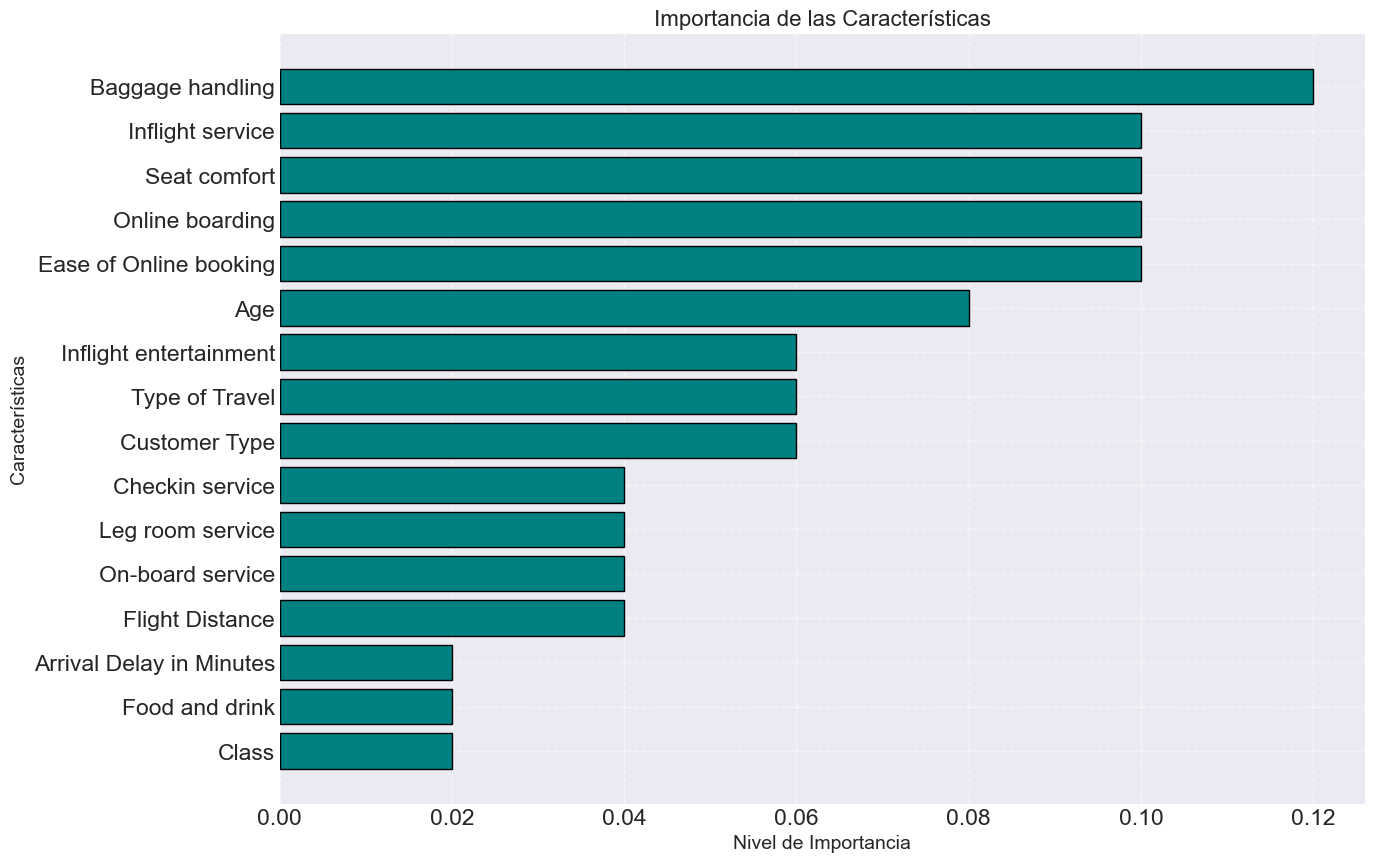

## <ins>Histograma de probabilidad AdaBoostClassifier:</ins>

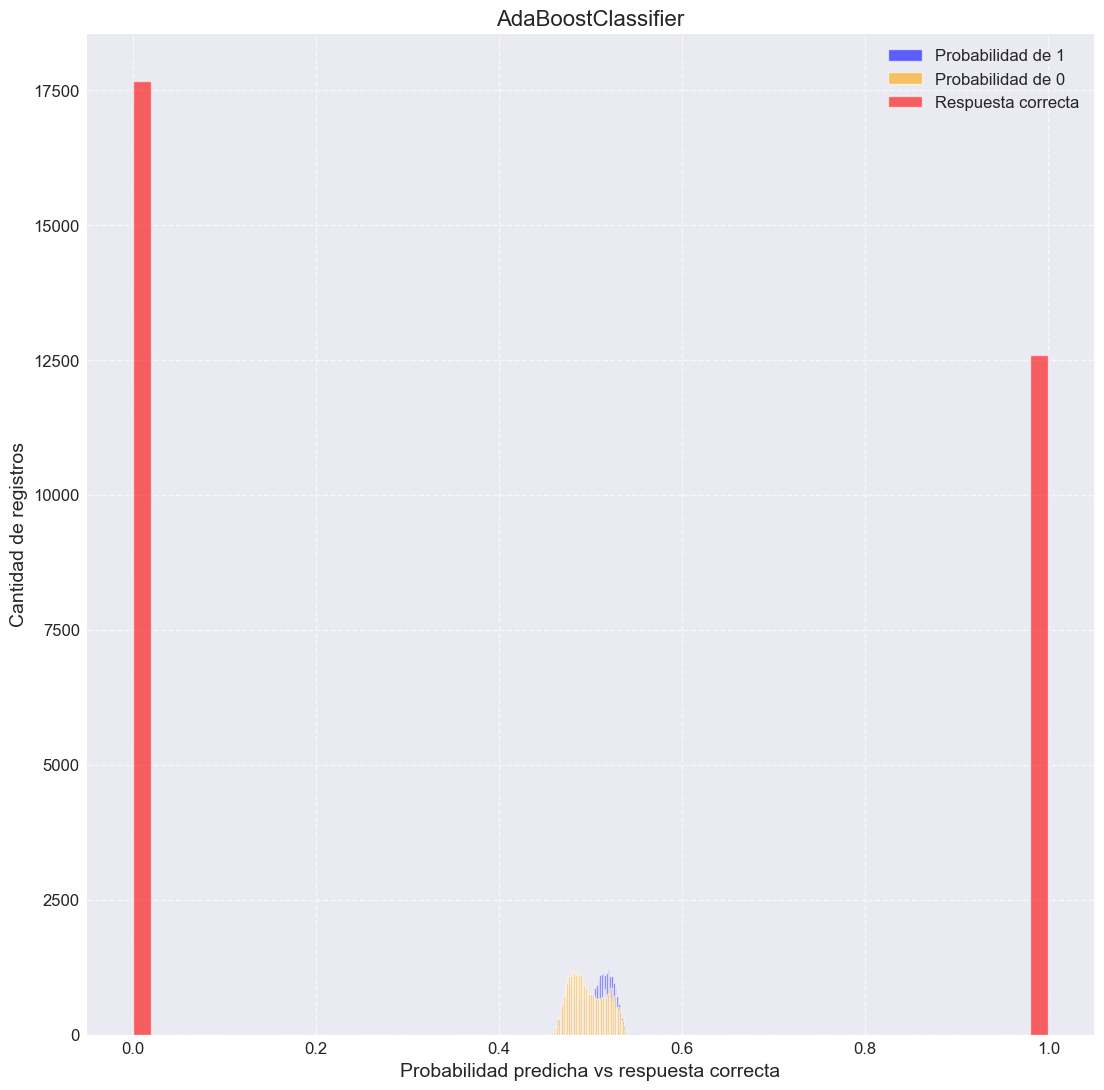

## <ins>Curva ROC AdaBoostClassifier:</ins>

roc_auc_score: 0.9652541123856219


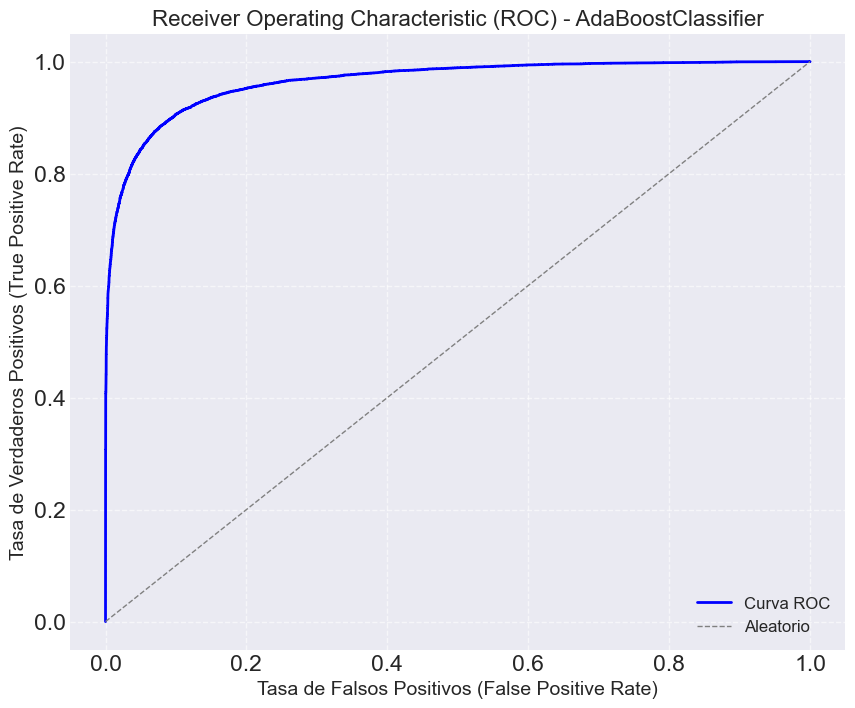

## <ins>Cross-validation AdaBoostClassifier:</ins>

Accuracy: 0.905 (0.004)


## <ins>Stratified K-Fold AdaBoostClassifier:</ins>

Iteración 1, Accuracy: 0.8981717687074829, Precision: 0.8785860655737705
Iteración 2, Accuracy: 0.9081632653061225, Precision: 0.8908252178370066
Iteración 3, Accuracy: 0.9049744897959183, Precision: 0.8911917098445595
Iteración 4, Accuracy: 0.9036989795918368, Precision: 0.8852459016393442
Iteración 5, Accuracy: 0.9047619047619048, Precision: 0.889922480620155
Iteración 6, Accuracy: 0.9022108843537415, Precision: 0.8892355694227769
Iteración 7, Accuracy: 0.9036989795918368, Precision: 0.8805668016194332
Iteración 8, Accuracy: 0.908375850340136, Precision: 0.8818818818818819
Iteración 9, Accuracy: 0.904124149659864, Precision: 0.8865503080082136
Iteración 10, Accuracy: 0.9049744897959183, Precision: 0.8867827868852459
Iteración 11, Accuracy: 0.9079311078035297, Precision: 0.8820873055694932
Iteración 12, Accuracy: 0.895173293642356, Precision: 0.8757062146892656
Iteración 13, Accuracy: 0.9115458218158622, Precision: 0.8969072164948454
Iteración 14, Accuracy: 0.9041037635551775, Precisi

precision_test  precision_entrenamiento  \
modelo                                                                  
Arbol de decisión                   0.916031                 0.916393   
Regresión logistica                 0.876466                 0.874007   
Random Forest                       0.916484                 0.914341   
Gradient Boosting classifier        0.936456                 0.942161   
Linear discriminant analysis        0.870376                 0.866748   
XGBOOST                             0.946010                 0.958740   
AdaBoostClassifier                  0.885121                 0.885465   

                              accuracy_test  accuracy_entrenamiento  \
modelo                                                                
Arbol de decisión                  0.915636                0.914648   
Regresión logistica                0.887559                0.885593   
Random Forest                      0.924069                0.921593   
Gradient Boosting classifier       0.938356                0.942003   
Linear discriminant analysis       0.884682                0.882588   
XGBOOST                            0.942986                0.953384   
AdaBoostClassifier                 0.905516                0.904557   

                              recall_test  recall_entrenamiento   f1_test  \
modelo                                                                      
Arbol de decisión                0.877653              0.874617  0.896431   
Regresión logistica              0.849432              0.847087  0.862737   
Random Forest                    0.899436              0.895400  0.907880   
Gradient Boosting classifier     0.913825              0.916865  0.925002   
Linear discriminant analysis     0.849273              0.848143  0.859695   
XGBOOST                          0.915176              0.927871  0.930338   
AdaBoostClassifier               0.888147              0.885043  0.886631   

                              f1_entrenamiento  
modelo                                          
Arbol de decisión                     0.895018  
Regresión logistica                   0.860336  
Random Forest                         0.904772  
Gradient Boosting classifier          0.929341  
Linear discriminant analysis          0.857345  
XGBOOST                               0.943053  
AdaBoostClassifier                    0.885254

## <ins>Métricas de los modelos K-fold</ins>


precision  accuracy
modelo                                           
Arbol de decisión              0.901760  0.915187
Regresión logistica            0.873716  0.885607
Random Forest                  0.911566  0.920020
Gradient Boosting classifier   0.938340  0.938757
Linear discriminant analysis   0.866858  0.882687
XGBOOST                        0.947434  0.943888
AdaBoostClassifier             0.885224  0.904202

In [51]:
i = 0

for models, lista in zip(modelos, listado_modelos):
    start = time.time()
    modelo = models.fit(X_train, y_train_encoded)
    end = time.time()

    # Predicciones
    yprediccion_entrenamiento = modelo.predict(X_train)
    yprediccion_testeo = modelo.predict(X_test)

    # Probabilidades
    proba0 = modelo.predict_proba(X_test)[:, 0]
    proba1 = modelo.predict_proba(X_test)[:, 1]

    # Tiempo de entrenamiento
    tiempos_entrenamiento.append(end - start)

    # Almacena las métricas usando las etiquetas codificadas
    metricas_modelos = metricas_modelos.append({
        'modelo': lista,
        'precision_test': precision_score(y_test_encoded, yprediccion_testeo),
        'precision_entrenamiento': precision_score(y_train_encoded, yprediccion_entrenamiento),
        'accuracy_test': accuracy_score(y_test_encoded, yprediccion_testeo),
        'accuracy_entrenamiento': accuracy_score(y_train_encoded, yprediccion_entrenamiento),
        'recall_test': recall_score(y_test_encoded, yprediccion_testeo),
        'recall_entrenamiento': recall_score(y_train_encoded, yprediccion_entrenamiento),
        'f1_test': f1_score(y_test_encoded, yprediccion_testeo),
        'f1_entrenamiento': f1_score(y_train_encoded, yprediccion_entrenamiento)
    }, ignore_index=True)

    # Muestro los reportes de cada uno de los modelos
    display(Markdown(f'## <ins>Reporte de Clasificacion {lista} (test):</ins>'))
    print(classification_report(y_test_encoded, yprediccion_testeo, target_names=le.classes_, digits=7))

    display(Markdown(f'## <ins>Explicación de las métricas del reporte de clasificacion de {lista} (test):</ins>'))
    print('(nota aclaratoria: neutral o no satisfecho: 0, satisfecho: 1)')
    
    print(f'- En cuanto a la precisión del modelo (es la capacidad del clasificador para no etiquetar como positivo una muestra que es negativa), este acertó en un porcentaje del {precision_score(y_test_encoded, yprediccion_testeo, pos_label=le.transform(["satisfied"])[0]) * 100:.5f}% que el pasajero estaba satisfecho,')
    print(f'mientras que en cuanto al porcentaje de precisión sobre los pasajeros que no estaban satisfechos fue del {precision_score(y_test_encoded, yprediccion_testeo, pos_label=le.transform(["neutral or dissatisfied"])[0]) * 100:.5f}%')
    print(f'- El accuracy (el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto correspondiente de etiquetas en y_true) del modelo nos dice que predijo en un porcentaje del {accuracy_score(y_test_encoded, yprediccion_testeo) * 100:.5f}% la satisfacción de manera correcta')
    print(f'- Por definición, la función del recall es: intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas')
    print(f'en este caso el modelo tuvo la habilidad de encontrar sobre el total de los pasajeros satisfechos el {recall_score(y_test_encoded, yprediccion_testeo, pos_label=le.transform(["satisfied"])[0]) * 100:.5f}% de ellos')

    print("------------------------------------------------------------------------------------------")
    display(Markdown(f'## <ins>Reporte de clasificacion de {lista} (entrenamiento):</ins>'))
    print(classification_report(y_train_encoded, yprediccion_entrenamiento, digits=7))
    print("-------------------------------------------------------------------------------------------------------")

    # Matriz de confusión
    display(Markdown(f'## <ins>Matriz de confusión {listado_modelos[i]}:</ins>'))
    matriz_confusion(y_test_encoded, yprediccion_testeo, lista, le.classes_)
    print("-------------------------------------------------------------------------------------------------------")

    # Feature importance o SHAP
    if hasattr(modelo, 'feature_importances_'):
        display(Markdown(f'## <ins>Feature Importance SHAP {lista}:</ins>'))
        importancia_feature(modelo, X_train)
    elif lista in ['Regresión logística', 'Linear discriminant analysis']:
        display(Markdown(f'## <ins>Feature Importance SHAP {lista}:</ins>'))
        shap_dibujar(modelo, X_train)

    # Histograma de probabilidades
    display(Markdown(f'## <ins>Histograma de probabilidad {lista}:</ins>'))
    hist_probabilidad(proba0, proba1, y_test_encoded, lista)

    # Curva ROC
    display(Markdown(f'## <ins>Curva ROC {lista}:</ins>'))
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_encoded, proba1, pos_label=le.transform(['satisfied'])[0])
    print(f'roc_auc_score: {roc_auc_score(y_test_encoded, proba1)}')
    curva_roc(lista, false_positive_rate1, true_positive_rate1)

    # Cross-validation y K-Fold
    display(Markdown(f'## <ins>Cross-validation {lista}:</ins>'))
    cv_results = cross_val_score(models, X_train, y_train_encoded, cv=10, scoring='accuracy')
    print(f'Accuracy: {np.mean(cv_results):.3f} ({np.std(cv_results):.3f})')

    display(Markdown(f'## <ins>Stratified K-Fold {lista}:</ins>'))
    list_ac, list_pre = [], []
    for h, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_encoded)):
        X_train_n, y_train_n = X_train.iloc[train_idx], y_train_encoded[train_idx]
        X_test_n, y_test_n = X_train.iloc[test_idx], y_train_encoded[test_idx]
        models.fit(X_train_n, y_train_n)
        pred = models.predict(X_test_n)
        accuracy = accuracy_score(y_test_n, pred)
        precision = precision_score(y_test_n, pred)
        print(f'Iteración {h+1}, Accuracy: {accuracy}, Precision: {precision}')
        list_ac.append(accuracy)
        list_pre.append(precision)

    # Promedio K-Fold
    metricas_kfold = metricas_kfold.append({
        'modelo': lista,
        'precision': np.mean(list_pre),
        'accuracy': np.mean(list_ac)
    }, ignore_index=True)

    i += 1

# Mostrar métricas finales
print("## <ins>Métricas de los modelos</ins>")
display(metricas_modelos.set_index('modelo'))
print("## <ins>Métricas de los modelos K-fold</ins>")
display(metricas_kfold.set_index('modelo'))

## Conclusion cross validation con K-fold

Tras comparar los resultados de validación cruzada con K-fold y la evaluación tradicional del modelo, has llegado a la conclusión de que el método tradicional es más adecuado para tu caso. A continuación, se presentan los motivos principales que respaldan esta decisión:

	1.	Coste Computacional:
	•	La validación cruzada con K-fold implica entrenar el modelo múltiples veces (una vez por cada fold). Por ejemplo, con  k = 10 , el modelo se entrena 10 veces. En contraste, la evaluación tradicional entrena el modelo solo una vez, lo que reduce significativamente el coste computacional.
	2.	Similitud en Métricas:
	•	Las métricas obtenidas a partir de K-fold no muestran una diferencia significativa en comparación con las obtenidas mediante el método tradicional. Esto indica que el método tradicional ya proporciona una evaluación adecuada del rendimiento del modelo sin necesidad de realizar múltiples entrenamientos.
	3.	Consistencia en Evaluaciones:
	•	El método tradicional utiliza una semilla fija, lo que garantiza resultados consistentes y reproducibles. En cambio, K-fold, al no utilizar una semilla fija, puede generar resultados ligeramente diferentes en cada ejecución debido a la variabilidad en los conjuntos de datos de entrenamiento y prueba.
	4.	Promedio de Resultados:
	•	Aunque K-fold proporciona un promedio de los puntajes a través de diferentes particiones, en tu caso, la diferencia en las métricas promedio no justifica el mayor coste computacional. La evaluación tradicional ya ofrece resultados robustos y suficientemente precisos.

Conclusión Final:
Dado que la diferencia en las métricas entre ambos métodos no es considerable y el coste computacional de K-fold es significativamente mayor, has decidido optar por el método de evaluación tradicional. Esta elección se basa en la eficiencia computacional y la suficiencia de las métricas obtenidas con el método tradicional para tus necesidades actuales.

Este enfoque te permitirá justificar claramente tu elección en términos de eficiencia y resultados, destacando que el método tradicional es más adecuado en tu situación particular.

## Tiempos de entrenamiento

Con el fin de realizar una comparación entre los tiempos que demanda la utilización de cada uno de los algoritmos es que se realiza un cuadro comparativo de los tiempos

In [52]:
tiempos=pd.DataFrame()
tiempos["modelos"]=listado_modelos
tiempos["tiempo"]=tiempos_entrenamiento
display(tiempos)

modelos    tiempo
0             Arbol de decisión  0.040956
1           Regresión logistica  4.576328
2                 Random Forest  0.376737
3  Gradient Boosting classifier  5.330356
4  Linear discriminant analysis  0.076569
5                       XGBOOST  0.347733
6            AdaBoostClassifier  1.373027

# Optimización de modelos

In [53]:
param_grid=[
        {
        'min_child_weight': [1, 5, 10],
        'gamma': [1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5,6,7],"random_state":[rng]
        },
        {
            'n_estimators':[10,15,25],"random_state":[rng]
        },
        {
    'solver':['svd', 'lsqr', 'eigen']
        },
        {
            "random_state":[rng],
            "n_estimators":[10,20,50,100],
            "max_depth":[5,6,8]
        }
        ]
modelos_arreglar=[
    xgboost.XGBClassifier(learning_rate=0.001),
    AdaBoostClassifier(),
    LinearDiscriminantAnalysis(),
    RandomForestClassifier()
]
modelos_nombres=["XGBOOST","AdaBoostClassiffier","linear discriminant","Random Forest"]


## <ins> Mejoras del Modelo XGBOOST:</ins>

Mejores parametros: {'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 10, 'random_state': RandomState(MT19937) at 0x16820B640, 'subsample': 0.8}
Mejor CV score: 0.0


### <ins> Matriz de confusión del Modelo XGBOOST:</ins>

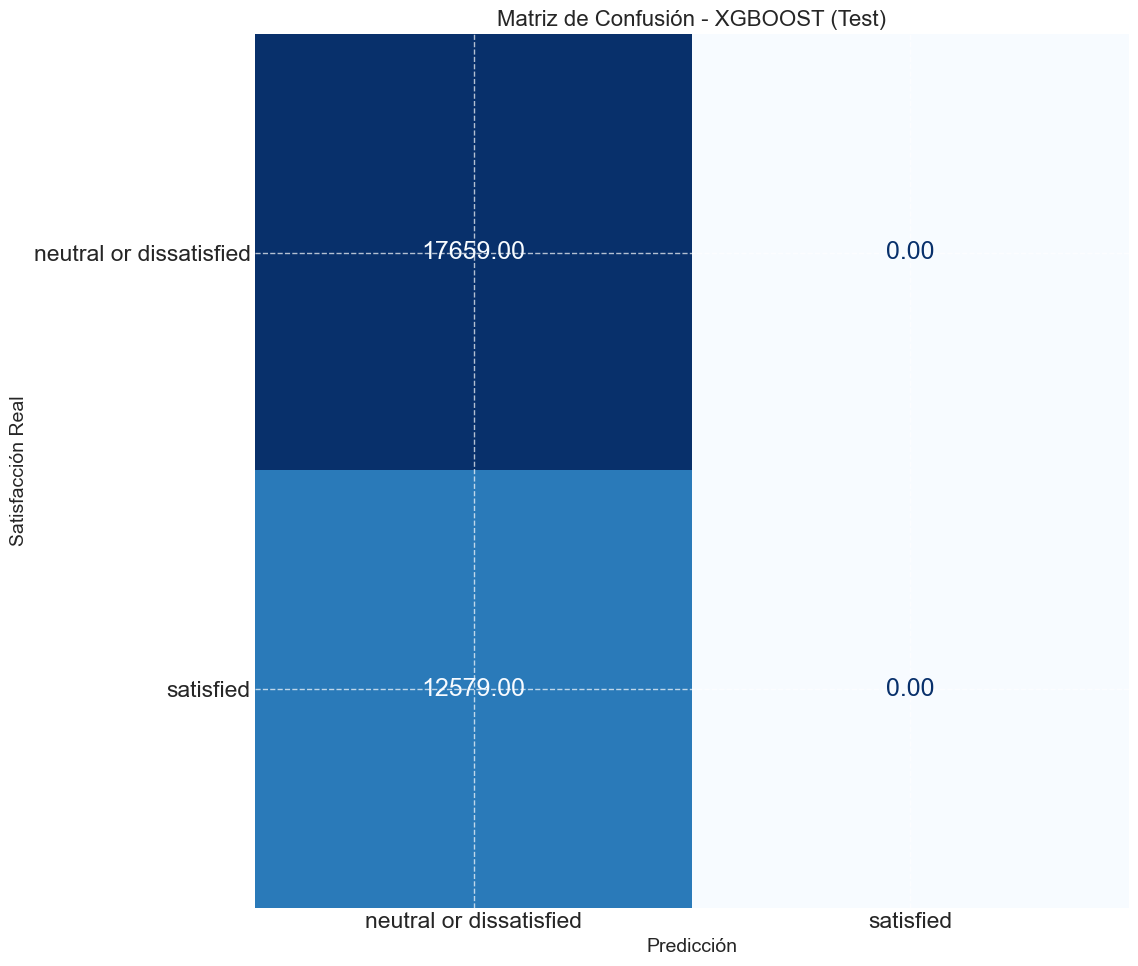

## <ins> Curva ROC XGBOOST:</ins>

roc_auc_score: 0.9745542460116866


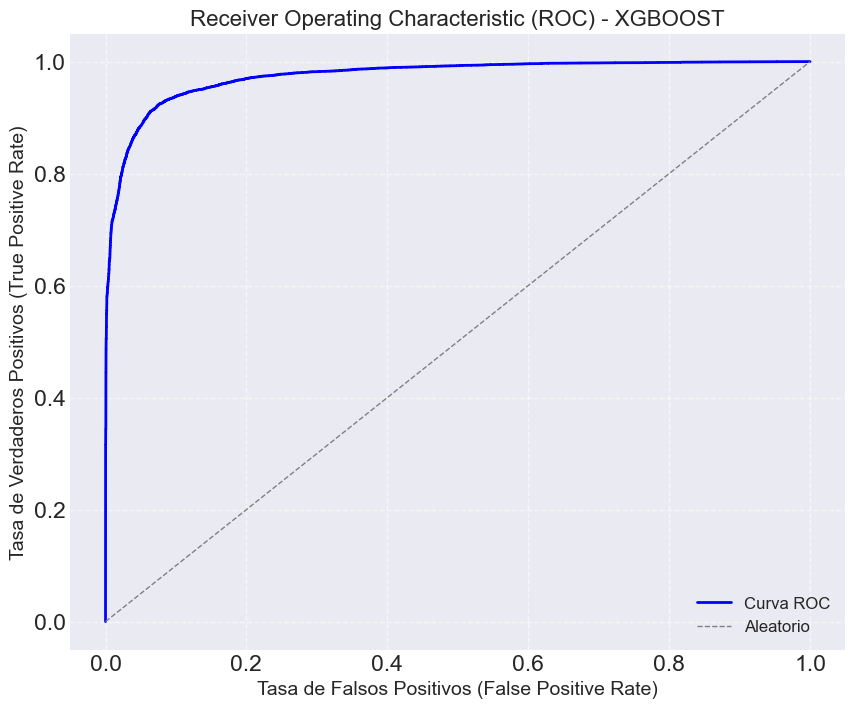

### <ins> Scores para Modelo XGBOOST:</ins>

Precision test: 0.0
Precision entrenamiento: 0.0
Accuracy test: 0.5840002645677624
Accuracy entrenamiento: 0.5840124725391539
Recall test: 0.0
Recall entrenamiento: 0.0
F1 test: 0.0
F1 entrenamiento: 0.0


### <ins> Matriz de resultado de parámetros Modelo XGBOOST:</ins>

iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
0       0          290       0.026358      0.008701         0.002334   
1       0          290       0.023964      0.002623         0.002378   
2       0          290       0.042666      0.017449         0.002946   
3       0          290       0.016298      0.001868         0.002345   
4       0          290       0.018810      0.004241         0.002265   
..    ...          ...            ...           ...              ...   
479     3         7830       0.068856      0.005433         0.003499   
480     4        23490       0.100301      0.005157         0.004552   
481     4        23490       0.101454      0.005652         0.004585   
482     4        23490       0.099994      0.003020         0.004566   
483     4        23490       0.108533      0.006600         0.004556   

     std_score_time param_colsample_bytree param_gamma param_max_depth  \
0          0.000235                    0.6           1               5   
1          0.000243                    0.6           1               5   
2          0.001118                    0.6           1               5   
3          0.000440                    0.6           1               5   
4          0.000186                    0.6           1               5   
..              ...                    ...         ...             ...   
479        0.000205                    1.0           5               7   
480        0.000364                    0.6           1               6   
481        0.000397                    0.6           1               6   
482        0.000334                    0.8         1.5               6   
483        0.000467                    1.0           5               7   

    param_min_child_weight  ... split8_train_score split9_train_score  \
0                        1  ...                0.0                0.0   
1                        1  ...                0.0                0.0   
2                        1  ...                0.0                0.0   
3                        5  ...                0.0                0.0   
4                        5  ...                0.0                0.0   
..                     ...  ...                ...                ...   
479                     10  ...                0.0                0.0   
480                     10  ...                0.0                0.0   
481                      1  ...                0.0                0.0   
482                      5  ...                0.0                0.0   
483                     10  ...                0.0                0.0   

    split10_train_score  split11_train_score  split12_train_score  \
0                   0.0             1.000000                  1.0   
1                   0.0             1.000000                  1.0   
2                   0.0             1.000000                  1.0   
3                   0.0             0.984375                  1.0   
4                   0.0             0.985507                  1.0   
..                  ...                  ...                  ...   
479                 0.0             0.000000                  0.0   
480                 0.0             0.000000                  0.0   
481                 0.0             0.000000                  0.0   
482                 0.0             0.000000                  0.0   
483                 0.0             0.000000                  0.0   

     split13_train_score  split14_train_score  split15_train_score  \
0                    1.0             1.000000                  1.0   
1                    1.0             1.000000                  1.0   
2                    1.0             1.000000                  1.0   
3                    1.0             1.000000                  1.0   
4                    1.0             0.986301                  1.0   
..                   ...                  ...                  ...   
479                  0.0             0.000000          

## <ins> Mejoras del Modelo AdaBoostClassiffier:</ins>

Mejores parametros: {'n_estimators': 25, 'random_state': RandomState(MT19937) at 0x16820B640}
Mejor CV score: 0.8800797773949941


### <ins> Matriz de confusión del Modelo AdaBoostClassiffier:</ins>

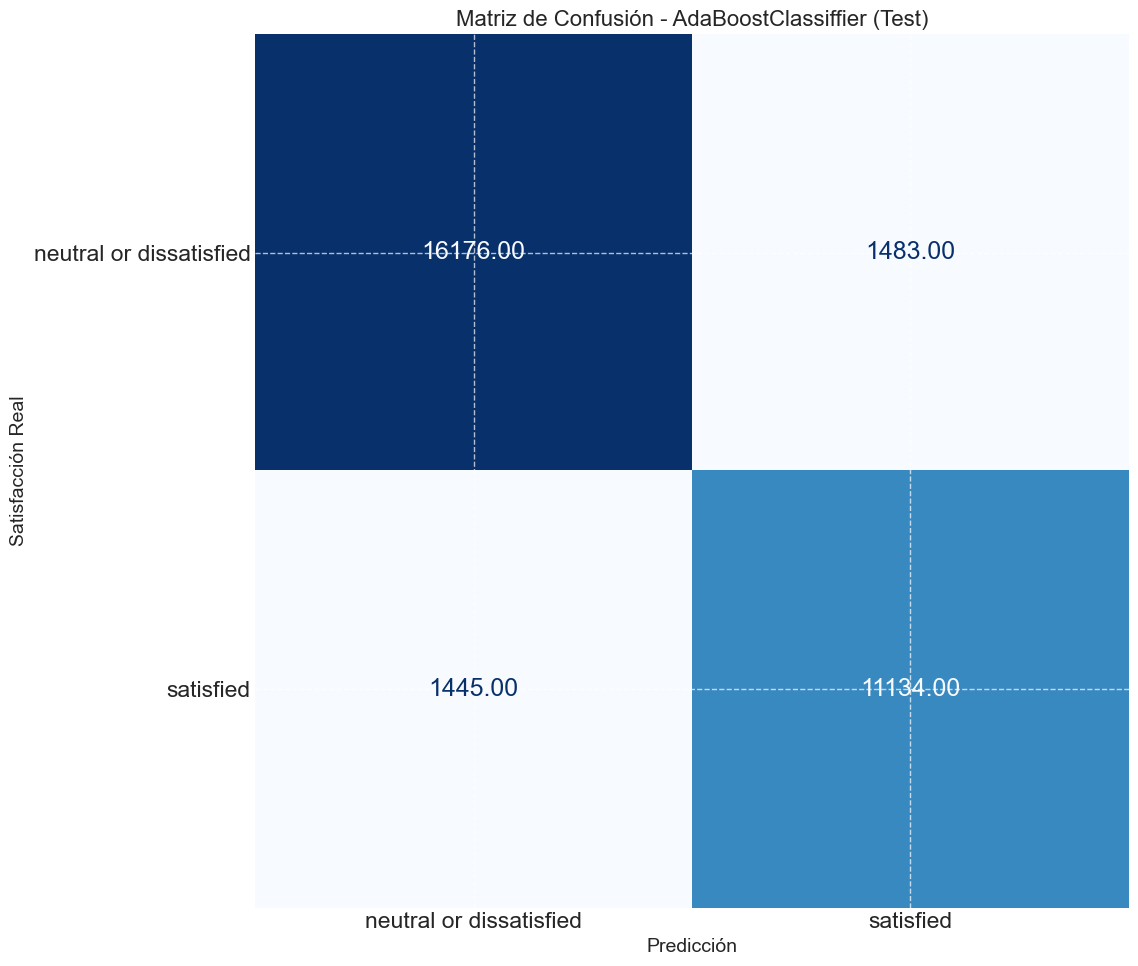

## <ins> Curva ROC AdaBoostClassiffier:</ins>

roc_auc_score: 0.9628545947390396


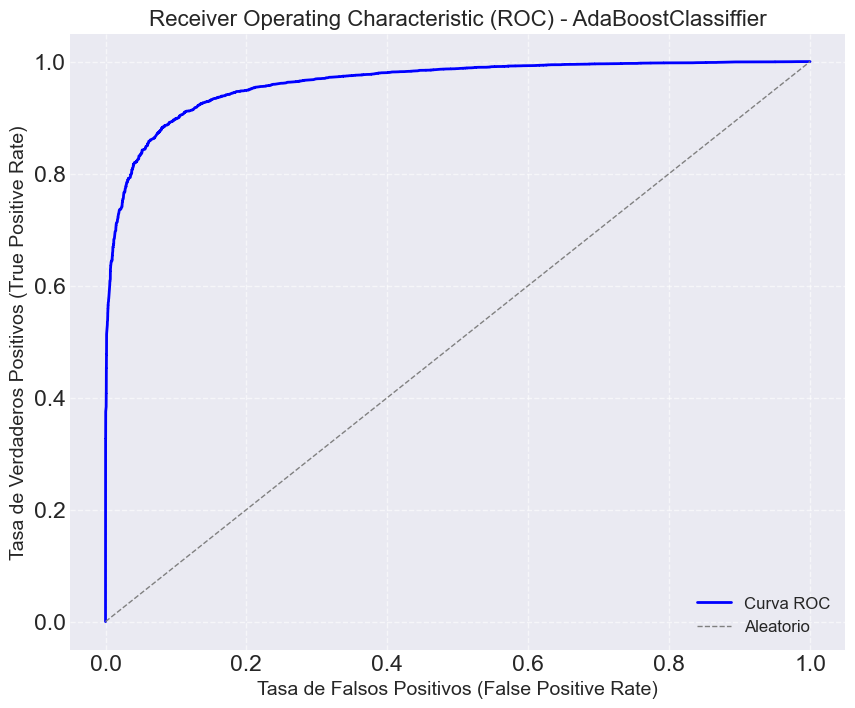

### <ins> Scores para Modelo AdaBoostClassiffier:</ins>

Precision test: 0.8824601727827535
Precision entrenamiento: 0.8817785942709396
Accuracy test: 0.9031681989549574
Accuracy entrenamiento: 0.9021189143221601
Recall test: 0.8851260036568884
Recall entrenamiento: 0.8831005110732538
F1 test: 0.8837910779488808
F1 entrenamiento: 0.8824390576058831


### <ins> Matriz de resultado de parámetros Modelo AdaBoostClassiffier:</ins>

iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
0     0        23518       0.089028      0.014763         0.002290   
1     0        23518       0.124542      0.004746         0.002540   
2     0        23518       0.206468      0.010935         0.003416   
3     1        70554       0.602264      0.005491         0.006999   

   std_score_time param_n_estimators    param_random_state  \
0        0.000495                 10  RandomState(MT19937)   
1        0.000144                 15  RandomState(MT19937)   
2        0.000063                 25  RandomState(MT19937)   
3        0.000561                 25  RandomState(MT19937)   

                                              params  split0_test_score  ...  \
0  {'n_estimators': 10, 'random_state': RandomSta...           0.893186  ...   
1  {'n_estimators': 15, 'random_state': RandomSta...           0.884413  ...   
2  {'n_estimators': 25, 'random_state': RandomSta...           0.895288  ...   
3  {'n_estimators': 25, 'random_state': RandomSta...           0.895206  ...   

   split8_train_score  split9_train_score  split10_train_score  \
0            0.877049            0.858196             0.878967   
1            0.877354            0.882515             0.878412   
2            0.885079            0.889207             0.884288   
3            0.878616            0.881810             0.881971   

   split11_train_score  split12_train_score  split13_train_score  \
0             0.871277             0.870320             0.852245   
1             0.876708             0.876214             0.874227   
2             0.882135             0.882942             0.882007   
3             0.878484             0.877524             0.881058   

   split14_train_score  split15_train_score  mean_train_score  std_train_score  
0             0.859827             0.852175          0.865677         0.007948  
1             0.874254             0.872652          0.876986         0.003445  
2             0.879826             0.878907          0.883324         0.002707  
3             0.880228             0.878453          0.880283         0.001664  

[4 rows x 46 columns]

## <ins> Mejoras del Modelo linear discriminant:</ins>

Mejores parametros: {'solver': 'eigen'}
Mejor CV score: 0.8667937690549103


### <ins> Matriz de confusión del Modelo linear discriminant:</ins>

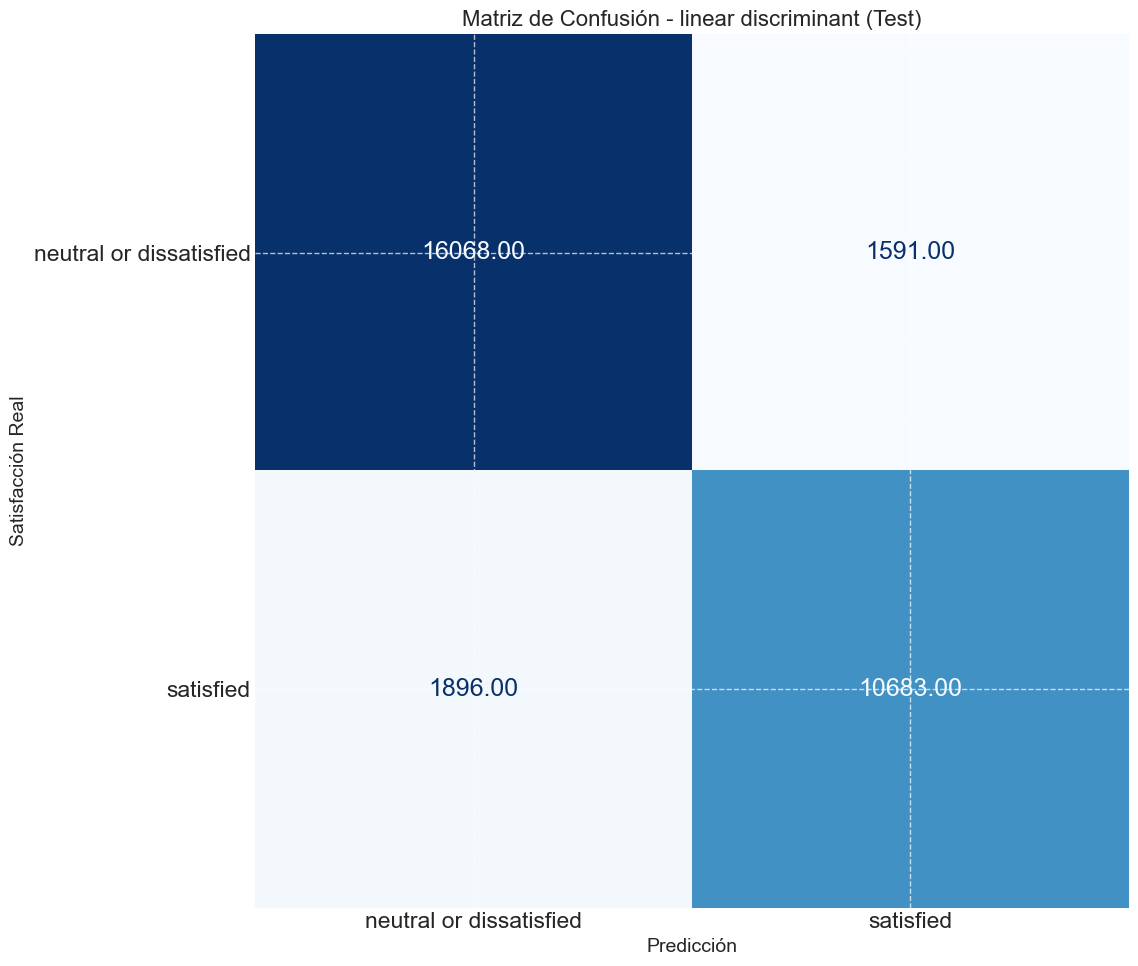

## <ins> Curva ROC linear discriminant:</ins>

roc_auc_score: 0.9499042826053763


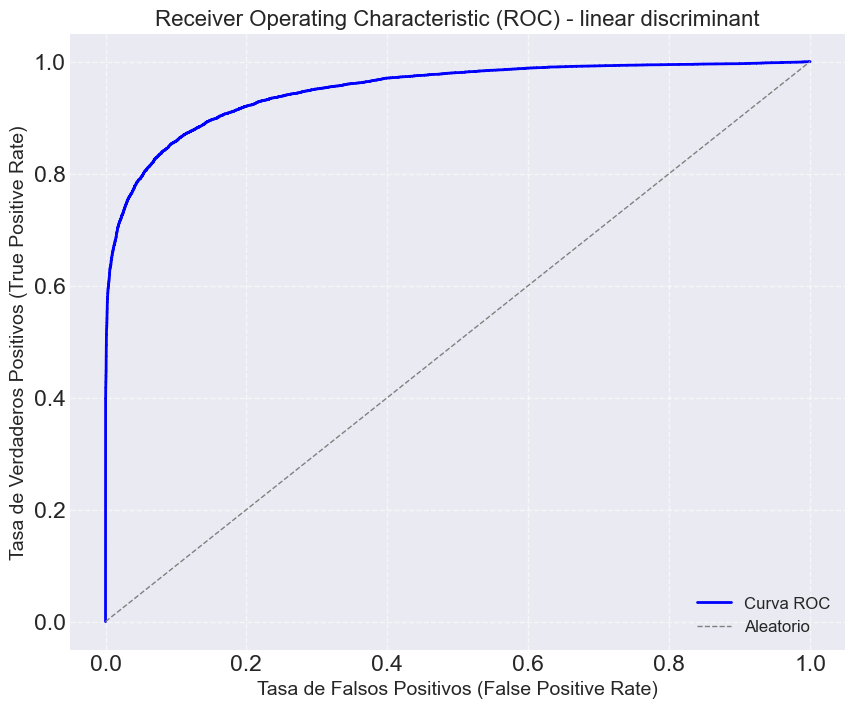

### <ins> Scores para Modelo linear discriminant:</ins>

Precision test: 0.8703764054098093
Precision entrenamiento: 0.8667479108635098
Accuracy test: 0.8846815265559892
Accuracy entrenamiento: 0.8825880518744242
Recall test: 0.8492725971857858
Recall entrenamiento: 0.8481431005110732
F1 test: 0.8596950066390375
F1 entrenamiento: 0.8573445841226106


### <ins> Matriz de resultado de parámetros Modelo linear discriminant:</ins>

iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
0     0        23518       0.036334      0.008409         0.002014   
1     0        23518       0.032104      0.014312         0.003074   
2     0        23518       0.026957      0.007056         0.002591   
3     1        70554       0.075758      0.008756         0.002799   

   std_score_time param_solver               params  split0_test_score  \
0        0.000830          svd    {'solver': 'svd'}           0.890511   
1        0.002706         lsqr   {'solver': 'lsqr'}           0.890511   
2        0.001689        eigen  {'solver': 'eigen'}           0.890511   
3        0.001324        eigen  {'solver': 'eigen'}           0.869048   

   split1_test_score  ...  split8_train_score  split9_train_score  \
0           0.874380  ...            0.868633            0.870888   
1           0.874380  ...            0.868633            0.870888   
2           0.874380  ...            0.868633            0.870888   
3           0.858558  ...            0.866243            0.866365   

   split10_train_score  split11_train_score  split12_train_score  \
0             0.872467             0.865397             0.866600   
1             0.872467             0.865397             0.866600   
2             0.872467             0.865397             0.866600   
3             0.866910             0.866364             0.867038   

   split13_train_score  split14_train_score  split15_train_score  \
0             0.866178             0.867232             0.865479   
1             0.866178             0.867232             0.865479   
2             0.866178             0.867232             0.865479   
3             0.866964             0.867823             0.866172   

   mean_train_score  std_train_score  
0          0.869014         0.002138  
1          0.869008         0.002135  
2          0.869008         0.002135  
3          0.866803         0.000564  

[4 rows x 45 columns]

## <ins> Mejoras del Modelo Random Forest:</ins>

Mejores parametros: {'max_depth': 8, 'n_estimators': 100, 'random_state': RandomState(MT19937) at 0x16820B640}
Mejor CV score: 0.917694555417865


### <ins> Matriz de confusión del Modelo Random Forest:</ins>

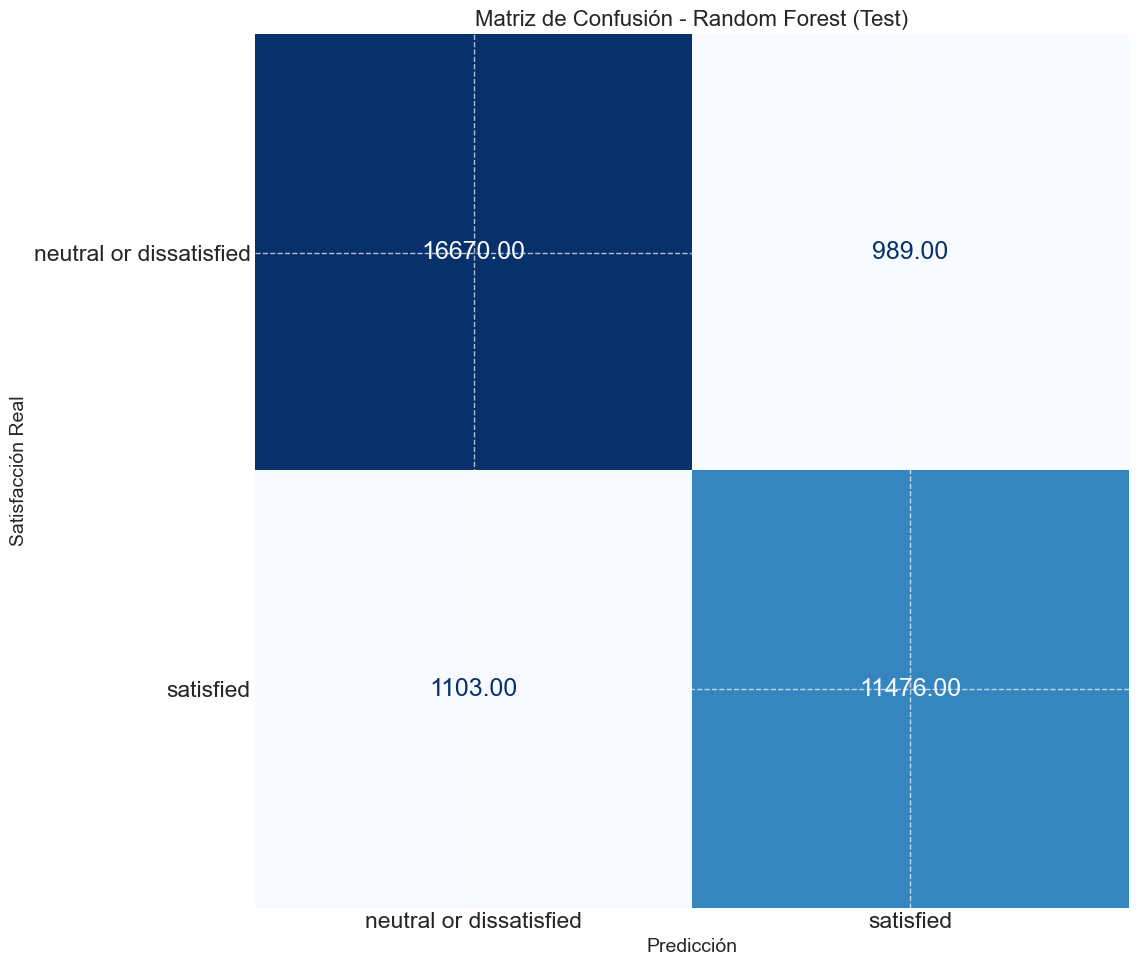

## <ins> Curva ROC Random Forest:</ins>

roc_auc_score: 0.979300724849609


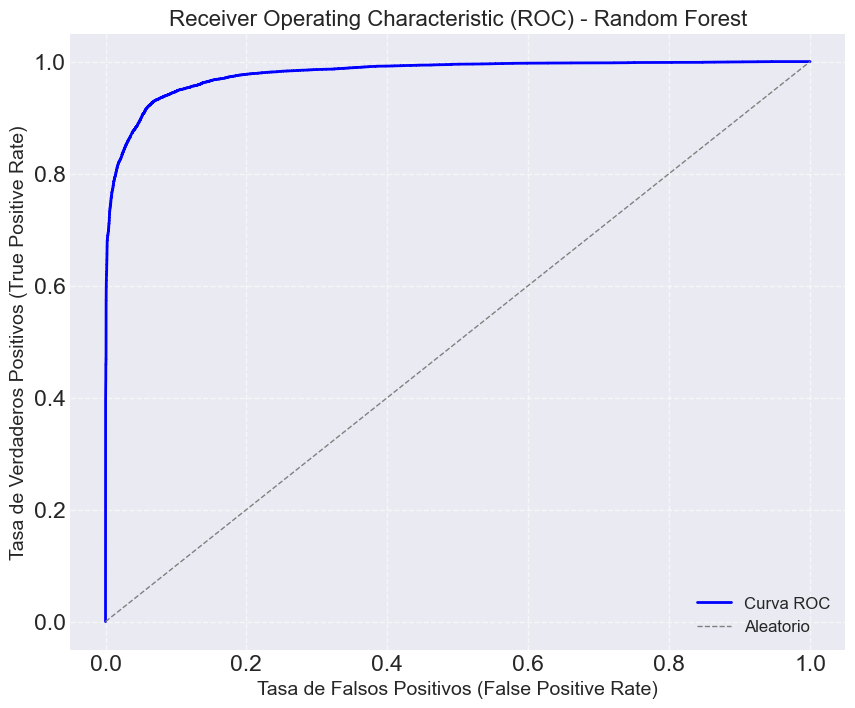

### <ins> Scores para Modelo Random Forest:</ins>

Precision test: 0.9206578419574809
Precision entrenamiento: 0.9201950482469695
Accuracy test: 0.930815530127654
Accuracy entrenamiento: 0.9308766210757565
Recall test: 0.9123141744176803
Recall entrenamiento: 0.913015332197615
F1 test: 0.9164670180482352
F1 entrenamiento: 0.9165911306459612


### <ins> Matriz de resultado de parámetros Modelo Random Forest:</ins>

iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
0      0         7839       0.025666      0.000851         0.001363   
1      0         7839       0.054209      0.022380         0.001802   
2      0         7839       0.117677      0.001938         0.002935   
3      0         7839       0.235074      0.002011         0.004847   
4      0         7839       0.028388      0.000529         0.001342   
5      0         7839       0.055003      0.000790         0.001792   
6      0         7839       0.133965      0.002004         0.003052   
7      0         7839       0.270907      0.007294         0.005112   
8      0         7839       0.034813      0.000977         0.001389   
9      0         7839       0.068720      0.002980         0.003098   
10     0         7839       0.164705      0.002922         0.003476   
11     0         7839       0.326446      0.003574         0.005765   
12     1        23517       0.462119      0.016042         0.006169   
13     1        23517       0.183827      0.002510         0.003195   
14     1        23517       0.906682      0.028643         0.010998   
15     1        23517       0.093975      0.000918         0.002155   
16     2        70551       2.618781      0.016851         0.025531   
17     2        70551       0.273574      0.002727         0.004189   

    std_score_time param_max_depth param_n_estimators    param_random_state  \
0         0.000113               5                 10  RandomState(MT19937)   
1         0.000246               5                 20  RandomState(MT19937)   
2         0.000082               5                 50  RandomState(MT19937)   
3         0.000178               5                100  RandomState(MT19937)   
4         0.000047               6                 10  RandomState(MT19937)   
5         0.000083               6                 20  RandomState(MT19937)   
6         0.000074               6                 50  RandomState(MT19937)   
7         0.000099               6                100  RandomState(MT19937)   
8         0.000023               8                 10  RandomState(MT19937)   
9         0.004306               8                 20  RandomState(MT19937)   
10        0.000237               8                 50  RandomState(MT19937)   
11        0.000115               8                100  RandomState(MT19937)   
12        0.000192               8                 50  RandomState(MT19937)   
13        0.000076               8                 20  RandomState(MT19937)   
14        0.000366               8                100  RandomState(MT19937)   
15        0.000060               8                 10  RandomState(MT19937)   
16        0.000140               8                100  RandomState(MT19937)   
17        0.000069               8                 10  RandomState(MT19937)   

                                               params  ...  \
0   {'max_depth': 5, 'n_estimators': 10, 'random_s...  ...   
1   {'max_depth': 5, 'n_estimators': 20, 'random_s...  ...   
2   {'max_depth': 5, 'n_estimators': 50, 'random_s...  ...   
3   {'max_depth': 5, 'n_estimators': 100, 'random_...  ...   
4   {'max_depth': 6, 'n_estimators': 10, 'random_s...  ...   
5   {'max_depth': 6, 'n_estimators': 20, 'random_s...  ...   
6   {'max_depth': 6, 'n_estimators': 50, 'random_s...  ...   
7   {'max_depth': 6, 'n_estimators': 100, 'random_...  ...   
8   {'max_depth': 8, 'n_estimators': 10, 'random_s...  ...   
9   {'max_depth': 8, 'n_estimators': 20, 'random_s...  ...   
10  {'max_depth': 8, 'n_estimators': 50, 'random_s...  ...   
11  {'max_depth': 8, 'n_estimators': 100, 'random_...  ...   
12  {'max_depth': 8, 'n_estimators': 50, 'random_s...  ...   
13  {'max_depth': 8, 'n_estimators': 20, 'random_s...  ...   
14  {'max_depth': 8, 'n_estimators': 100, 'random_...  ...   
15  {'max_depth': 8, 'n_estimators': 10, 'random_s...  ...   
16  {'max_depth': 8, 'n_estimators': 100, 'random_...  ...   
17  {'max_depth': 8, 'n_estimators':

In [54]:
# Codifico las etiquetas 
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

for modelo_a_mejorar, param_grid, nombre in zip(modelos_arreglar, param_grid, modelos_nombres):
    # Ajusto el modelo con HalvingGridSearchCV
    halving_cv = HalvingGridSearchCV(modelo_a_mejorar, param_grid, scoring="precision", cv=16, random_state=25)
    halving_cv.fit(X_train, y_train_encoded)

    # Predicciones
    yprediccion_testeo = halving_cv.predict(X_test)
    yprediccion_entrenamiento = halving_cv.predict(X_train)
    proba0 = halving_cv.predict_proba(X_test)[:, 0]
    proba1 = halving_cv.predict_proba(X_test)[:, 1]

    # Muestro resultados
    display(Markdown(f'## <ins> Mejoras del Modelo {nombre}:</ins>'))
    print("Mejores parametros:", halving_cv.best_params_)
    print("Mejor CV score:", halving_cv.best_score_)
    
    display(Markdown(f'### <ins> Matriz de confusión del Modelo {nombre}:</ins>'))
    matriz_confusion(y_test_encoded, yprediccion_testeo, nombre, label_encoder.classes_)
    
    # Curva ROC
    display(Markdown(f'## <ins> Curva ROC {nombre}:</ins>'))
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_encoded, proba1)
    print('roc_auc_score:', roc_auc_score(y_test_encoded, proba1))
    curva_roc(nombre, false_positive_rate1, true_positive_rate1)
    
    display(Markdown(f'### <ins> Scores para Modelo {nombre}:</ins>'))
    print('Precision test:', precision_score(y_test_encoded, yprediccion_testeo))
    print('Precision entrenamiento:', precision_score(y_train_encoded, yprediccion_entrenamiento))
    print('Accuracy test:', accuracy_score(y_test_encoded, yprediccion_testeo))
    print('Accuracy entrenamiento:', accuracy_score(y_train_encoded, yprediccion_entrenamiento))
    print('Recall test:', recall_score(y_test_encoded, yprediccion_testeo))
    print('Recall entrenamiento:', recall_score(y_train_encoded, yprediccion_entrenamiento))
    print('F1 test:', f1_score(y_test_encoded, yprediccion_testeo))
    print('F1 entrenamiento:', f1_score(y_train_encoded, yprediccion_entrenamiento))
    
    display(Markdown(f'### <ins> Matriz de resultado de parámetros Modelo {nombre}:</ins>'))
    display(pd.DataFrame(halving_cv.cv_results_))

## Conclusión de los resultados:

Aunque se lograron algunas mejoras en las métricas de los modelos optimizados, el objetivo de obtener resultados significativamente superiores en comparación con los modelos iniciales no se alcanzó completamente. Sin embargo, se observaron avances importantes: la optimización permitió reducir el overfitting en la mayoría de los modelos, con la excepción del Random Forest. Esta mejora se logró principalmente a través del uso de validación cruzada, que ayudó a mitigar el overfitting observado en los modelos iniciales, aunque conllevó un mayor costo computacional debido a la necesidad de ejecutar múltiples iteraciones.

El análisis del dataset revela que, de un total de 100,793 registros, 58,864 indican insatisfacción con el servicio. Es notable que en casos específicos, como la evaluación de entretenimiento a bordo y el proceso de check-in online, los pasajeros insatisfechos suelen haber dado puntajes bajos en estos aspectos. Esta tendencia sugiere que el modelo puede identificar correctamente los casos de insatisfacción cuando las características del servicio son evidentemente malas. Sin embargo, esta claridad puede llevar a un overfitting, ya que el modelo aprende a identificar patrones obvios para clasificar a los pasajeros como insatisfechos.

Con base en estos hallazgos, el modelo seleccionado para la predicción de satisfacción es el de XGBoost. Este modelo ha demostrado ser el más eficaz para identificar a los pasajeros insatisfechos, tanto en los modelos iniciales como en los optimizados. XGBoost ha logrado identificar con precisión a 16,865 pasajeros insatisfechos en el primer caso y 16,863 en el segundo, superando a los demás modelos en términos de métricas y capacidad predictiva.

Respuestas a las Preguntas Iniciales:

	1.	¿Cuál es el nivel de satisfacción de nuestros clientes teniendo en cuenta su opinión con respecto a nuestros servicios?
Del total de encuestados, 58,864 se consideran insatisfechos con el servicio. La elección de XGBoost como modelo de predicción se basa en su capacidad para identificar de manera efectiva a estos pasajeros insatisfechos, lo cual es crucial para enfocar los esfuerzos de mejora en áreas específicas.
	2.	¿Cuál es el propósito de viaje de nuestros pasajeros?
Según los gráficos analizados, los propósitos de viaje predominantes son por vacaciones y negocios. Esta información es esencial para personalizar las estrategias de servicio y marketing.
	3.	¿Cuál es la proporción de recuento de pasajeros por edad? ¿Cuál es el sexo que posee mayor número de pasajeros?
El análisis muestra que la edad mediana de los pasajeros es de aproximadamente 40 años, con una distribución homogénea en torno a los 25 y entre 40 y 60 años para ambos géneros. El histograma confirma picos en las edades de 25 y 38 años, con una menor cantidad de pasajeros por encima de los 70 años.
	4.	¿Existe algún tipo de preferencia en cuanto a la selección de los asientos, según el propósito del viaje?
Los datos indican una preferencia clara por asientos de clase Business en viajes de negocios, mientras que para los viajes de vacaciones, la mayoría de los pasajeros opta por asientos en clase Económica. Esta información puede ser utilizada para adaptar la oferta de servicios y mejorar la satisfacción de los pasajeros en función de su propósito de viaje.